In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_excel('/Users/adithyakatari/Documents/pallet optimization project/dehire_.xlsx')
df.columns

Index(['POSTING DATE', 'EFFECTIVE DATE', 'CREATE DATE',
       'TRANSFER IN EFFECTIVE DATE', 'Customer/Vendor Code',
       'Customer/Vendor Name', 'LOB', 'Region', 'BP TYPE', 'City', 'STATE',
       'From WhsCode', 'From WhsName', 'To whsCode', 'TO WhsName',
       'Model TYPE', 'Transfer Type', 'U_Frt', 'U_ActShipType',
       'PRODUCT CATEGORY', 'ItemCode', 'QUANTITY', 'UNIT', 'RATE', 'SO ID',
       'SO Creation Date', 'SO Due Date', 'U_DocStatus', 'NumAtCard',
       'U_SOTYPE', 'BP CATEGORY', 'Document Type', 'TRANSPORTER NAME',
       'U_GRNNO', 'Loading/Unloading', 'Detention', 'U_AssetClass'],
      dtype='object')

In [5]:
df['Customer/Vendor Name'].value_counts()

Customer/Vendor Name
Cart Services Pvt. Ltd. _ Hosur _U2 BTS Large          193
Cart Services Pvt. Ltd. _ Gurgoan _ Tauru               84
Cart Services Pvt. Ltd. _Hosur                          80
Cart Services Pvt. Ltd. _ Jhajjar _Flex Kulana FC       66
Cart Services Pvt. Ltd. _ Kolkata _Bagnan               59
                                                      ... 
Cart Services Pvt. Ltd. _ Bangalore _ Bulk Hub BLR1      1
Cart Services Pvt. Ltd. _ Ahmedabad _Kheda               1
Cart Services Pvt. Ltd._ Unnao                           1
Cart Services Pvt. Ltd. _ Hyderabad _Nacharam            1
Cart Services Private Limited_ Satellitehub_DHU          1
Name: count, Length: 140, dtype: int64

In [6]:
df.QUANTITY.mean()#300.8482932996207

-184.31120783460284

In [7]:
df.QUANTITY.median()#300.0

-190.0

In [8]:
df.Region.mode()#South

0    South
Name: Region, dtype: object

In [9]:
df.City.mode()#Bangalore

0    Hosur
Name: City, dtype: object

In [10]:
df.STATE.mode()#Tamil Nadu

0    Tamil Nadu
Name: STATE, dtype: object

In [11]:
df['Model TYPE'].mode()#Allot

0    Return
Name: Model TYPE, dtype: object

In [12]:
df['ItemCode'].mode()#A010000023

0    A010000023
Name: ItemCode, dtype: object

In [13]:
df.U_AssetClass.mode()#Wooden Pallet

0    Wooden Pallet
Name: U_AssetClass, dtype: object

In [14]:
df.QUANTITY.var()# 16330.032631493932

20561.58409859469

In [15]:
df.QUANTITY.std()#127.78901608312795

143.39311035958

In [16]:
range_QUANTITY = max(df.QUANTITY) - min(df.QUANTITY) #range
range_QUANTITY# 539.0

1577

In [17]:
df.QUANTITY.skew()#-0.007435640737894824

-2.0428238459818004

In [18]:
df.QUANTITY.kurt()#-0.8320066860803159

14.626799101931521

In [19]:
df=df.iloc[:,[1,21]]

In [20]:
df

EFFECTIVE DATE  QUANTITY
0        2019-12-04        -2
1        2019-12-04        -2
2        2019-12-04        -5
3        2019-12-04      -179
4        2019-12-04      -197
...             ...       ...
1833     2022-11-29      -150
1834     2022-11-25      -305
1835     2022-11-26      -305
1836     2022-11-29      -150
1837     2022-11-26      -305

[1838 rows x 2 columns]

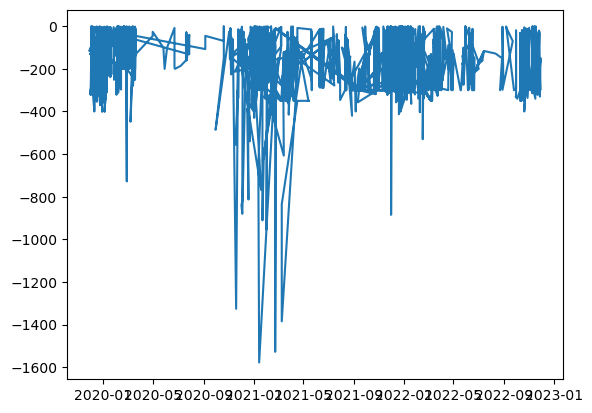

EFFECTIVE DATE    datetime64[ns]
QUANTITY                   int64
dtype: object

In [21]:
import matplotlib.pyplot as plt
plt.plot(df['EFFECTIVE DATE'], df.QUANTITY)
plt.show()
df.dtypes

In [22]:
f1=df.groupby(['EFFECTIVE DATE']).sum()

In [23]:
f1

QUANTITY
EFFECTIVE DATE          
2019-11-28          -116
2019-11-29          -130
2019-12-01          -640
2019-12-02          -840
2019-12-03         -1112
...                  ...
2022-11-23          -364
2022-11-25          -585
2022-11-26          -810
2022-11-28          -364
2022-11-29          -600

[463 rows x 1 columns]

In [24]:
f1.index

DatetimeIndex(['2019-11-28', '2019-11-29', '2019-12-01', '2019-12-02',
               '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06',
               '2019-12-07', '2019-12-08',
               ...
               '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-21',
               '2022-11-22', '2022-11-23', '2022-11-25', '2022-11-26',
               '2022-11-28', '2022-11-29'],
              dtype='datetime64[ns]', name='EFFECTIVE DATE', length=463, freq=None)

In [25]:
idx = pd.date_range(min(df['EFFECTIVE DATE']), max(df['EFFECTIVE DATE']))

In [26]:
idx

DatetimeIndex(['2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-07',
               ...
               '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23',
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29'],
              dtype='datetime64[ns]', length=1098, freq='D')

In [27]:
f1 = f1.reindex(idx)

In [28]:
f1

QUANTITY
2019-11-28    -116.0
2019-11-29    -130.0
2019-11-30       NaN
2019-12-01    -640.0
2019-12-02    -840.0
...              ...
2022-11-25    -585.0
2022-11-26    -810.0
2022-11-27       NaN
2022-11-28    -364.0
2022-11-29    -600.0

[1098 rows x 1 columns]

In [29]:
f1=f1.resample('1W').sum()

In [30]:
f1

QUANTITY
2019-12-01    -886.0
2019-12-08   -8525.0
2019-12-15  -12078.0
2019-12-22  -10452.0
2019-12-29   -7676.0
...              ...
2022-11-06   -1100.0
2022-11-13   -1451.0
2022-11-20   -3968.0
2022-11-27   -2428.0
2022-12-04    -964.0

[158 rows x 1 columns]

<Axes: >

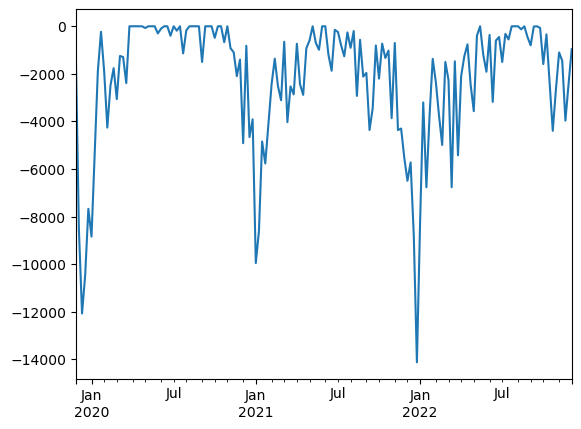

In [31]:
f1.QUANTITY.plot()

In [32]:
f1[f1['QUANTITY']==0.0]=np.nan

In [33]:
f1

QUANTITY
2019-12-01    -886.0
2019-12-08   -8525.0
2019-12-15  -12078.0
2019-12-22  -10452.0
2019-12-29   -7676.0
...              ...
2022-11-06   -1100.0
2022-11-13   -1451.0
2022-11-20   -3968.0
2022-11-27   -2428.0
2022-12-04    -964.0

[158 rows x 1 columns]

In [34]:
f1.dtypes

QUANTITY    float64
dtype: object

# Linear interpolation

In [35]:
f1.dtypes

QUANTITY    float64
dtype: object

<Axes: >

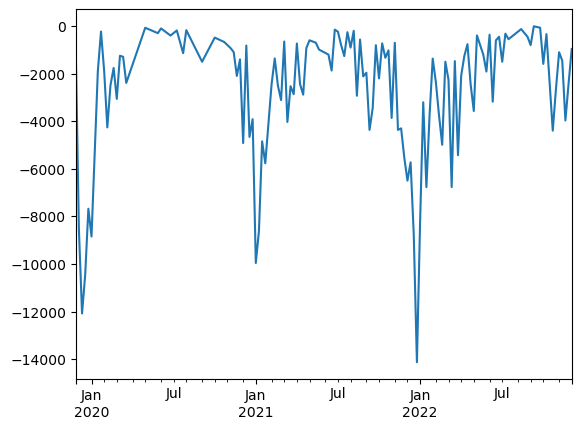

In [36]:
d1=pd.DataFrame()
d1 = f1.interpolate(method='linear')
d1.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x151b52450>,
 'caps': [<matplotlib.lines.Line2D at 0x151b528d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x151b521e0>],
 'medians': [<matplotlib.lines.Line2D at 0x151b52ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x151b531a0>],
 'means': []}

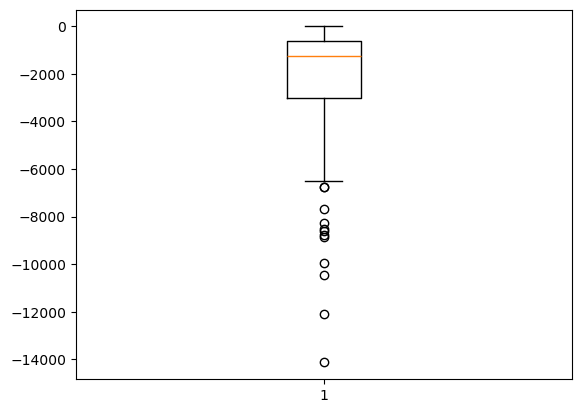

In [37]:
plt.boxplot(d1['QUANTITY'])

In [38]:
IQR=(d1['QUANTITY'].quantile(0.75))-(d1['QUANTITY'].quantile(0.25))
ll=d1['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d1['QUANTITY'].quantile(0.75)+(1.5*IQR)
d1['QUANTITY']=np.where(d1['QUANTITY']>ul,ul,np.where(d1['QUANTITY']<ll,ll,d1['QUANTITY']))

In [39]:
d1

QUANTITY
2019-12-01  -886.0000
2019-12-08 -6643.5625
2019-12-15 -6643.5625
2019-12-22 -6643.5625
2019-12-29 -6643.5625
...               ...
2022-11-06 -1100.0000
2022-11-13 -1451.0000
2022-11-20 -3968.0000
2022-11-27 -2428.0000
2022-12-04  -964.0000

[158 rows x 1 columns]

In [40]:
d1.QUANTITY.max()

-10.0

{'whiskers': [<matplotlib.lines.Line2D at 0x151bcd820>,
 'caps': [<matplotlib.lines.Line2D at 0x151bcde50>,
 'boxes': [<matplotlib.lines.Line2D at 0x151b811f0>],
 'medians': [<matplotlib.lines.Line2D at 0x151bce3f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x151bce630>],
 'means': []}

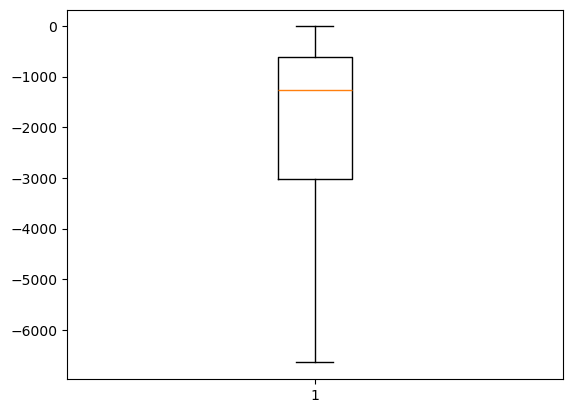

In [41]:
plt.boxplot(d1['QUANTITY'])

<Axes: >

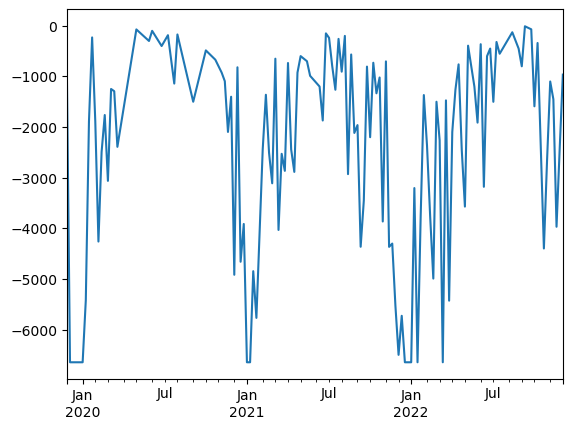

In [42]:
d1.QUANTITY.plot()

# Linear interpolation backward

<Axes: >

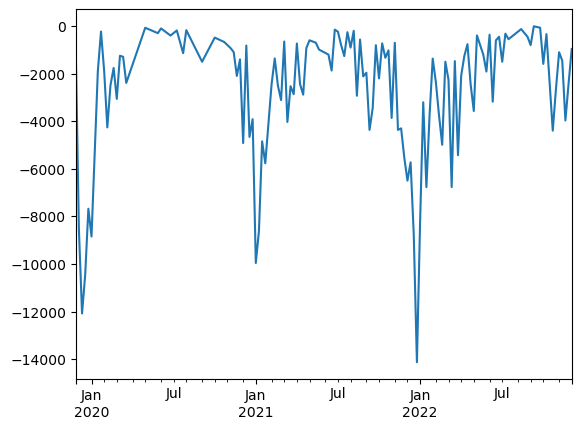

In [43]:
d2=f1.interpolate(method ='linear', limit_direction ='backward')
d2.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x151de8d40>,
 'caps': [<matplotlib.lines.Line2D at 0x151de9340>,
 'boxes': [<matplotlib.lines.Line2D at 0x151de8a70>],
 'medians': [<matplotlib.lines.Line2D at 0x151de9940>],
 'fliers': [<matplotlib.lines.Line2D at 0x151de9c10>],
 'means': []}

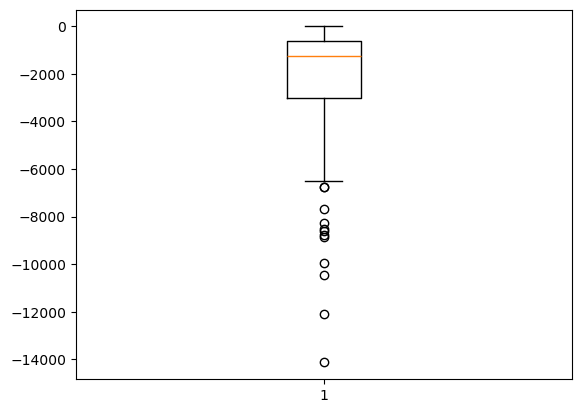

In [44]:
plt.boxplot(d2['QUANTITY'])

In [45]:
IQR=(d2['QUANTITY'].quantile(0.75))-(d2['QUANTITY'].quantile(0.25))
ll=d2['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d2['QUANTITY'].quantile(0.75)+(1.5*IQR)
d2['QUANTITY']=np.where(d2['QUANTITY']>ul,ul,np.where(d2['QUANTITY']<ll,ll,d2['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x153e38290>,
 'caps': [<matplotlib.lines.Line2D at 0x153e38800>,
 'boxes': [<matplotlib.lines.Line2D at 0x153e380e0>],
 'medians': [<matplotlib.lines.Line2D at 0x153e38da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x153e390a0>],
 'means': []}

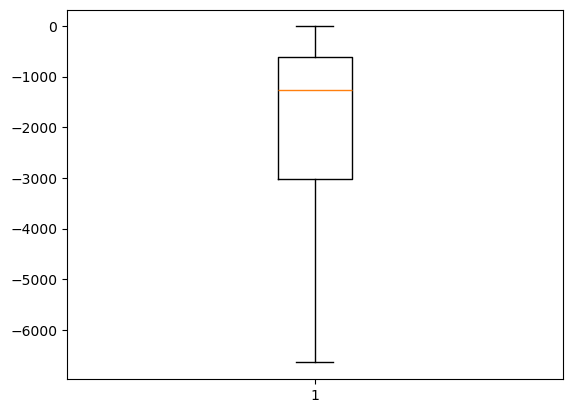

In [46]:
plt.boxplot(d2['QUANTITY'])

<Axes: >

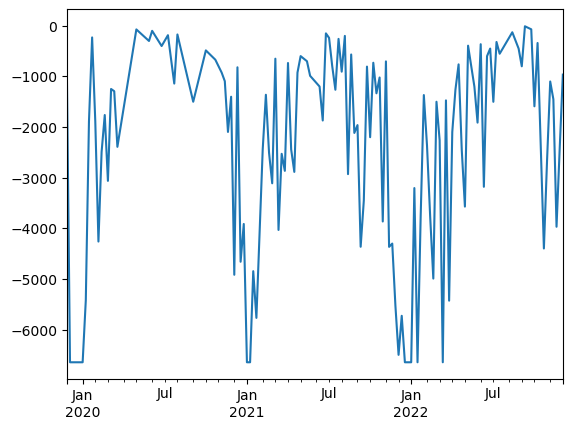

In [47]:
d2.QUANTITY.plot()

# Polynomial interpolation

<Axes: >

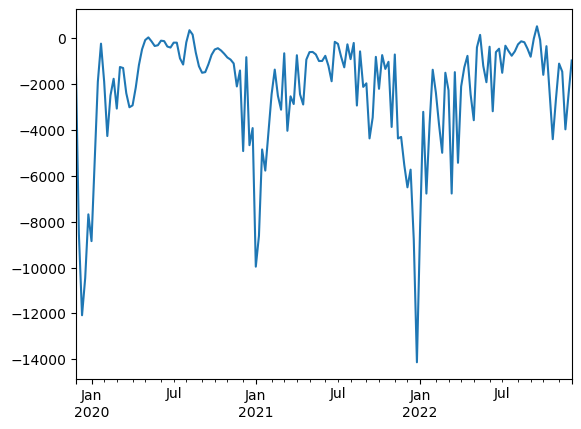

In [48]:
d3=f1.interpolate(method='polynomial', order=2)
d3.QUANTITY.plot()

In [49]:
d3

QUANTITY
2019-12-01    -886.0
2019-12-08   -8525.0
2019-12-15  -12078.0
2019-12-22  -10452.0
2019-12-29   -7676.0
...              ...
2022-11-06   -1100.0
2022-11-13   -1451.0
2022-11-20   -3968.0
2022-11-27   -2428.0
2022-12-04    -964.0

[158 rows x 1 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x155d821b0>,
 'caps': [<matplotlib.lines.Line2D at 0x155e55520>,
 'boxes': [<matplotlib.lines.Line2D at 0x155e54da0>],
 'medians': [<matplotlib.lines.Line2D at 0x155e55b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x155e55df0>],
 'means': []}

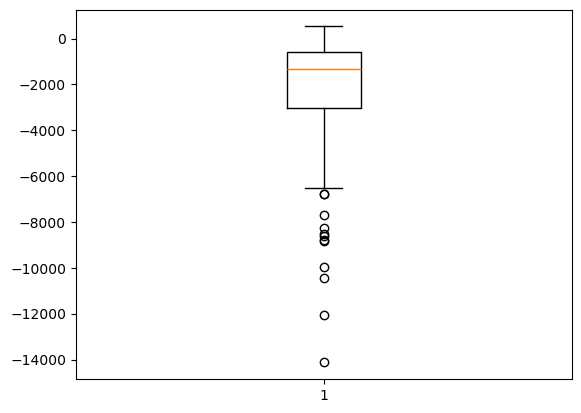

In [50]:
plt.boxplot(d3['QUANTITY'])

In [51]:
IQR=(d3['QUANTITY'].quantile(0.75))-(d3['QUANTITY'].quantile(0.25))
ll=d3['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d3['QUANTITY'].quantile(0.75)+(1.5*IQR)
d3['QUANTITY']=np.where(d3['QUANTITY']>ul,ul,np.where(d3['QUANTITY']<ll,ll,d3['QUANTITY']))

<Axes: >

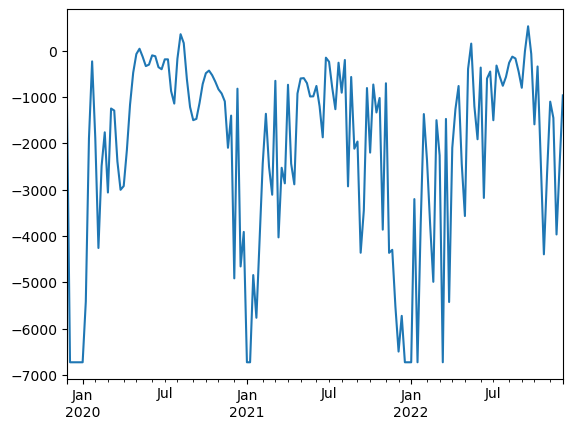

In [52]:
d3.QUANTITY.plot()

In [53]:
# forward imputation

<Axes: >

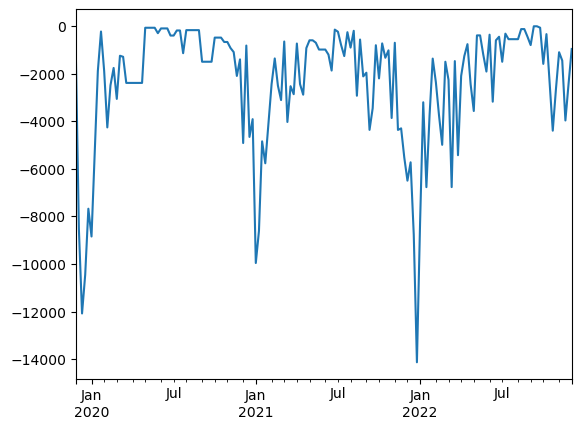

In [54]:
d4=f1.ffill()
d4.QUANTITY.plot()


{'whiskers': [<matplotlib.lines.Line2D at 0x156064ec0>,
 'caps': [<matplotlib.lines.Line2D at 0x156065460>,
 'boxes': [<matplotlib.lines.Line2D at 0x155f311f0>],
 'medians': [<matplotlib.lines.Line2D at 0x156065a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x156065d00>],
 'means': []}

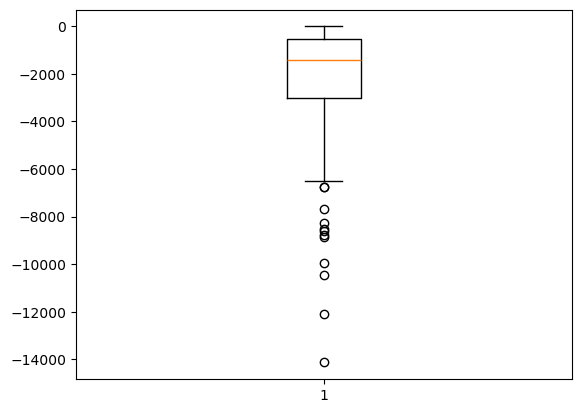

In [55]:
plt.boxplot(d4['QUANTITY'])

In [56]:
IQR=(d4['QUANTITY'].quantile(0.75))-(d4['QUANTITY'].quantile(0.25))
ll=d4['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d4['QUANTITY'].quantile(0.75)+(1.5*IQR)
d4['QUANTITY']=np.where(d4['QUANTITY']>ul,ul,np.where(d4['QUANTITY']<ll,ll,d4['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x1560b3fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1560d84a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1560b3cb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1560d8a40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1560d8cb0>],
 'means': []}

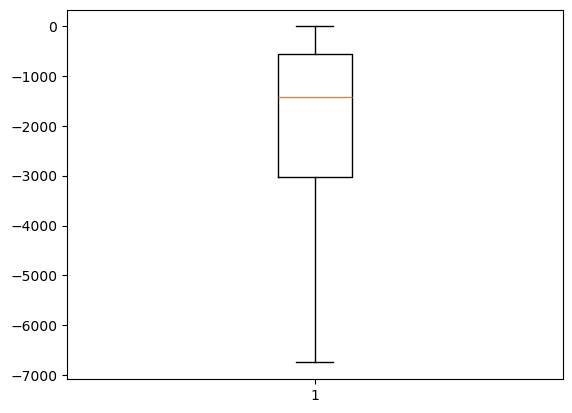

In [57]:
plt.boxplot(d4['QUANTITY'])

<Axes: >

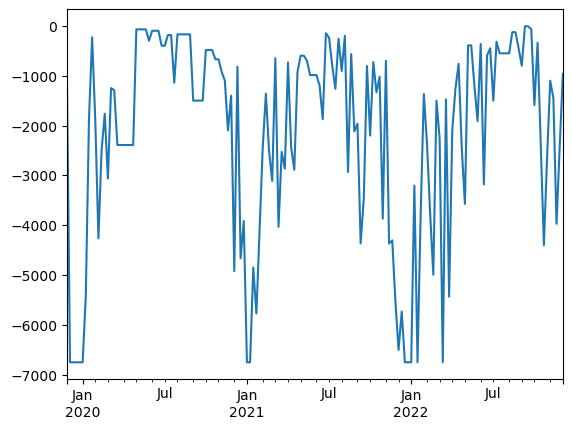

In [58]:
d4.QUANTITY.plot()

# BACK Fill imputation

<Axes: >

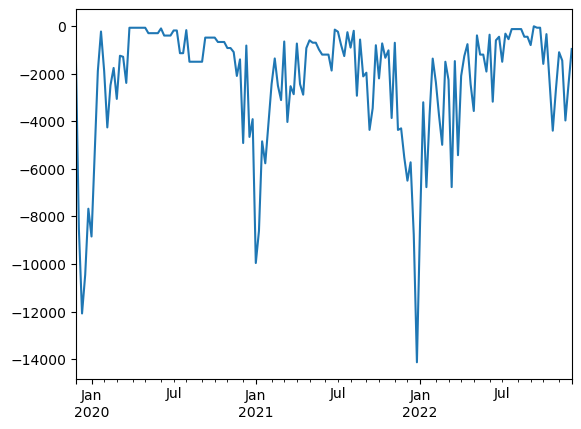

In [59]:
d5=f1.bfill()
d5.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x1562c3aa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1562f80b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1562c37a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1562f86b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1562f8980>],
 'means': []}

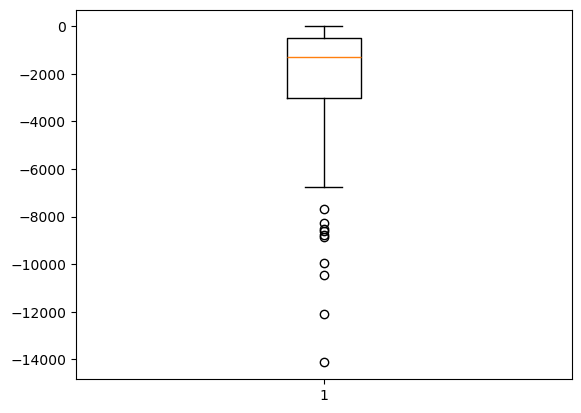

In [60]:
plt.boxplot(d5['QUANTITY'])

In [61]:
IQR=(d5['QUANTITY'].quantile(0.75))-(d5['QUANTITY'].quantile(0.25))
ll=d5['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d5['QUANTITY'].quantile(0.75)+(1.5*IQR)
d5['QUANTITY']=np.where(d5['QUANTITY']>ul,ul,np.where(d5['QUANTITY']<ll,ll,d5['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x15633ef60>,
 'caps': [<matplotlib.lines.Line2D at 0x15633f3b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15633deb0>],
 'medians': [<matplotlib.lines.Line2D at 0x15633f980>],
 'fliers': [<matplotlib.lines.Line2D at 0x15633fc50>],
 'means': []}

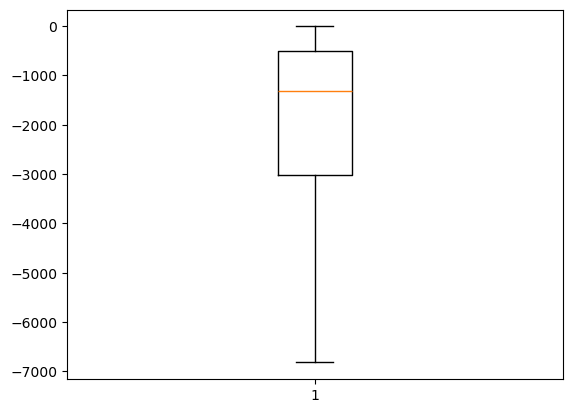

In [62]:
plt.boxplot(d5['QUANTITY'])

<Axes: >

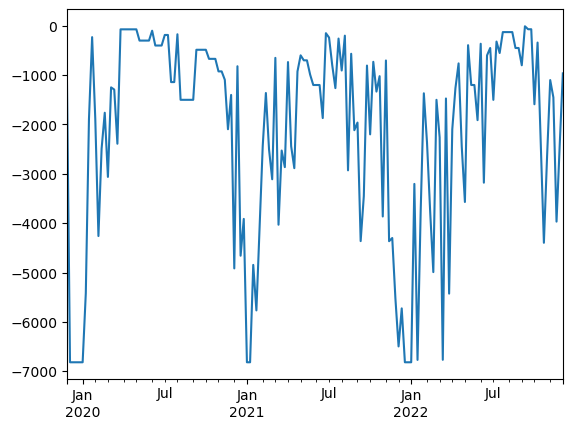

In [63]:
d5.QUANTITY.plot()

# SPLINE imputation

<Axes: >

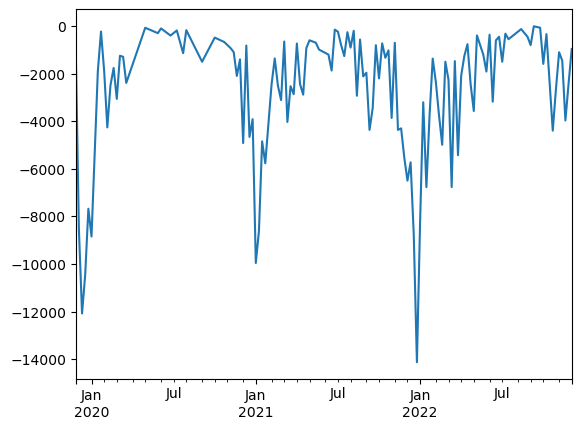

In [64]:
d6=f1.interpolate(method='spline',order=1)
d6.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x156568e90>,
 'caps': [<matplotlib.lines.Line2D at 0x1565694c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x156568c50>],
 'medians': [<matplotlib.lines.Line2D at 0x156569a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x156569d00>],
 'means': []}

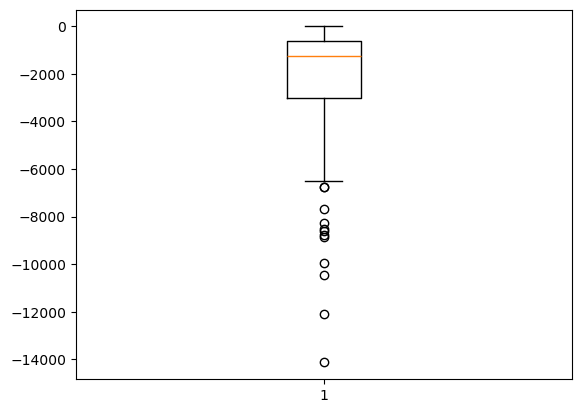

In [65]:
plt.boxplot(d6['QUANTITY'])

In [66]:
IQR=(d6['QUANTITY'].quantile(0.75))-(d6['QUANTITY'].quantile(0.25))
ll=d6['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d6['QUANTITY'].quantile(0.75)+(1.5*IQR)
d6['QUANTITY']=np.where(d6['QUANTITY']>ul,ul,np.where(d6['QUANTITY']<ll,ll,d6['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x1565b71d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1565b7770>,
 'boxes': [<matplotlib.lines.Line2D at 0x1565b7020>],
 'medians': [<matplotlib.lines.Line2D at 0x1565b7da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1565ec0b0>],
 'means': []}

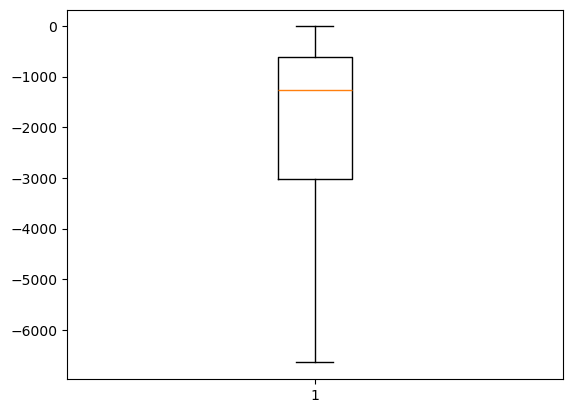

In [67]:
plt.boxplot(d6['QUANTITY'])

<Axes: >

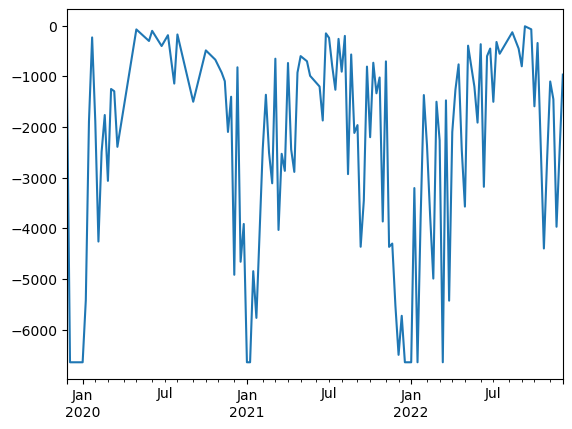

In [68]:
d6.QUANTITY.plot()

# Cubic imputation

<Axes: >

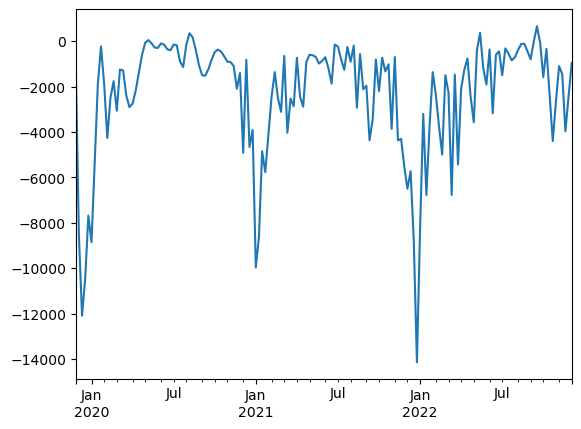

In [69]:
d7=f1.interpolate(method='cubic')
d7.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x1570b5bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1570b6060>,
 'boxes': [<matplotlib.lines.Line2D at 0x1570b58e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1570b6660>],
 'fliers': [<matplotlib.lines.Line2D at 0x1570b6930>],
 'means': []}

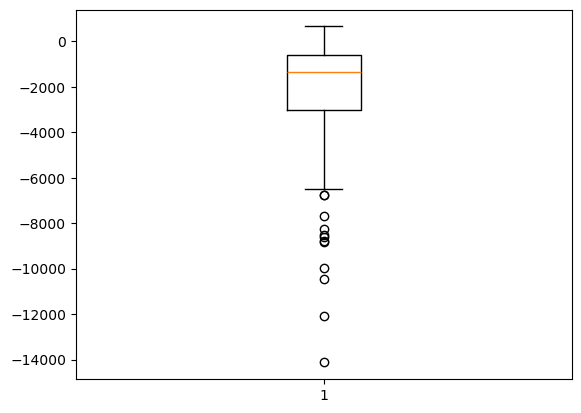

In [70]:
plt.boxplot(d7['QUANTITY'])

In [71]:
IQR=(d7['QUANTITY'].quantile(0.75))-(d7['QUANTITY'].quantile(0.25))
ll=d7['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d7['QUANTITY'].quantile(0.75)+(1.5*IQR)
d7['QUANTITY']=np.where(d7['QUANTITY']>ul,ul,np.where(d7['QUANTITY']<ll,ll,d7['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x1570ff9e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1570fffb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1570ff710>],
 'medians': [<matplotlib.lines.Line2D at 0x157138590>],
 'fliers': [<matplotlib.lines.Line2D at 0x157138830>],
 'means': []}

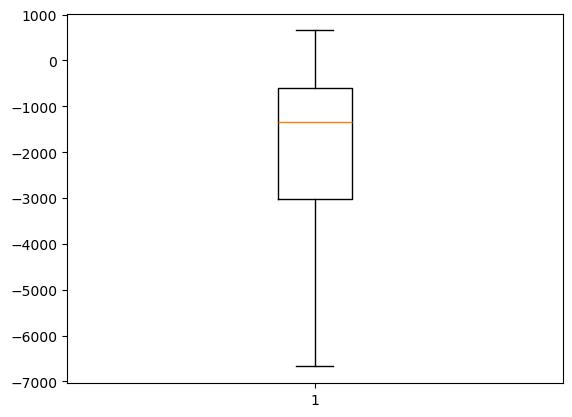

In [72]:
plt.boxplot(d7['QUANTITY'])

<Axes: >

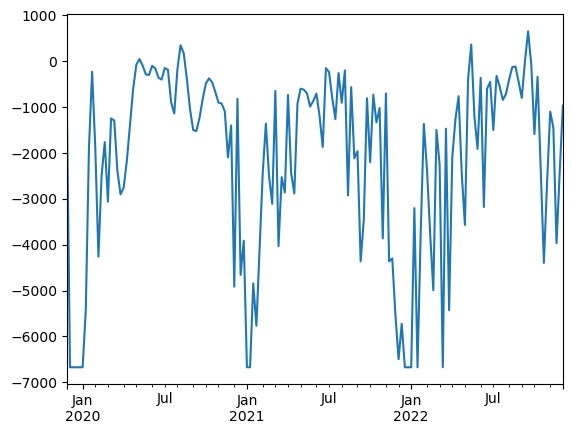

In [73]:
d7['QUANTITY'].plot()

# KNN Imputation

In [74]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
d8=imputer.fit_transform(f1)

In [75]:
d8

array([[-8.86000000e+02],
       [-8.52500000e+03],
       [-1.20780000e+04],
       [-1.04520000e+04],
       [-7.67600000e+03],
       [-8.84400000e+03],
       [-5.41800000e+03],
       [-1.89100000e+03],
       [-2.30000000e+02],
       [-1.88500000e+03],
       [-4.26000000e+03],
       [-2.49000000e+03],
       [-1.76200000e+03],
       [-3.06200000e+03],
       [-1.24800000e+03],
       [-1.29200000e+03],
       [-2.39000000e+03],
       [-2.66743307e+03],
       [-2.66743307e+03],
       [-2.66743307e+03],
       [-2.66743307e+03],
       [-2.66743307e+03],
       [-7.20000000e+01],
       [-2.66743307e+03],
       [-2.66743307e+03],
       [-2.66743307e+03],
       [-3.00000000e+02],
       [-1.00000000e+02],
       [-2.66743307e+03],
       [-2.66743307e+03],
       [-4.00000000e+02],
       [-2.66743307e+03],
       [-1.86000000e+02],
       [-2.66743307e+03],
       [-1.14100000e+03],
       [-1.72000000e+02],
       [-2.66743307e+03],
       [-2.66743307e+03],
       [-2.6

In [76]:
d8 = pd.DataFrame(d8, columns = ['QUANTITY'])

In [77]:
d8

QUANTITY
0      -886.0
1     -8525.0
2    -12078.0
3    -10452.0
4     -7676.0
..        ...
153   -1100.0
154   -1451.0
155   -3968.0
156   -2428.0
157    -964.0

[158 rows x 1 columns]

<Axes: >

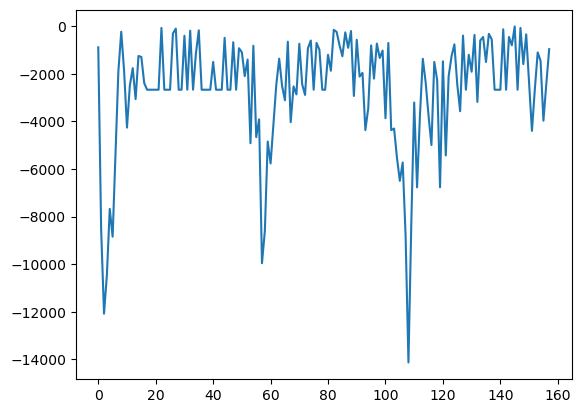

In [78]:
d8.QUANTITY.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x16b2efda0>,
 'caps': [<matplotlib.lines.Line2D at 0x16b320350>,
 'boxes': [<matplotlib.lines.Line2D at 0x16b2efb60>],
 'medians': [<matplotlib.lines.Line2D at 0x16b320920>],
 'fliers': [<matplotlib.lines.Line2D at 0x16b320c20>],
 'means': []}

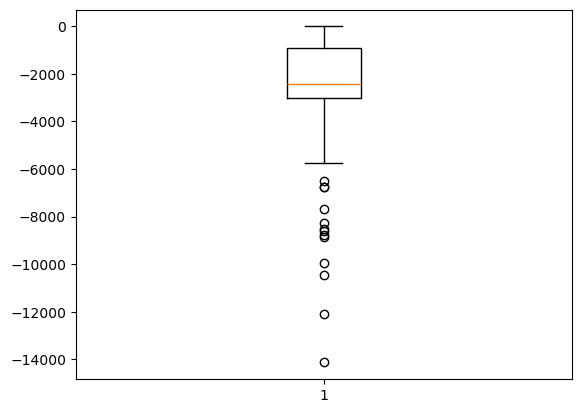

In [79]:
plt.boxplot(d8['QUANTITY'])

In [80]:
IQR=(d8['QUANTITY'].quantile(0.75))-(d8['QUANTITY'].quantile(0.25))
ll=d8['QUANTITY'].quantile(0.25)-(1.5*IQR)
ul=d8['QUANTITY'].quantile(0.75)+(1.5*IQR)
d8['QUANTITY']=np.where(d8['QUANTITY']>ul,ul,np.where(d8['QUANTITY']<ll,ll,d8['QUANTITY']))

{'whiskers': [<matplotlib.lines.Line2D at 0x16b35f020>,
 'caps': [<matplotlib.lines.Line2D at 0x16b35f4a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16b35ed50>],
 'medians': [<matplotlib.lines.Line2D at 0x16b35fad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16b35fdd0>],
 'means': []}

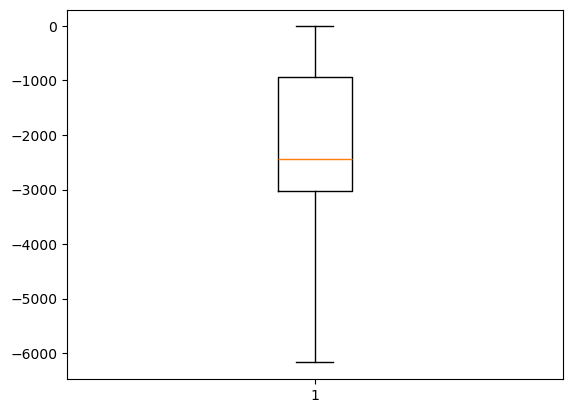

In [81]:
plt.boxplot(d8['QUANTITY'])

<Axes: >

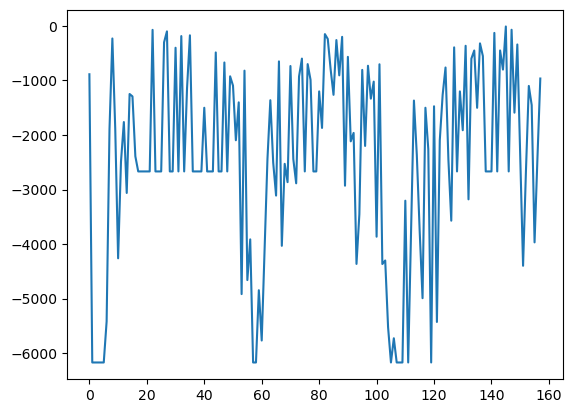

In [82]:
d8.QUANTITY.plot()

In [83]:
d8=d8.set_index(d7.index)

# Seasonality

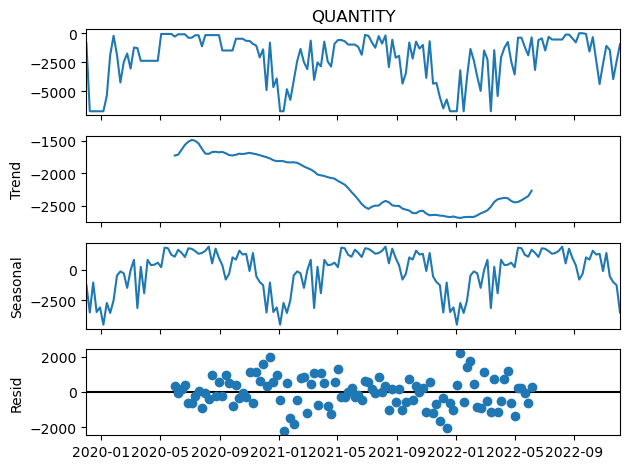

In [84]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(d4.QUANTITY,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

# Finding stationary or not

In [85]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d1.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -3.261840
p-value: 0.016673


(-3.261840072619108,
 0.01667281074000036,
 6,
 151,
 {'1%': -3.4744158894942156,
  '5%': -2.880878382771059,
  '10%': -2.577081275821236},
 2462.201350002819)

In [86]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d2.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -3.261840
p-value: 0.016673


(-3.261840072619108,
 0.01667281074000036,
 6,
 151,
 {'1%': -3.4744158894942156,
  '5%': -2.880878382771059,
  '10%': -2.577081275821236},
 2462.201350002819)

In [87]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d3.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -3.251376
p-value: 0.017197


(-3.2513756904821642,
 0.017196910511566816,
 6,
 151,
 {'1%': -3.4744158894942156,
  '5%': -2.880878382771059,
  '10%': -2.577081275821236},
 2473.9682926520563)

In [88]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d4.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -3.284378
p-value: 0.015591


(-3.2843784113773444,
 0.015591365113476254,
 6,
 151,
 {'1%': -3.4744158894942156,
  '5%': -2.880878382771059,
  '10%': -2.577081275821236},
 2470.420547922282)

In [89]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d5.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -3.299391
p-value: 0.014906


(-3.299390937125898,
 0.014905721580811946,
 6,
 151,
 {'1%': -3.4744158894942156,
  '5%': -2.880878382771059,
  '10%': -2.577081275821236},
 2466.882438402656)

In [90]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d6.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -3.261837
p-value: 0.016673


(-3.261836540691532,
 0.016672985243228598,
 6,
 151,
 {'1%': -3.4744158894942156,
  '5%': -2.880878382771059,
  '10%': -2.577081275821236},
 2462.200110253401)

In [91]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d7.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -3.259317
p-value: 0.016798


(-3.2593172060161018,
 0.01679786784769513,
 6,
 151,
 {'1%': -3.4744158894942156,
  '5%': -2.880878382771059,
  '10%': -2.577081275821236},
 2473.5048354210508)

In [92]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(d8.QUANTITY.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result

ADF Statistic: -4.616839
p-value: 0.000120


(-4.616839039630817,
 0.00012024654023649845,
 5,
 152,
 {'1%': -3.474120870218417,
  '5%': -2.880749791423677,
  '10%': -2.5770126333102494},
 2485.6239424895384)

# ARIMA

In [93]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

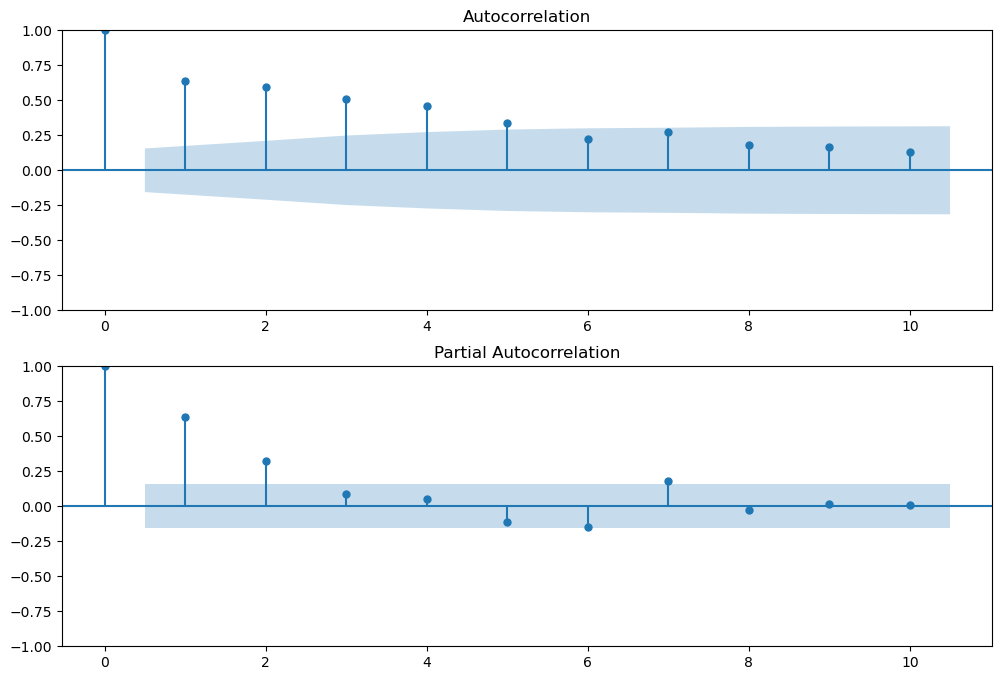

In [94]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(d1.QUANTITY,lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(d1.QUANTITY,lags=10,ax=ax2)

In [95]:
import statsmodels.api as sm

In [96]:
f1

QUANTITY
2019-12-01    -886.0
2019-12-08   -8525.0
2019-12-15  -12078.0
2019-12-22  -10452.0
2019-12-29   -7676.0
...              ...
2022-11-06   -1100.0
2022-11-13   -1451.0
2022-11-20   -3968.0
2022-11-27   -2428.0
2022-12-04    -964.0

[158 rows x 1 columns]

In [97]:
model = sm.tsa.arima.ARIMA(d1.iloc[:115,:], order=(1,0,2))
result = model.fit()

In [98]:
start = 115
end = 157
  
# Predictions for one-year against the test set
d1_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

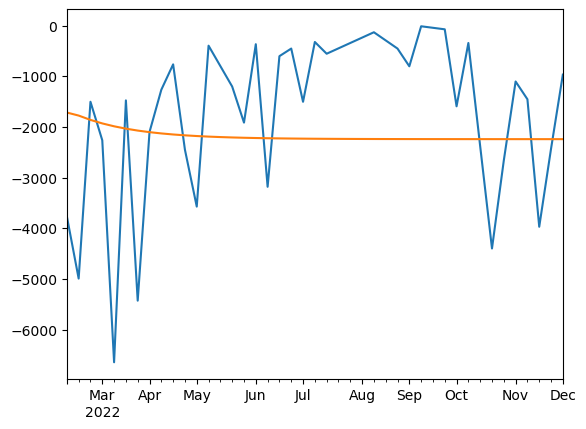

In [99]:
import matplotlib.pyplot as plt
d1.iloc[115:,:].QUANTITY.plot()
d1_predictions.plot()

In [100]:
model = sm.tsa.arima.ARIMA(d2.iloc[:115,:], order=(1,0,2))
result = model.fit()

In [101]:
start1 = 115
end1 = 157
  
# Predictions for one-year against the test set
d2_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [102]:
d2_predictions

2022-02-13   -1712.962689
2022-02-20   -1772.988214
2022-02-27   -1858.198303
2022-03-06   -1927.813425
2022-03-13   -1984.687737
2022-03-20   -2031.153035
2022-03-27   -2069.114355
2022-04-03   -2100.128075
2022-04-10   -2125.465731
2022-04-17   -2146.166144
2022-04-24   -2163.078012
2022-05-01   -2176.894706
2022-05-08   -2188.182699
2022-05-15   -2197.404788
2022-05-22   -2204.939069
2022-05-29   -2211.094443
2022-06-05   -2216.123274
2022-06-12   -2220.231738
2022-06-19   -2223.588281
2022-06-26   -2226.330516
2022-07-03   -2228.570873
2022-07-10   -2230.401205
2022-07-17   -2231.896554
2022-07-24   -2233.118227
2022-07-31   -2234.116312
2022-08-07   -2234.931730
2022-08-14   -2235.597911
2022-08-21   -2236.142170
2022-08-28   -2236.586819
2022-09-04   -2236.950090
2022-09-11   -2237.246876
2022-09-18   -2237.489344
2022-09-25   -2237.687437
2022-10-02   -2237.849275
2022-10-09   -2237.981494
2022-10-16   -2238.089514
2022-10-23   -2238.177765
2022-10-30   -2238.249864
2022-11-06  

<Axes: >

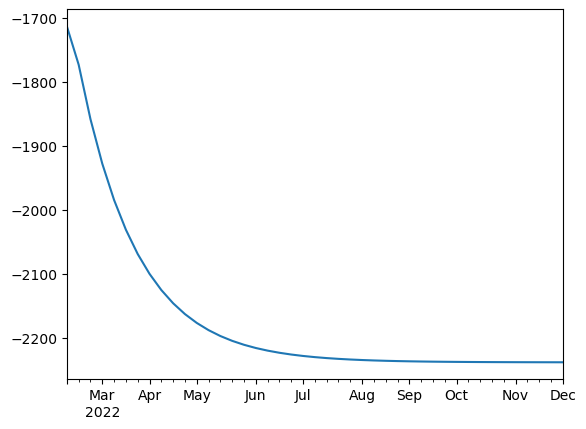

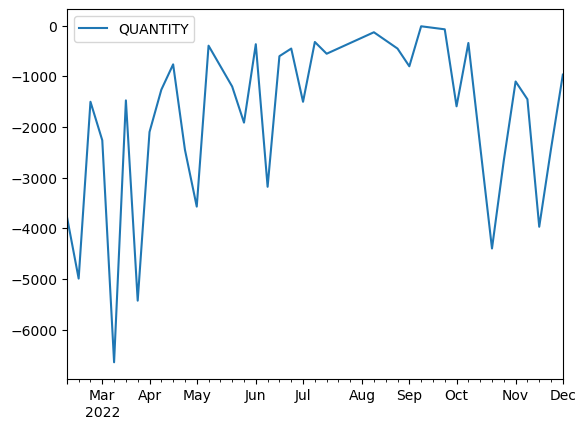

In [103]:
d2_predictions.plot()
d2.iloc[115:,:].plot()

In [104]:
model = sm.tsa.arima.ARIMA(d3.iloc[:115,:], order=(1,0,2))
result = model.fit()

In [105]:
start1 = 115
end1 = 157
  
# Predictions for one-year against the test set
d3_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [106]:
d3_predictions

2022-02-13   -1749.895710
2022-02-20   -1847.392752
2022-02-27   -1926.718205
2022-03-06   -1990.664795
2022-03-13   -2042.214028
2022-03-20   -2083.769386
2022-03-27   -2117.268387
2022-04-03   -2144.272920
2022-04-10   -2166.042071
2022-04-17   -2183.590827
2022-04-24   -2197.737396
2022-05-01   -2209.141364
2022-05-08   -2218.334438
2022-05-15   -2225.745247
2022-05-22   -2231.719319
2022-05-29   -2236.535195
2022-06-05   -2240.417414
2022-06-12   -2243.546986
2022-06-19   -2246.069826
2022-06-26   -2248.103562
2022-07-03   -2249.743016
2022-07-10   -2251.064629
2022-07-17   -2252.130020
2022-07-24   -2252.988863
2022-07-31   -2253.681202
2022-08-07   -2254.239317
2022-08-14   -2254.689229
2022-08-21   -2255.051917
2022-08-28   -2255.344291
2022-09-04   -2255.579982
2022-09-11   -2255.769979
2022-09-18   -2255.923141
2022-09-25   -2256.046610
2022-10-02   -2256.146142
2022-10-09   -2256.226378
2022-10-16   -2256.291058
2022-10-23   -2256.343199
2022-10-30   -2256.385231
2022-11-06  

<Axes: >

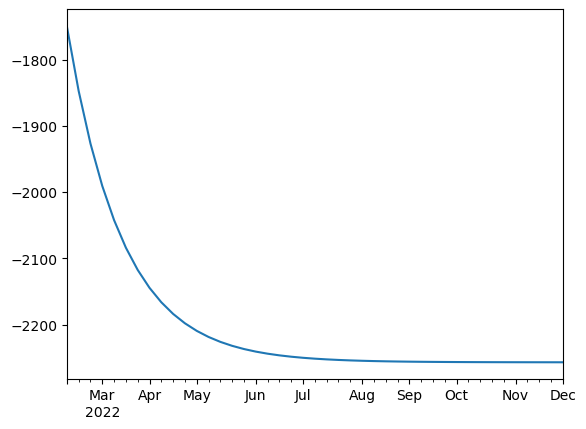

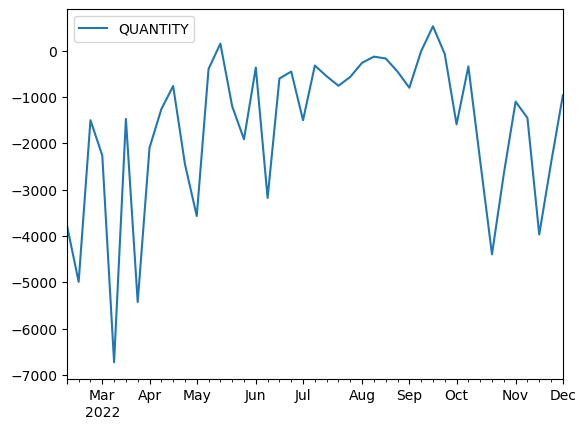

In [107]:
d3_predictions.plot()
d3.iloc[115:,:].plot()

In [108]:
model = sm.tsa.arima.ARIMA(d4.iloc[:115,:], order=(1,0,2))
result = model.fit()

In [109]:
start1 = 115
end1 = 157
  
# Predictions for one-year against the test set
d4_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [110]:
d4_predictions

2022-02-13   -1713.446243
2022-02-20   -1798.547305
2022-02-27   -1890.287933
2022-03-06   -1964.355775
2022-03-13   -2024.155292
2022-03-20   -2072.435113
2022-03-27   -2111.414378
2022-04-03   -2142.884731
2022-04-10   -2168.292680
2022-04-17   -2188.806077
2022-04-24   -2205.367802
2022-05-01   -2218.739099
2022-05-08   -2229.534569
2022-05-15   -2238.250414
2022-05-22   -2245.287251
2022-05-29   -2250.968522
2022-06-05   -2255.555360
2022-06-12   -2259.258597
2022-06-19   -2262.248447
2022-06-26   -2264.662337
2022-07-03   -2266.611218
2022-07-10   -2268.184669
2022-07-17   -2269.455014
2022-07-24   -2270.480640
2022-07-31   -2271.308692
2022-08-07   -2271.977228
2022-08-14   -2272.516979
2022-08-21   -2272.952753
2022-08-28   -2273.304580
2022-09-04   -2273.588632
2022-09-11   -2273.817964
2022-09-18   -2274.003118
2022-09-25   -2274.152604
2022-10-02   -2274.273294
2022-10-09   -2274.370734
2022-10-16   -2274.449403
2022-10-23   -2274.512918
2022-10-30   -2274.564197
2022-11-06  

<Axes: >

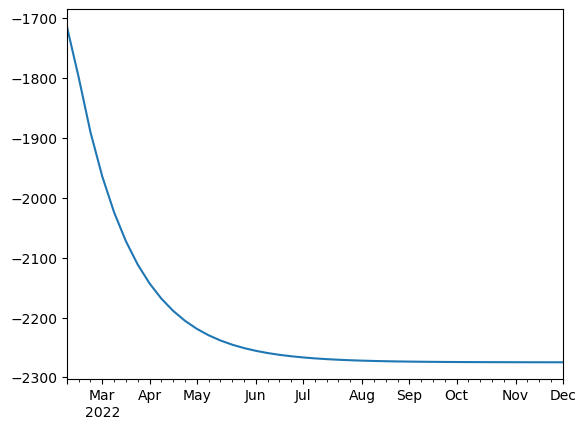

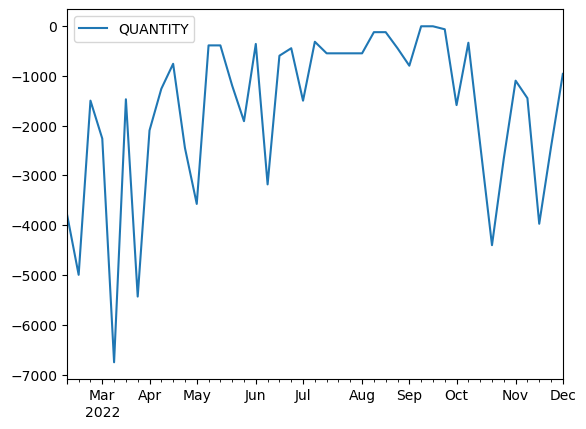

In [111]:
d4_predictions.plot()
d4.iloc[115:,:].plot()

In [112]:
model = sm.tsa.arima.ARIMA(d5.iloc[:115,:], order=(1,0,2))
result = model.fit()

In [113]:
start1 = 115
end1 = 157
  
# Predictions for one-year against the test set
d5_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [114]:
d5_predictions

2022-02-13   -1682.505780
2022-02-20   -1736.198669
2022-02-27   -1825.445651
2022-03-06   -1898.526247
2022-03-13   -1958.368869
2022-03-20   -2007.371474
2022-03-27   -2047.497643
2022-04-03   -2080.355274
2022-04-10   -2107.261004
2022-04-17   -2129.292974
2022-04-24   -2147.334026
2022-05-01   -2162.107085
2022-05-08   -2174.204120
2022-05-15   -2184.109873
2022-05-22   -2192.221277
2022-05-29   -2198.863364
2022-06-05   -2204.302290
2022-06-12   -2208.755997
2022-06-19   -2212.402950
2022-06-26   -2215.389287
2022-07-03   -2217.834672
2022-07-10   -2219.837095
2022-07-17   -2221.476795
2022-07-24   -2222.819476
2022-07-31   -2223.918941
2022-08-07   -2224.819247
2022-08-14   -2225.556469
2022-08-21   -2226.160149
2022-08-28   -2226.654478
2022-09-04   -2227.059263
2022-09-11   -2227.390724
2022-09-18   -2227.662144
2022-09-25   -2227.884398
2022-10-02   -2228.066392
2022-10-09   -2228.215420
2022-10-16   -2228.337452
2022-10-23   -2228.437379
2022-10-30   -2228.519206
2022-11-06  

<Axes: >

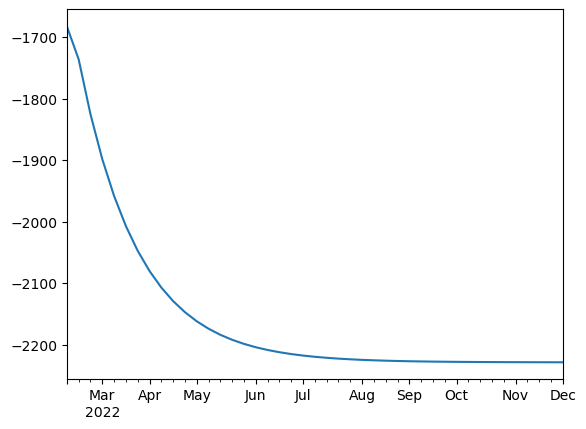

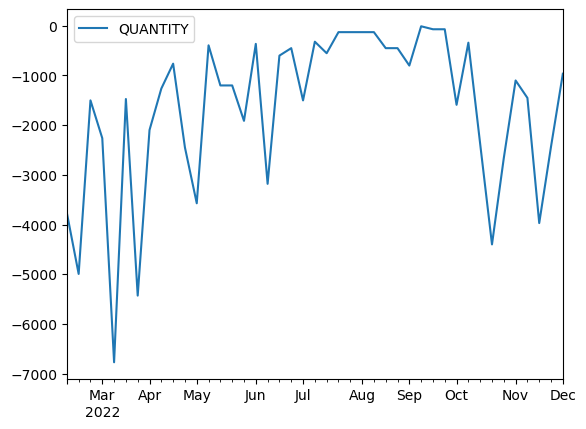

In [115]:
d5_predictions.plot()
d5.iloc[115:,:].plot()

In [116]:
model = sm.tsa.arima.ARIMA(d6.iloc[:115,:], order=(1,0,2))
result = model.fit()

In [117]:
start1 = 115
end1 = 157
  
# Predictions for one-year against the test set
d6_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [118]:
d6_predictions

2022-02-13   -1712.953732
2022-02-20   -1772.978069
2022-02-27   -1858.190147
2022-03-06   -1927.806874
2022-03-13   -1984.682480
2022-03-20   -2031.148822
2022-03-27   -2069.110984
2022-04-03   -2100.125383
2022-04-10   -2125.463586
2022-04-17   -2146.164439
2022-04-24   -2163.076663
2022-05-01   -2176.893643
2022-05-08   -2188.181866
2022-05-15   -2197.404140
2022-05-22   -2204.938571
2022-05-29   -2211.094065
2022-06-05   -2216.122993
2022-06-12   -2220.231535
2022-06-19   -2223.588140
2022-06-26   -2226.330426
2022-07-03   -2228.570824
2022-07-10   -2230.401188
2022-07-17   -2231.896563
2022-07-24   -2233.118257
2022-07-31   -2234.116359
2022-08-07   -2234.931790
2022-08-14   -2235.597982
2022-08-21   -2236.142250
2022-08-28   -2236.586906
2022-09-04   -2236.950183
2022-09-11   -2237.246973
2022-09-18   -2237.489445
2022-09-25   -2237.687540
2022-10-02   -2237.849381
2022-10-09   -2237.981602
2022-10-16   -2238.089623
2022-10-23   -2238.177875
2022-10-30   -2238.249976
2022-11-06  

<Axes: >

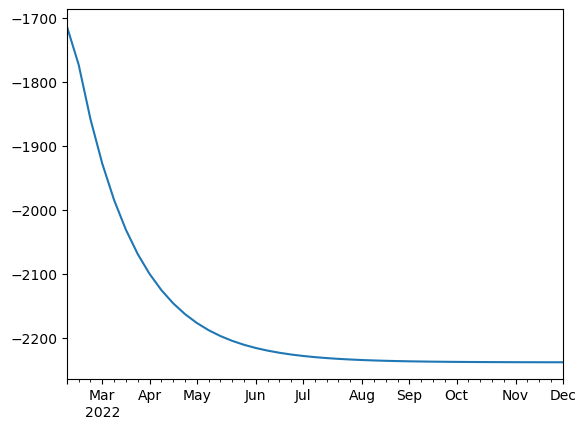

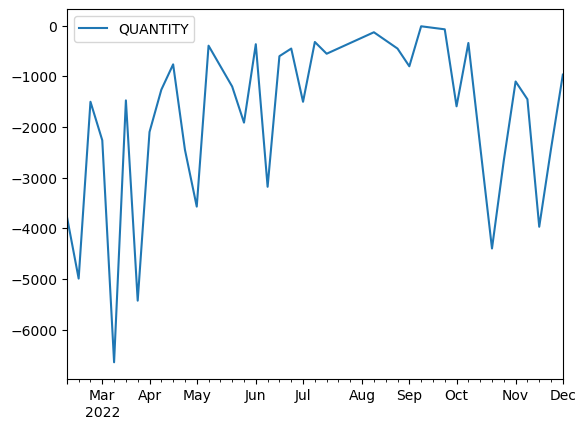

In [119]:
d6_predictions.plot()
d6.iloc[115:,:].plot()

In [120]:
model = sm.tsa.arima.ARIMA(d7.iloc[:115,:], order=(1,0,2))
result = model.fit()

In [121]:
start1 = 115
end1 = 157
  
# Predictions for one-year against the test set
d7_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [122]:
d7_predictions

2022-02-13   -1748.963789
2022-02-20   -1840.093353
2022-02-27   -1918.368980
2022-03-06   -1981.643415
2022-03-13   -2032.791572
2022-03-20   -2074.137402
2022-03-27   -2107.559478
2022-04-03   -2134.576355
2022-04-10   -2156.415562
2022-04-17   -2174.069377
2022-04-24   -2188.339913
2022-05-01   -2199.875562
2022-05-08   -2209.200452
2022-05-15   -2216.738267
2022-05-22   -2222.831491
2022-05-29   -2227.756975
2022-06-05   -2231.738511
2022-06-12   -2234.957002
2022-06-19   -2237.558683
2022-06-26   -2239.661762
2022-07-03   -2241.361796
2022-07-10   -2242.736025
2022-07-17   -2243.846889
2022-07-24   -2244.744861
2022-07-31   -2245.470740
2022-08-07   -2246.057508
2022-08-14   -2246.531824
2022-08-21   -2246.915239
2022-08-28   -2247.225174
2022-09-04   -2247.475712
2022-09-11   -2247.678235
2022-09-18   -2247.841946
2022-09-25   -2247.974282
2022-10-02   -2248.081256
2022-10-09   -2248.167729
2022-10-16   -2248.237630
2022-10-23   -2248.294135
2022-10-30   -2248.339811
2022-11-06  

<Axes: >

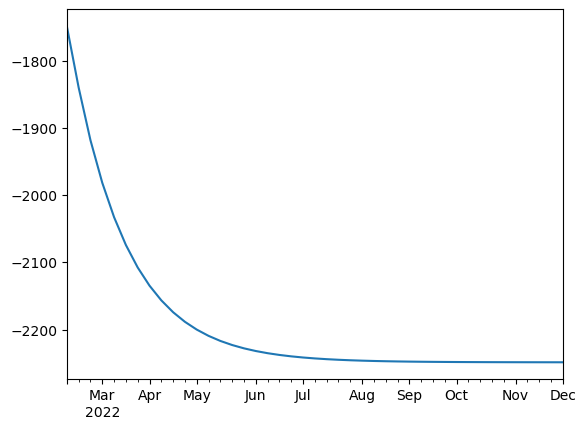

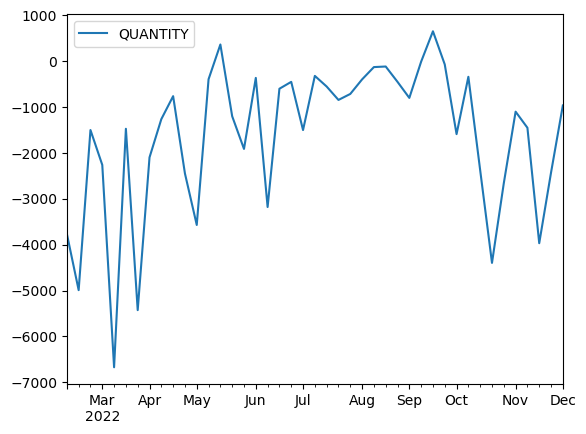

In [123]:
d7_predictions.plot()
d7.iloc[115:,:].plot()

In [124]:
model = sm.tsa.arima.ARIMA(d8.iloc[:115,:], order=(1,0,2))
result = model.fit()

In [125]:
start1 = 115
end1 = 157
  
# Predictions for one-year against the test set
d8_predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [126]:
d8_predictions

2022-02-13   -2123.516056
2022-02-20   -2163.008366
2022-02-27   -2269.935800
2022-03-06   -2350.899541
2022-03-13   -2412.203988
2022-03-20   -2458.622733
2022-03-27   -2493.770264
2022-04-03   -2520.383411
2022-04-10   -2540.534459
2022-04-17   -2555.792511
2022-04-24   -2567.345662
2022-05-01   -2576.093524
2022-05-08   -2582.717265
2022-05-15   -2587.732655
2022-05-22   -2591.530228
2022-05-29   -2594.405690
2022-06-05   -2596.582943
2022-06-12   -2598.231525
2022-06-19   -2599.479804
2022-06-26   -2600.424981
2022-07-03   -2601.140654
2022-07-10   -2601.682550
2022-07-17   -2602.092866
2022-07-24   -2602.403550
2022-07-31   -2602.638795
2022-08-07   -2602.816918
2022-08-14   -2602.951791
2022-08-21   -2603.053914
2022-08-28   -2603.131240
2022-09-04   -2603.189790
2022-09-11   -2603.234123
2022-09-18   -2603.267692
2022-09-25   -2603.293109
2022-10-02   -2603.312355
2022-10-09   -2603.326927
2022-10-16   -2603.337961
2022-10-23   -2603.346316
2022-10-30   -2603.352642
2022-11-06  

<Axes: >

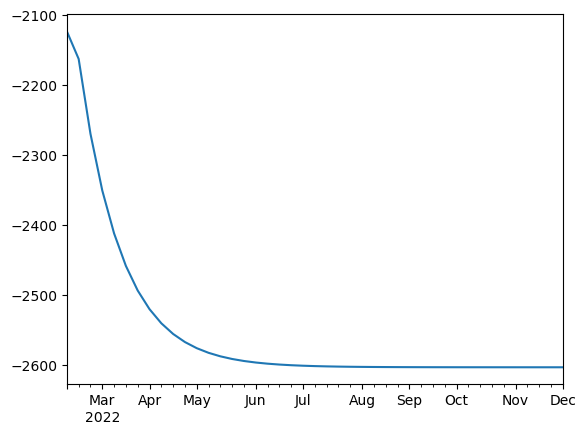

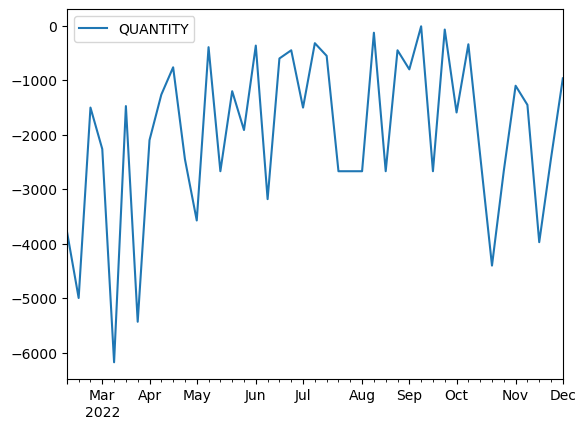

In [127]:
d8_predictions.plot()
d8.iloc[115:,:].plot()

In [128]:
d1.iloc[115:,:]

QUANTITY
2022-02-13 -3762.0000
2022-02-20 -4991.0000
2022-02-27 -1500.0000
2022-03-06 -2261.0000
2022-03-13 -6643.5625
2022-03-20 -1473.0000
2022-03-27 -5427.0000
2022-04-03 -2097.0000
2022-04-10 -1263.0000
2022-04-17  -762.0000
2022-04-24 -2448.0000
2022-05-01 -3570.0000
2022-05-08  -393.0000
2022-05-15  -796.5000
2022-05-22 -1200.0000
2022-05-29 -1912.0000
2022-06-05  -364.0000
2022-06-12 -3179.0000
2022-06-19  -600.0000
2022-06-26  -450.0000
2022-07-03 -1501.0000
2022-07-10  -320.0000
2022-07-17  -552.0000
2022-07-24  -446.0000
2022-07-31  -340.0000
2022-08-07  -234.0000
2022-08-14  -128.0000
2022-08-21  -289.0000
2022-08-28  -450.0000
2022-09-04  -800.0000
2022-09-11   -10.0000
2022-09-18   -40.0000
2022-09-25   -70.0000
2022-10-02 -1590.0000
2022-10-09  -340.0000
2022-10-16 -2378.0000
2022-10-23 -4397.0000
2022-10-30 -2660.0000
2022-11-06 -1100.0000
2022-11-13 -1451.0000
2022-11-20 -3968.0000
2022-11-27 -2428.0000
2022-12-04  -964.0000

In [129]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d1.iloc[115:,:],d1_predictions ))
print(mean_absolute_percentage_error(d2.iloc[115:,:],d2_predictions ))
print(mean_absolute_percentage_error(d3.iloc[115:,:],d3_predictions ))
print(mean_absolute_percentage_error(d4.iloc[115:,:],d4_predictions ))
print(mean_absolute_percentage_error(d5.iloc[115:,:],d5_predictions ))
print(mean_absolute_percentage_error(d6.iloc[115:,:],d6_predictions ))
print(mean_absolute_percentage_error(d7.iloc[115:,:],d7_predictions ))
print(mean_absolute_percentage_error(d8.iloc[115:,:],d8_predictions ))

9.325179400134495
9.325179400134495
8.561721921081157
13.537024880358151
9.36397372313668
9.319795683117896
8.361404267485204
8.709198929933207


In [130]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [131]:
import pmdarima as pm

In [132]:
d4

QUANTITY
2019-12-01  -886.000
2019-12-08 -6743.875
2019-12-15 -6743.875
2019-12-22 -6743.875
2019-12-29 -6743.875
...              ...
2022-11-06 -1100.000
2022-11-13 -1451.000
2022-11-20 -3968.000
2022-11-27 -2428.000
2022-12-04  -964.000

[158 rows x 1 columns]

In [133]:
smodel = pm.auto_arima(d4, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=8.22 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=1916.379, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=1883.569, Time=3.50 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=3.84 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=1915.915, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=1904.815, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[52] intercept   : AIC=1885.240, Time=11.90 sec
 ARIMA(1,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=8.17 sec
 ARIMA(1,0,0)(0,1,1)[52] intercept   : AIC=inf, Time=3.24 sec
 ARIMA(1,0,0)(2,1,1)[52] intercept   : AIC=inf, Time=20.28 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=1886.455, Time=3.74 sec
 ARIMA(2,0,0)(1,1,0)[52] intercept   : AIC=1884.543, Time=3.58 sec
 ARIMA(1,0,1)(1,1,0)[52] intercept   : AIC=1882.407, Time=3.91 sec
 ARIMA(1,0,1)(0,1,0)[52] intercept   : AIC=1905.102, Time=0.67 sec
 ARIMA(1,0,1)(2,1,0)[52] intercept   : AIC

In [134]:
import statsmodels.api as sm

In [135]:
d1

QUANTITY
2019-12-01  -886.0000
2019-12-08 -6643.5625
2019-12-15 -6643.5625
2019-12-22 -6643.5625
2019-12-29 -6643.5625
...               ...
2022-11-06 -1100.0000
2022-11-13 -1451.0000
2022-11-20 -3968.0000
2022-11-27 -2428.0000
2022-12-04  -964.0000

[158 rows x 1 columns]

In [136]:
model=sm.tsa.statespace.SARIMAX(d1.QUANTITY,order=(2, 0, 1),seasonal_order=(1,1,0,52))
results=model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94556D+00    |proj g|=  5.53125D-02

At iterate    5    f=  5.93350D+00    |proj g|=  1.26972D-02

At iterate   10    f=  5.91622D+00    |proj g|=  2.42203D-02

At iterate   15    f=  5.91403D+00    |proj g|=  4.46141D-03

At iterate   20    f=  5.91393D+00    |proj g|=  7.54961D-05

At iterate   25    f=  5.91390D+00    |proj g|=  1.59868D-03

At iterate   30    f=  5.91038D+00    |proj g|=  2.26202D-02

At iterate   35    f=  5.90570D+00    |proj g|=  1.12599D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<Axes: >

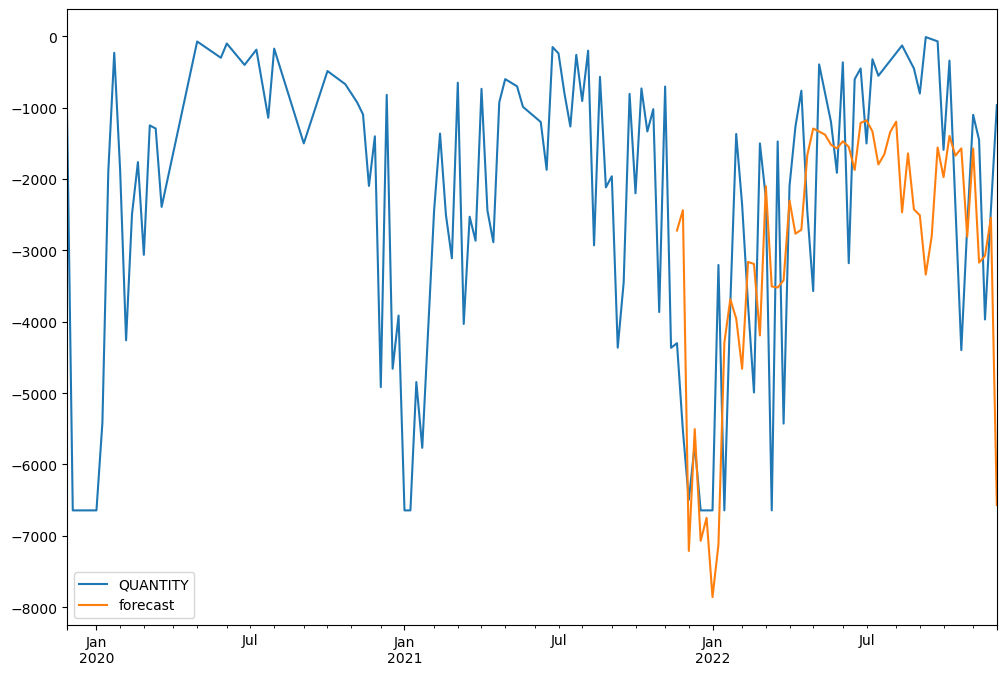

In [137]:
d1['forecast']=results.predict(start=103,end=157,dynamic=True)
d1[['QUANTITY','forecast']].plot(figsize=(12,8))

In [138]:
d1['forecast']

2019-12-01            NaN
2019-12-08            NaN
2019-12-15            NaN
2019-12-22            NaN
2019-12-29            NaN
                 ...     
2022-11-06   -1571.868897
2022-11-13   -3171.227164
2022-11-20   -3075.703990
2022-11-27   -2541.673373
2022-12-04   -6567.325372
Freq: W-SUN, Name: forecast, Length: 158, dtype: float64

In [139]:
d2

QUANTITY
2019-12-01  -886.0000
2019-12-08 -6643.5625
2019-12-15 -6643.5625
2019-12-22 -6643.5625
2019-12-29 -6643.5625
...               ...
2022-11-06 -1100.0000
2022-11-13 -1451.0000
2022-11-20 -3968.0000
2022-11-27 -2428.0000
2022-12-04  -964.0000

[158 rows x 1 columns]

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94556D+00    |proj g|=  5.53125D-02

At iterate    5    f=  5.93350D+00    |proj g|=  1.26972D-02

At iterate   10    f=  5.91622D+00    |proj g|=  2.42203D-02

At iterate   15    f=  5.91403D+00    |proj g|=  4.46141D-03

At iterate   20    f=  5.91393D+00    |proj g|=  7.54961D-05

At iterate   25    f=  5.91390D+00    |proj g|=  1.59868D-03

At iterate   30    f=  5.91038D+00    |proj g|=  2.26202D-02

At iterate   35    f=  5.90570D+00    |proj g|=  1.12599D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<Axes: >

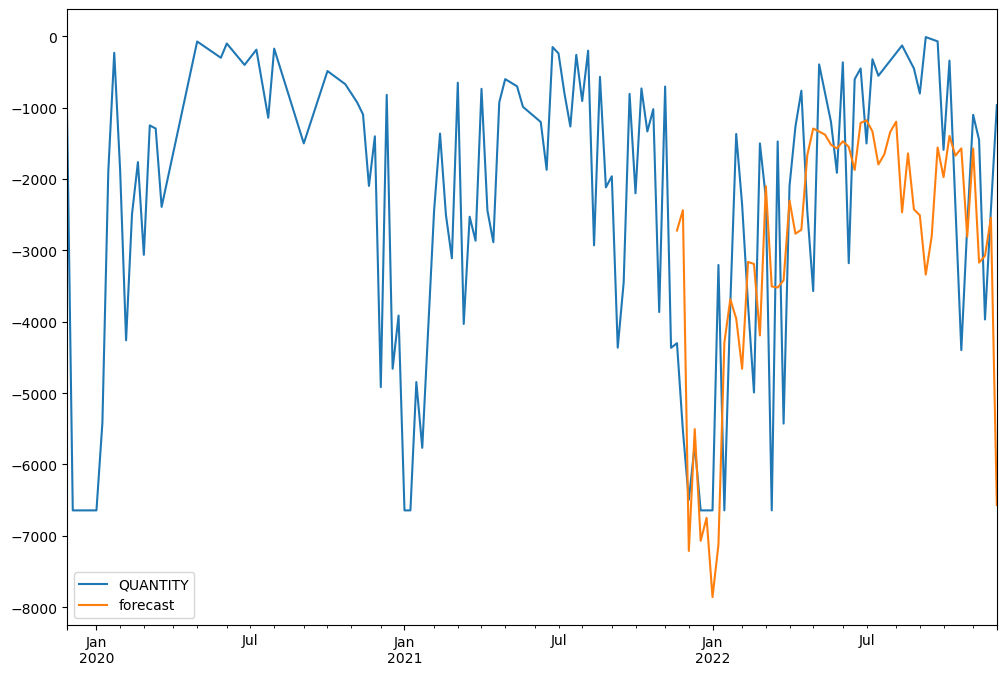

In [140]:
model=sm.tsa.statespace.SARIMAX(d2.QUANTITY,order=(2, 0, 1),seasonal_order=(1,1,0,52))
results=model.fit()
d2['forecast']=results.predict(start=103,end=157,dynamic=True)
d2[['QUANTITY','forecast']].plot(figsize=(12,8))

In [141]:
d3

QUANTITY
2019-12-01  -886.000000
2019-12-08 -6728.411224
2019-12-15 -6728.411224
2019-12-22 -6728.411224
2019-12-29 -6728.411224
...                 ...
2022-11-06 -1100.000000
2022-11-13 -1451.000000
2022-11-20 -3968.000000
2022-11-27 -2428.000000
2022-12-04  -964.000000

[158 rows x 1 columns]

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95384D+00    |proj g|=  6.12611D-02

At iterate    5    f=  5.94024D+00    |proj g|=  1.16626D-02

At iterate   10    f=  5.92369D+00    |proj g|=  4.81811D-03

At iterate   15    f=  5.92127D+00    |proj g|=  7.83733D-04

At iterate   20    f=  5.92124D+00    |proj g|=  3.79057D-04

At iterate   25    f=  5.92099D+00    |proj g|=  3.54063D-03

At iterate   30    f=  5.91451D+00    |proj g|=  2.62208D-02

At iterate   35    f=  5.91221D+00    |proj g|=  2.50162D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<Axes: >

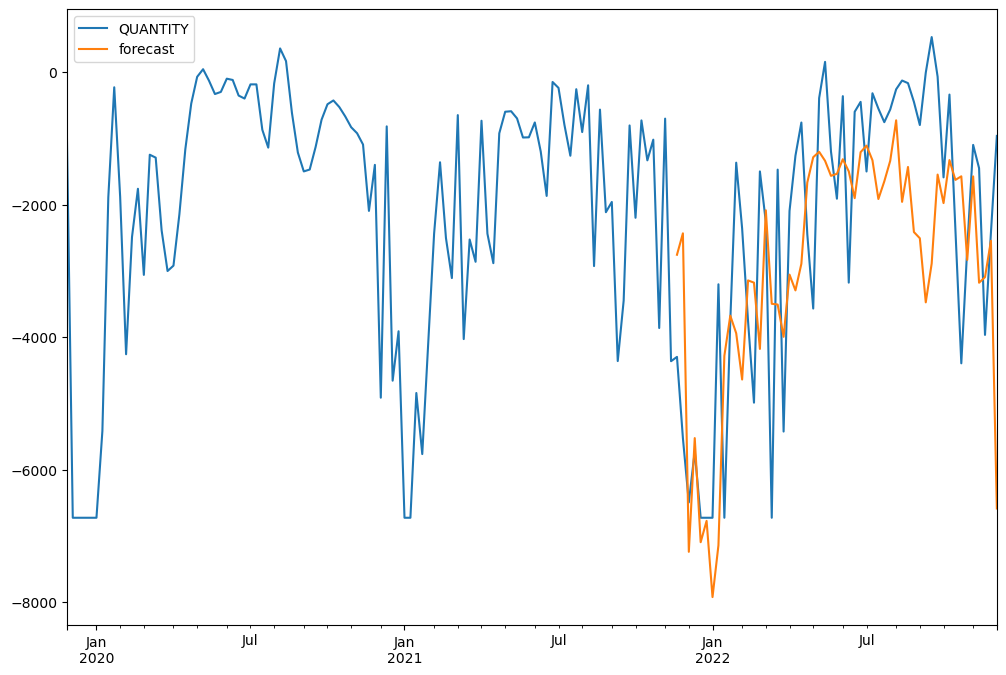

In [142]:
model=sm.tsa.statespace.SARIMAX(d3.QUANTITY,order=(2, 0, 1),seasonal_order=(1,1,0,52))
results=model.fit()
d3['forecast']=results.predict(start=103,end=157,dynamic=True)
d3[['QUANTITY','forecast']].plot(figsize=(12,8))

In [143]:
d4

QUANTITY
2019-12-01  -886.000
2019-12-08 -6743.875
2019-12-15 -6743.875
2019-12-22 -6743.875
2019-12-29 -6743.875
...              ...
2022-11-06 -1100.000
2022-11-13 -1451.000
2022-11-20 -3968.000
2022-11-27 -2428.000
2022-12-04  -964.000

[158 rows x 1 columns]

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95336D+00    |proj g|=  4.85116D-02

At iterate    5    f=  5.94343D+00    |proj g|=  9.22970D-03

At iterate   10    f=  5.93136D+00    |proj g|=  2.69755D-02

At iterate   15    f=  5.92482D+00    |proj g|=  4.88136D-03

At iterate   20    f=  5.92403D+00    |proj g|=  1.36246D-04

At iterate   25    f=  5.92398D+00    |proj g|=  5.46295D-03

At iterate   30    f=  5.91998D+00    |proj g|=  3.45289D-02

At iterate   35    f=  5.91665D+00    |proj g|=  3.74730D-03

At iterate   40    f=  5.91629D+00    |proj g|=  3.00178D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

<Axes: >

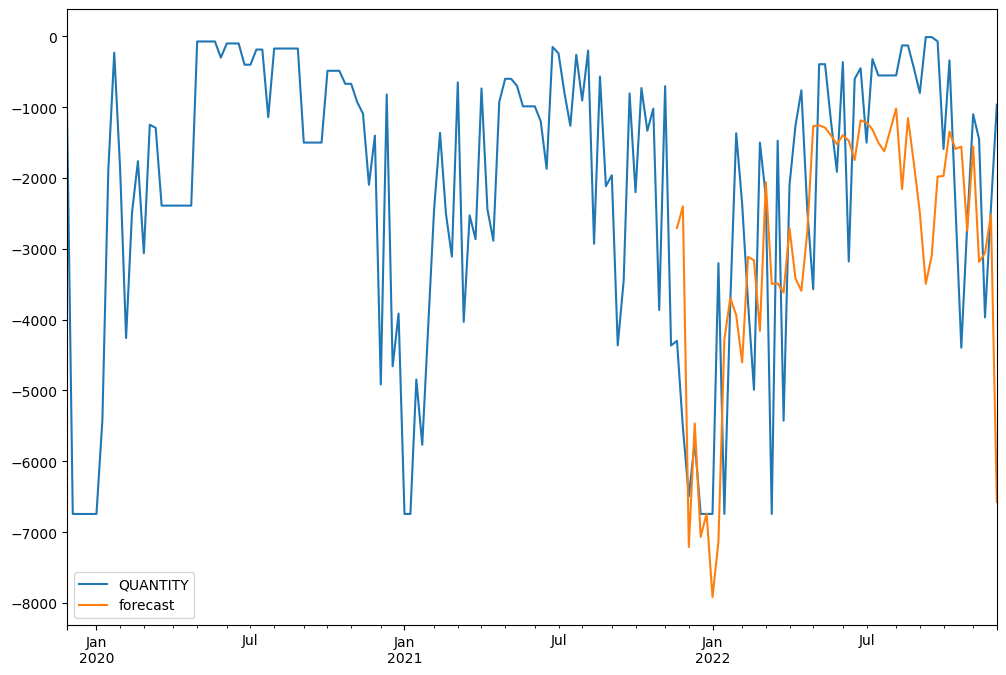

In [144]:
model1=sm.tsa.statespace.SARIMAX(d4.QUANTITY,order=(2, 0, 1),seasonal_order=(1,1,0,52))
results=model1.fit()
d4['forecast']=results.predict(start=103,end=157,dynamic=True)
d4[['QUANTITY','forecast']].plot(figsize=(12,8))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95549D+00    |proj g|=  4.15948D-02

At iterate    5    f=  5.94468D+00    |proj g|=  2.64126D-02

At iterate   10    f=  5.93250D+00    |proj g|=  3.47085D-03

At iterate   15    f=  5.93166D+00    |proj g|=  8.64353D-04

At iterate   20    f=  5.93166D+00    |proj g|=  1.34311D-03

At iterate   25    f=  5.93068D+00    |proj g|=  6.84713D-03

At iterate   30    f=  5.92498D+00    |proj g|=  8.46539D-03

At iterate   35    f=  5.92460D+00    |proj g|=  2.60594D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<Axes: >

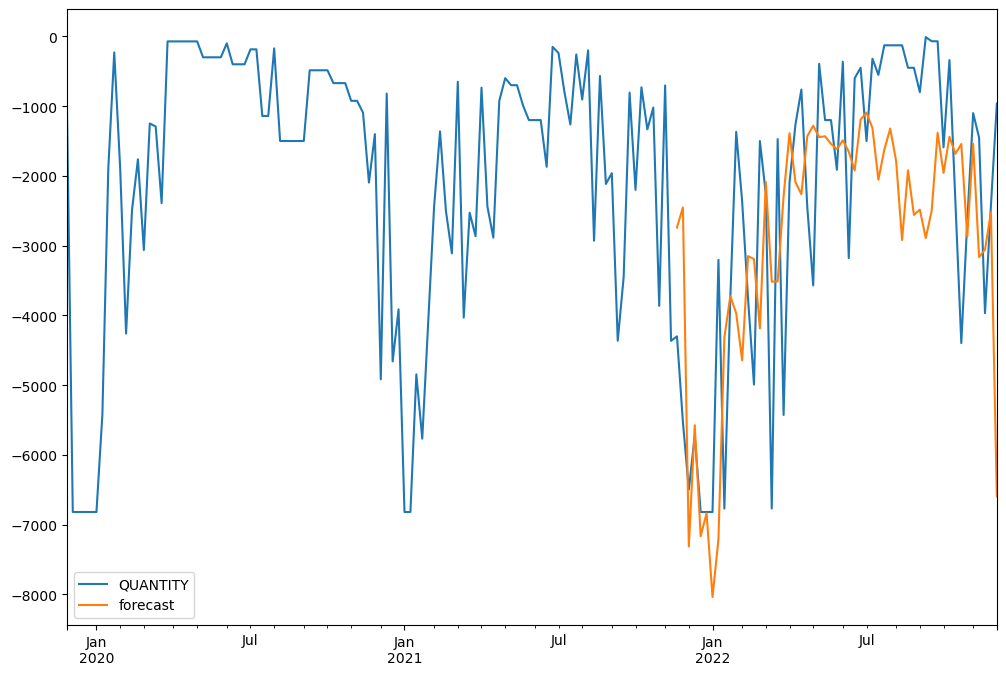

In [145]:
model=sm.tsa.statespace.SARIMAX(d5.QUANTITY,order=(2, 0, 1),seasonal_order=(1,1,0,52))
results=model.fit()
d5['forecast']=results.predict(start=103,end=157,dynamic=True)
d5[['QUANTITY','forecast']].plot(figsize=(12,8))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94556D+00    |proj g|=  5.53098D-02


 This problem is unconstrained.



At iterate    5    f=  5.93350D+00    |proj g|=  1.26980D-02

At iterate   10    f=  5.91622D+00    |proj g|=  2.42550D-02

At iterate   15    f=  5.91403D+00    |proj g|=  4.47136D-03

At iterate   20    f=  5.91393D+00    |proj g|=  7.54956D-05

At iterate   25    f=  5.91390D+00    |proj g|=  1.59158D-03

At iterate   30    f=  5.91040D+00    |proj g|=  2.25299D-02

At iterate   35    f=  5.90570D+00    |proj g|=  6.82173D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     41      1     0     0   8.234D-06   5.906D+00
  F =   5.9056784412068151     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

<Axes: >

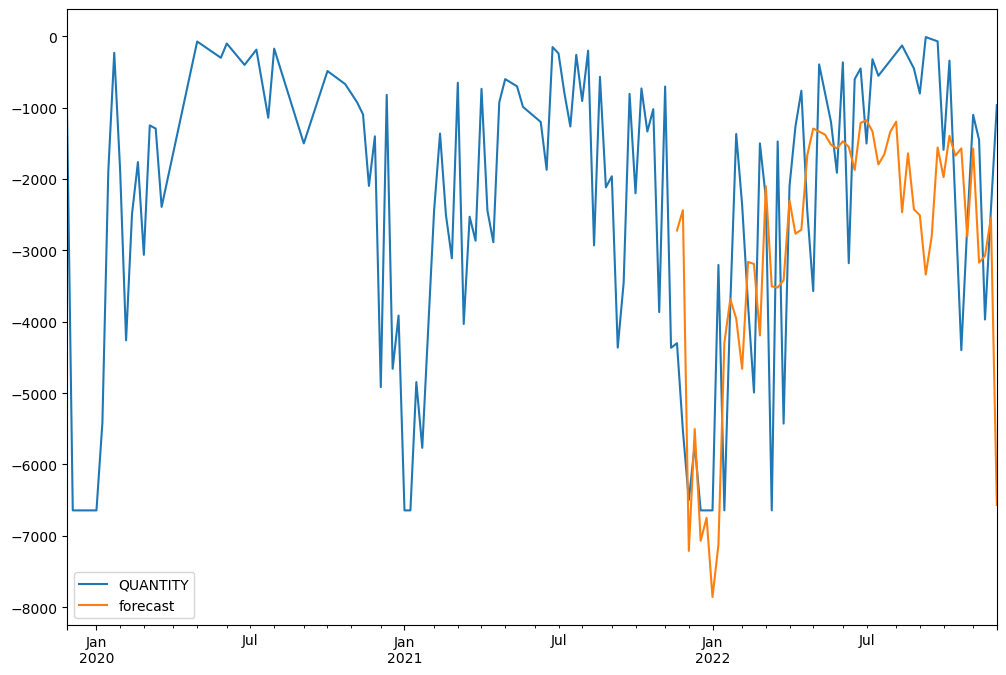

In [146]:
model=sm.tsa.statespace.SARIMAX(d6.QUANTITY,order=(2, 0, 1),seasonal_order=(1,1,0,52))
results=model.fit()
d6['forecast']=results.predict(start=103,end=157,dynamic=True)
d6[['QUANTITY','forecast']].plot(figsize=(12,8))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95299D+00    |proj g|=  6.07454D-02

At iterate    5    f=  5.93953D+00    |proj g|=  8.88011D-03

At iterate   10    f=  5.92125D+00    |proj g|=  1.07867D-03

At iterate   15    f=  5.92022D+00    |proj g|=  1.19810D-03

At iterate   20    f=  5.92014D+00    |proj g|=  2.61526D-04

At iterate   25    f=  5.92007D+00    |proj g|=  2.56206D-03

At iterate   30    f=  5.91577D+00    |proj g|=  2.69071D-02

At iterate   35    f=  5.91154D+00    |proj g|=  1.10744D-03

At iterate   40    f=  5.91148D+00    |proj g|=  4.24629D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

<Axes: >

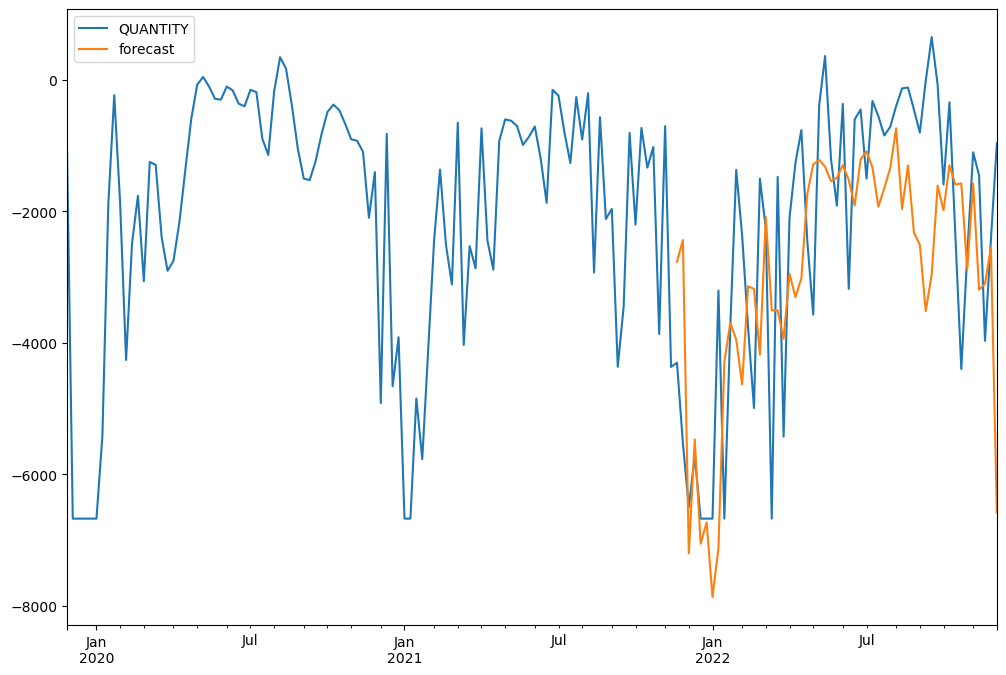

In [147]:
model=sm.tsa.statespace.SARIMAX(d7.QUANTITY,order=(2, 0, 1),seasonal_order=(1,1,0,52))
results=model.fit()
d7['forecast']=results.predict(start=103,end=157,dynamic=True)
d7[['QUANTITY','forecast']].plot(figsize=(12,8))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98856D+00    |proj g|=  6.56229D-02


 This problem is unconstrained.



At iterate    5    f=  5.97715D+00    |proj g|=  1.34464D-02

At iterate   10    f=  5.96158D+00    |proj g|=  2.12401D-03

At iterate   15    f=  5.96095D+00    |proj g|=  1.67073D-04

At iterate   20    f=  5.96095D+00    |proj g|=  5.73436D-04

At iterate   25    f=  5.96068D+00    |proj g|=  7.49895D-03

At iterate   30    f=  5.95235D+00    |proj g|=  1.66263D-02

At iterate   35    f=  5.95101D+00    |proj g|=  1.76452D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     43      1     0     0   4.383D-06   5.951D+00
  F =   5.9510042671653363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

<Axes: >

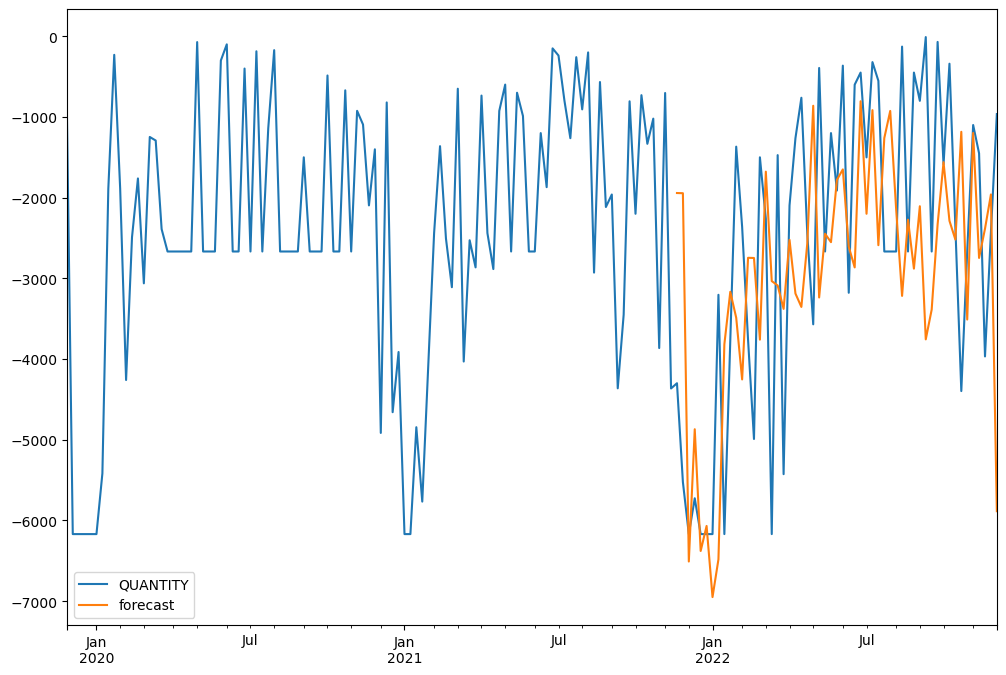

In [148]:
model=sm.tsa.statespace.SARIMAX(d8.QUANTITY,order=(2, 0, 1),seasonal_order=(1,1,0,52))
results=model.fit()
d8['forecast']=results.predict(start=103,end=157,dynamic=True)
d8[['QUANTITY','forecast']].plot(figsize=(12,8))

In [149]:
d1

QUANTITY     forecast
2019-12-01  -886.0000          NaN
2019-12-08 -6643.5625          NaN
2019-12-15 -6643.5625          NaN
2019-12-22 -6643.5625          NaN
2019-12-29 -6643.5625          NaN
...               ...          ...
2022-11-06 -1100.0000 -1571.868897
2022-11-13 -1451.0000 -3171.227164
2022-11-20 -3968.0000 -3075.703990
2022-11-27 -2428.0000 -2541.673373
2022-12-04  -964.0000 -6567.325372

[158 rows x 2 columns]

In [150]:
d2.iloc[103:157,:]

QUANTITY     forecast
2021-11-21 -4300.0000 -2721.130521
2021-11-28 -5525.0000 -2436.839335
2021-12-05 -6497.0000 -7211.684411
2021-12-12 -5726.0000 -5504.194864
2021-12-19 -6643.5625 -7069.541642
2021-12-26 -6643.5625 -6748.280125
2022-01-02 -6643.5625 -7858.619821
2022-01-09 -3204.0000 -7123.961069
2022-01-16 -6643.5625 -4295.056308
2022-01-23 -3757.0000 -3684.129182
2022-01-30 -1368.0000 -3954.956712
2022-02-06 -2362.0000 -4658.564502
2022-02-13 -3762.0000 -3160.965492
2022-02-20 -4991.0000 -3190.908579
2022-02-27 -1500.0000 -4191.743715
2022-03-06 -2261.0000 -2099.305837
2022-03-13 -6643.5625 -3504.818390
2022-03-20 -1473.0000 -3519.781546
2022-03-27 -5427.0000 -3418.772398
2022-04-03 -2097.0000 -2303.052747
2022-04-10 -1263.0000 -2765.933686
2022-04-17  -762.0000 -2710.202329
2022-04-24 -2448.0000 -1664.458084
2022-05-01 -3570.0000 -1291.564956
2022-05-08  -393.0000 -1334.617874
2022-05-15  -796.5000 -1377.797499
2022-05-22 -1200.0000 -1518.881696
2022-05-29 -1912.0000 -1570.613139
2022-06-05  -364.0000 -1471.274548
2022-06-12 -3179.0000 -1548.546379
2022-06-19  -600.0000 -1872.684849
2022-06-26  -450.0000 -1212.973283
2022-07-03 -1501.0000 -1176.370565
2022-07-10  -320.0000 -1332.971963
2022-07-17  -552.0000 -1795.671222
2022-07-24  -446.0000 -1653.281301
2022-07-31  -340.0000 -1339.751062
2022-08-07  -234.0000 -1195.610652
2022-08-14  -128.0000 -2465.776938
2022-08-21  -289.0000 -1640.075111
2022-08-28  -450.0000 -2424.647817
2022-09-04  -800.0000 -2507.785589
2022-09-11   -10.0000 -3338.365275
2022-09-18   -40.0000 -2804.667005
2022-09-25   -70.0000 -1557.590910
2022-10-02 -1590.0000 -1973.481361
2022-10-09  -340.0000 -1395.572165
2022-10-16 -2378.0000 -1671.220587
2022-10-23 -4397.0000 -1570.259123
2022-10-30 -2660.0000 -2806.946479
2022-11-06 -1100.0000 -1571.868897
2022-11-13 -1451.0000 -3171.227164
2022-11-20 -3968.0000 -3075.703990
2022-11-27 -2428.0000 -2541.673373

In [151]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d1.iloc[103:157,0:1],d1.iloc[103:157,1:] ))
print(mean_absolute_percentage_error(d2.iloc[103:157,0:1],d2.iloc[103:157,1:] ))
print(mean_absolute_percentage_error(d3.iloc[103:157,0:1],d3.iloc[103:157,1:] ))
print(mean_absolute_percentage_error(d4.iloc[103:157,0:1],d4.iloc[103:157,1:] ))
print(mean_absolute_percentage_error(d5.iloc[103:157,0:1],d5.iloc[103:157,1:] ))
print(mean_absolute_percentage_error(d6.iloc[103:157,0:1],d6.iloc[103:157,1:] ))
print(mean_absolute_percentage_error(d7.iloc[103:157,0:1],d7.iloc[103:157,1:] ))
print(mean_absolute_percentage_error(d8.iloc[103:157,0:1],d8.iloc[103:157,1:] ))

9.267514770175776
9.267514770175776
8.413418095194077
14.031056026584979
8.244696962713483
9.261352957186912
8.404635446342938
9.019003906390104


In [152]:
d1=d1.iloc[:,0:1]
d2=d2.iloc[:,0:1]
d3=d3.iloc[:,0:1]
d4=d4.iloc[:,0:1]
d5=d5.iloc[:,0:1]
d6=d6.iloc[:,0:1]
d7=d7.iloc[:,0:1]
d8=d8.iloc[:,0:1]

# Moving Average

In [153]:
import matplotlib.pyplot as plt
tl=125
tr=d1[0:tl]
tt=d1[tl:]

ma=d1.copy()
window_size=52
ma['forecast']=d1['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/390601600.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/390601600.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` inste

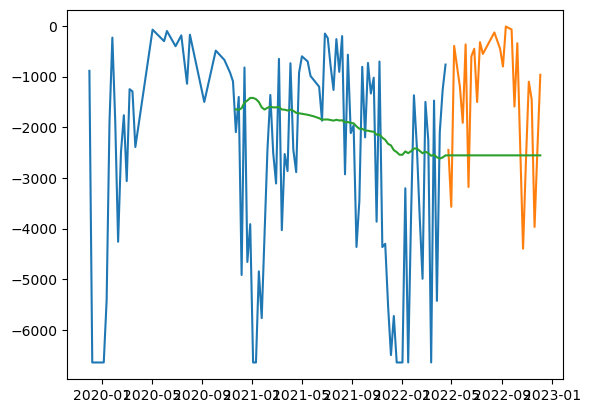

In [154]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [155]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

11.214915179433392


In [156]:
import matplotlib.pyplot as plt
tl=125
tr=d2[0:tl]
tt=d2[tl:]

ma=d2.copy()
window_size=52
ma['forecast']=d2['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/3265162598.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/3265162598.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` ins

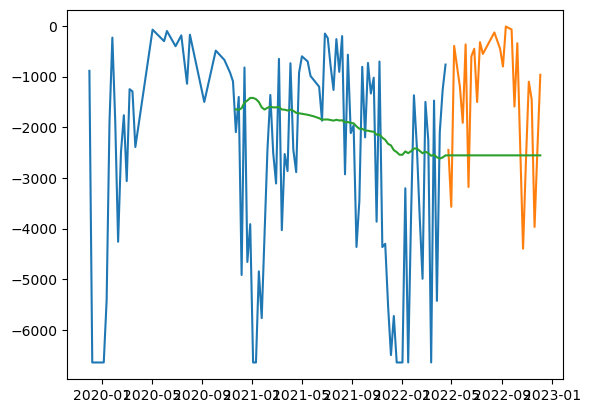

In [157]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [158]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

11.214915179433392


In [159]:
import matplotlib.pyplot as plt
tl=125
tr=d3[0:tl]
tt=d3[tl:]

ma=d3.copy()
window_size=52
ma['forecast']=d3['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2178226014.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2178226014.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` ins

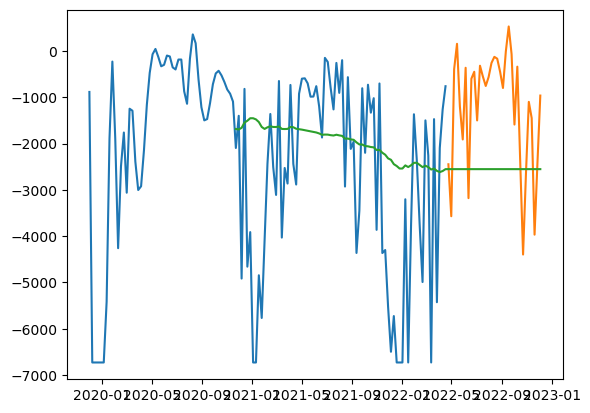

In [160]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [161]:
import matplotlib.pyplot as plt
tl=125
tr=d4[0:tl]
tt=d4[tl:]

ma=d4.copy()
window_size=52
ma['forecast']=d4['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/1383618506.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/1383618506.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` ins

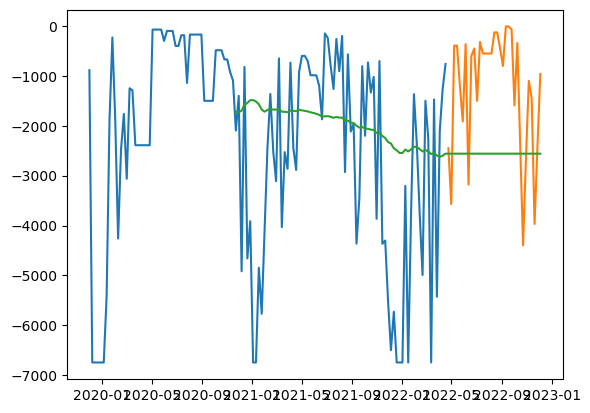

In [162]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [163]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

16.018610925702976


In [164]:
import matplotlib.pyplot as plt
tl=125
tr=d5[0:tl]
tt=d5[tl:]

ma=d5.copy()
window_size=52
ma['forecast']=d5['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2686684914.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2686684914.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` ins

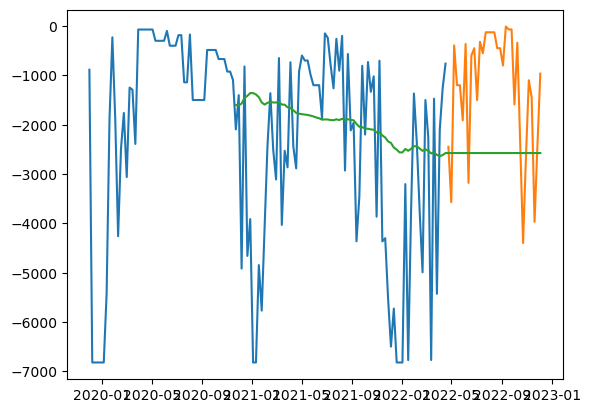

In [165]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [166]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

11.407844392792775


In [167]:
import matplotlib.pyplot as plt
tl=125
tr=d6[0:tl]
tt=d6[tl:]

ma=d6.copy()
window_size=52
ma['forecast']=d6['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/346624677.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/346624677.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` inste

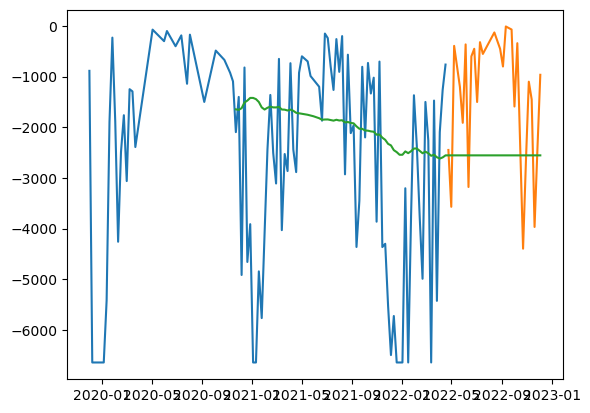

In [168]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [169]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

11.208480567234583


In [170]:
import matplotlib.pyplot as plt
tl=125
tr=d7[0:tl]
tt=d7[tl:]

ma=d7.copy()
window_size=52
ma['forecast']=d7['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/630900693.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/630900693.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` inste

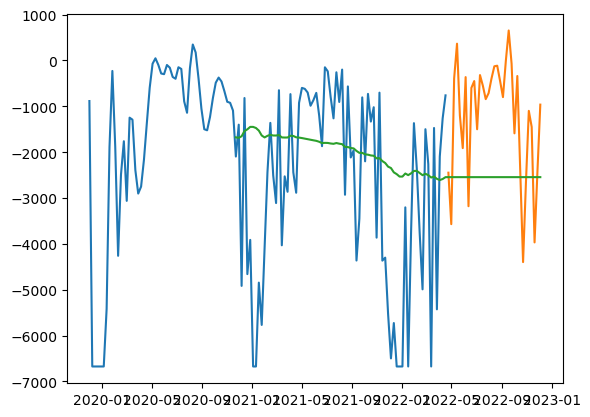

In [171]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [172]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

9.956995268875323


In [173]:
import matplotlib.pyplot as plt
tl=125
tr=d8[0:tl]
tt=d8[tl:]

ma=d8.copy()
window_size=52
ma['forecast']=d8['QUANTITY'].rolling(window_size).mean()
ma['forecast'][tl:]=ma['forecast'][tl-1]

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/157521582.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma['forecast'][tl:]=ma['forecast'][tl-1]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/157521582.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` inste

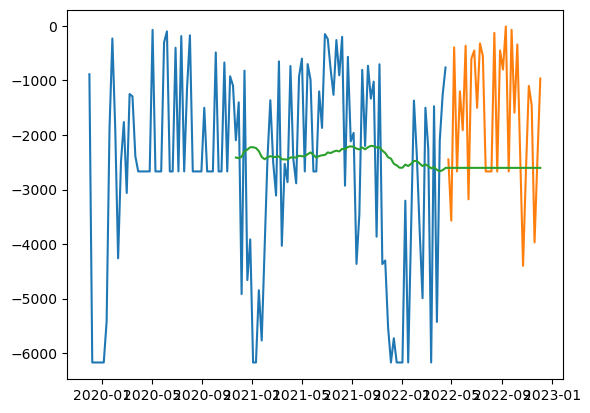

In [174]:
plt.plot(tr['QUANTITY'],label='train')
plt.plot(tt['QUANTITY'],label='test')
plt.plot(ma['forecast'],label='simple average forecast')

In [175]:
print(mean_absolute_percentage_error(ma.iloc[115:156,0:1],ma.iloc[115:156,1:]))

9.097061455459267


# Holt-Winters Method

In [176]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d1[:125]
test_data = d1[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [177]:
predictions = result.forecast(len(test_data))

In [178]:
predictions

2022-04-24   -1493.919666
2022-05-01   -1140.852149
2022-05-08   -1178.637534
2022-05-15   -1214.680993
2022-05-22   -1434.193464
2022-05-29   -1390.466506
2022-06-05   -1252.844944
2022-06-12   -1388.572717
2022-06-19   -1652.041424
2022-06-26   -1399.034823
2022-07-03   -1372.071960
2022-07-10   -1414.047249
2022-07-17   -1872.029717
2022-07-24   -2000.896489
2022-07-31   -1345.654213
2022-08-07   -1409.194914
2022-08-14   -2214.563901
2022-08-21   -1919.494980
2022-08-28   -2464.464394
2022-09-04   -2646.134471
2022-09-11   -2931.823104
2022-09-18   -2489.736677
2022-09-25   -1715.404390
2022-10-02   -1816.717610
2022-10-09   -1550.960640
2022-10-16   -1718.666405
2022-10-23   -1693.035247
2022-10-30   -2382.558952
2022-11-06   -1794.678036
2022-11-13   -2697.347515
2022-11-20   -3437.603128
2022-11-27   -3068.175031
2022-12-04   -6299.411273
Freq: W-SUN, dtype: float64

In [179]:
print(mean_absolute_percentage_error(d1[125:],predictions))

13.517401718772085


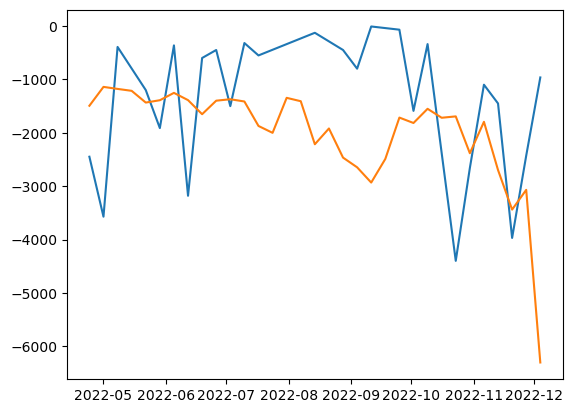

In [180]:

plt.plot(d1[125:],label='test')
plt.plot(predictions,label='forecast')

In [181]:
result.predict(157)

2022-12-04   -6299.411273
Freq: W-SUN, dtype: float64

In [182]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d2[:125]
test_data = d2[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [183]:
predictions = result.forecast(len(test_data))

In [184]:
print(mean_absolute_percentage_error(d2[125:],predictions))

13.517401718772085


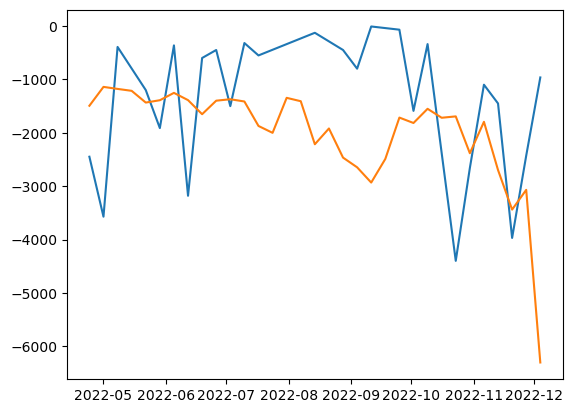

In [185]:
plt.plot(d2[125:],label='test')
plt.plot(predictions,label='forecast')

In [186]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d3[:125]
test_data = d3[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [187]:
predictions = result.forecast(len(test_data))

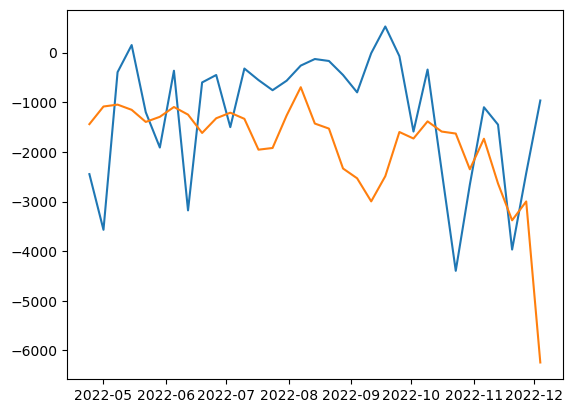

In [188]:
plt.plot(d3[125:],label='test')
plt.plot(predictions,label='forecast')

In [189]:
print(mean_absolute_percentage_error(d3[125:],predictions))

11.84308411820286


In [190]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d4[:125]
test_data = d4[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [191]:
predictions = result.forecast(len(test_data))

In [192]:
print(mean_absolute_percentage_error(d4[125:],predictions))

19.804123073751974


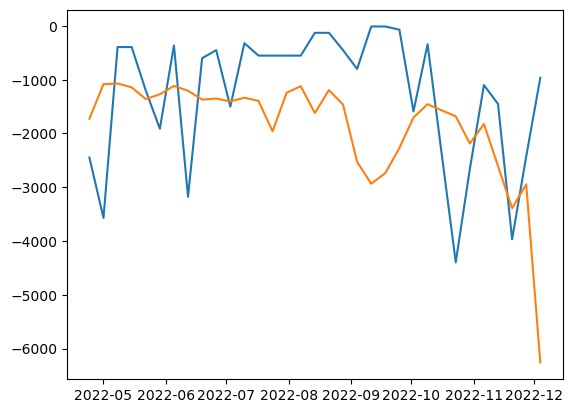

In [193]:
plt.plot(d4[125:],label='test')
plt.plot(predictions,label='forecast')

In [194]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d5[:125]
test_data = d5[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [195]:
predictions = result.forecast(len(test_data))

In [196]:
print(mean_absolute_percentage_error(d5[125:],predictions))

11.2677105747388


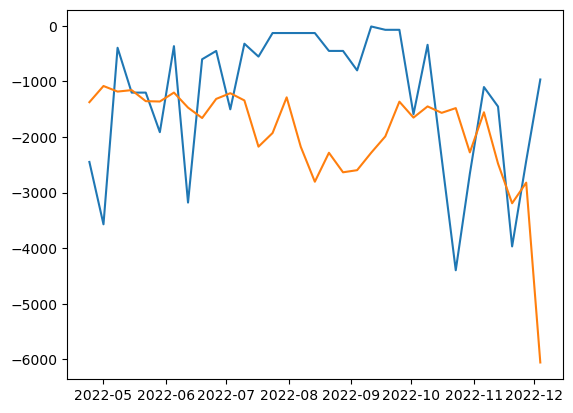

In [197]:
plt.plot(d5[125:],label='test')
plt.plot(predictions,label='forecast')

In [198]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d6[:125]
test_data = d6[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [199]:
predictions = result.forecast(len(test_data))

In [200]:
print(mean_absolute_percentage_error(d6[125:],predictions))

13.509650048677178


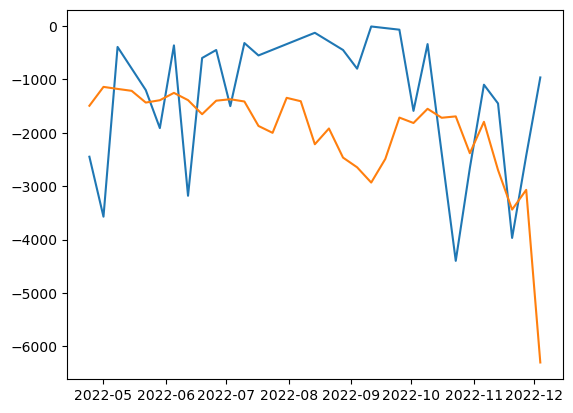

In [201]:
plt.plot(d6[125:],label='test')
plt.plot(predictions,label='forecast')

In [202]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d7[:125]
test_data = d7[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [203]:
predictions = result.forecast(len(test_data))

In [204]:
print(mean_absolute_percentage_error(d7[125:],predictions))

11.824627512070716


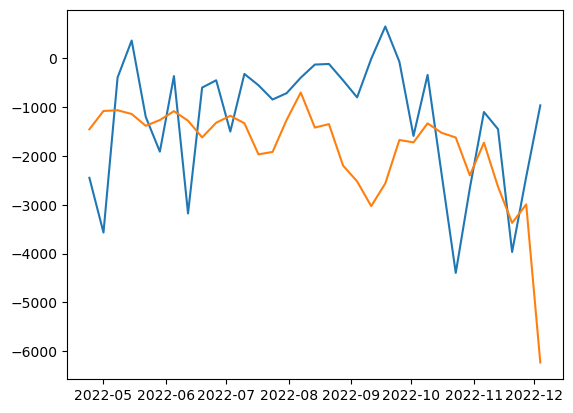

In [205]:
plt.plot(d7[125:],label='test')
plt.plot(predictions,label='forecast')

In [206]:
from statsmodels.tsa.api import ExponentialSmoothing
train_data = d8[:125]
test_data = d8[125:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=52)
result = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [207]:
predictions = result.forecast(len(test_data))

In [208]:
print(mean_absolute_percentage_error(d8[125:],predictions))

13.529405444014786


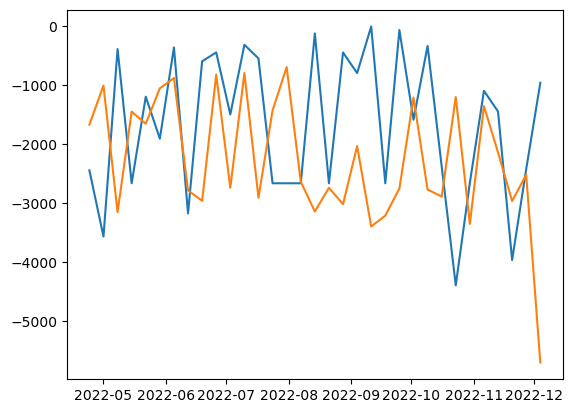

In [209]:
plt.plot(d8[125:],label='test')
plt.plot(predictions,label='forecast')

# Simple Exponential smoothing

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


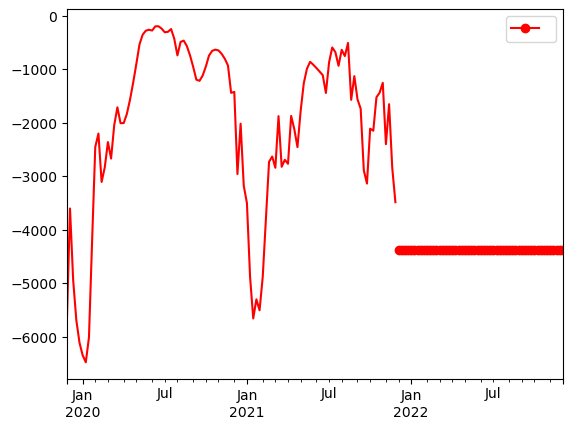

In [210]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d1.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(53)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [211]:
fcast1 

2021-12-05   -4382.226076
2021-12-12   -4382.226076
2021-12-19   -4382.226076
2021-12-26   -4382.226076
2022-01-02   -4382.226076
2022-01-09   -4382.226076
2022-01-16   -4382.226076
2022-01-23   -4382.226076
2022-01-30   -4382.226076
2022-02-06   -4382.226076
2022-02-13   -4382.226076
2022-02-20   -4382.226076
2022-02-27   -4382.226076
2022-03-06   -4382.226076
2022-03-13   -4382.226076
2022-03-20   -4382.226076
2022-03-27   -4382.226076
2022-04-03   -4382.226076
2022-04-10   -4382.226076
2022-04-17   -4382.226076
2022-04-24   -4382.226076
2022-05-01   -4382.226076
2022-05-08   -4382.226076
2022-05-15   -4382.226076
2022-05-22   -4382.226076
2022-05-29   -4382.226076
2022-06-05   -4382.226076
2022-06-12   -4382.226076
2022-06-19   -4382.226076
2022-06-26   -4382.226076
2022-07-03   -4382.226076
2022-07-10   -4382.226076
2022-07-17   -4382.226076
2022-07-24   -4382.226076
2022-07-31   -4382.226076
2022-08-07   -4382.226076
2022-08-14   -4382.226076
2022-08-21   -4382.226076
2022-08-28  

In [212]:
d1

QUANTITY
2019-12-01  -886.0000
2019-12-08 -6643.5625
2019-12-15 -6643.5625
2019-12-22 -6643.5625
2019-12-29 -6643.5625
...               ...
2022-11-06 -1100.0000
2022-11-13 -1451.0000
2022-11-20 -3968.0000
2022-11-27 -2428.0000
2022-12-04  -964.0000

[158 rows x 1 columns]

In [213]:
print(mean_absolute_percentage_error(d1[105:],fcast1))

15.436653282633012


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


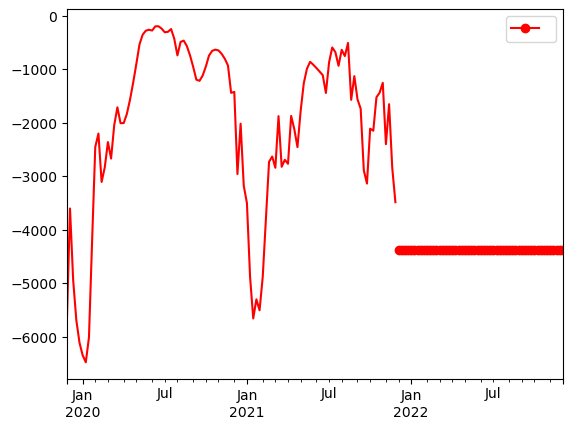

In [214]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d2.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(53)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [215]:
fcast1

2021-12-05   -4382.226076
2021-12-12   -4382.226076
2021-12-19   -4382.226076
2021-12-26   -4382.226076
2022-01-02   -4382.226076
2022-01-09   -4382.226076
2022-01-16   -4382.226076
2022-01-23   -4382.226076
2022-01-30   -4382.226076
2022-02-06   -4382.226076
2022-02-13   -4382.226076
2022-02-20   -4382.226076
2022-02-27   -4382.226076
2022-03-06   -4382.226076
2022-03-13   -4382.226076
2022-03-20   -4382.226076
2022-03-27   -4382.226076
2022-04-03   -4382.226076
2022-04-10   -4382.226076
2022-04-17   -4382.226076
2022-04-24   -4382.226076
2022-05-01   -4382.226076
2022-05-08   -4382.226076
2022-05-15   -4382.226076
2022-05-22   -4382.226076
2022-05-29   -4382.226076
2022-06-05   -4382.226076
2022-06-12   -4382.226076
2022-06-19   -4382.226076
2022-06-26   -4382.226076
2022-07-03   -4382.226076
2022-07-10   -4382.226076
2022-07-17   -4382.226076
2022-07-24   -4382.226076
2022-07-31   -4382.226076
2022-08-07   -4382.226076
2022-08-14   -4382.226076
2022-08-21   -4382.226076
2022-08-28  

In [216]:
print(mean_absolute_percentage_error(d2[105:],fcast1))

15.436653282633012


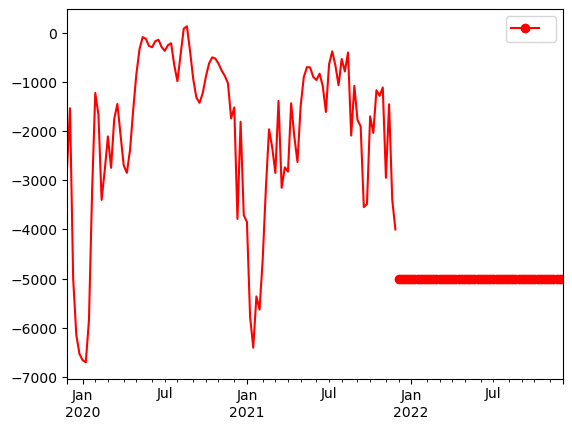

In [217]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d3.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(53)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [218]:
fcast1

2021-12-05   -5018.263817
2021-12-12   -5018.263817
2021-12-19   -5018.263817
2021-12-26   -5018.263817
2022-01-02   -5018.263817
2022-01-09   -5018.263817
2022-01-16   -5018.263817
2022-01-23   -5018.263817
2022-01-30   -5018.263817
2022-02-06   -5018.263817
2022-02-13   -5018.263817
2022-02-20   -5018.263817
2022-02-27   -5018.263817
2022-03-06   -5018.263817
2022-03-13   -5018.263817
2022-03-20   -5018.263817
2022-03-27   -5018.263817
2022-04-03   -5018.263817
2022-04-10   -5018.263817
2022-04-17   -5018.263817
2022-04-24   -5018.263817
2022-05-01   -5018.263817
2022-05-08   -5018.263817
2022-05-15   -5018.263817
2022-05-22   -5018.263817
2022-05-29   -5018.263817
2022-06-05   -5018.263817
2022-06-12   -5018.263817
2022-06-19   -5018.263817
2022-06-26   -5018.263817
2022-07-03   -5018.263817
2022-07-10   -5018.263817
2022-07-17   -5018.263817
2022-07-24   -5018.263817
2022-07-31   -5018.263817
2022-08-07   -5018.263817
2022-08-14   -5018.263817
2022-08-21   -5018.263817
2022-08-28  

In [219]:
print(mean_absolute_percentage_error(d3[105:],fcast1))

16.158025332970148


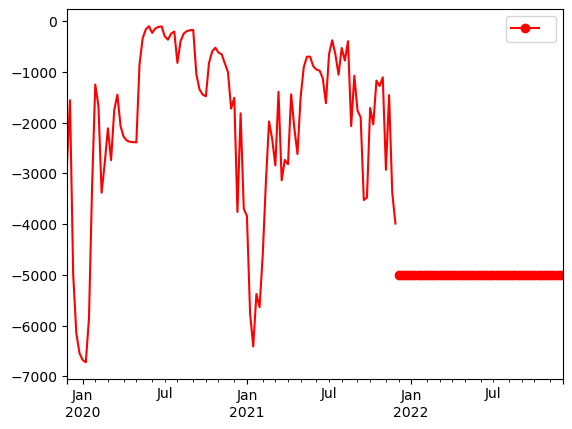

In [220]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d4.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(53)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [221]:
fcast1

2021-12-05   -5003.199182
2021-12-12   -5003.199182
2021-12-19   -5003.199182
2021-12-26   -5003.199182
2022-01-02   -5003.199182
2022-01-09   -5003.199182
2022-01-16   -5003.199182
2022-01-23   -5003.199182
2022-01-30   -5003.199182
2022-02-06   -5003.199182
2022-02-13   -5003.199182
2022-02-20   -5003.199182
2022-02-27   -5003.199182
2022-03-06   -5003.199182
2022-03-13   -5003.199182
2022-03-20   -5003.199182
2022-03-27   -5003.199182
2022-04-03   -5003.199182
2022-04-10   -5003.199182
2022-04-17   -5003.199182
2022-04-24   -5003.199182
2022-05-01   -5003.199182
2022-05-08   -5003.199182
2022-05-15   -5003.199182
2022-05-22   -5003.199182
2022-05-29   -5003.199182
2022-06-05   -5003.199182
2022-06-12   -5003.199182
2022-06-19   -5003.199182
2022-06-26   -5003.199182
2022-07-03   -5003.199182
2022-07-10   -5003.199182
2022-07-17   -5003.199182
2022-07-24   -5003.199182
2022-07-31   -5003.199182
2022-08-07   -5003.199182
2022-08-14   -5003.199182
2022-08-21   -5003.199182
2022-08-28  

In [222]:
print(mean_absolute_percentage_error(d4[105:],fcast1))

24.9515083400683


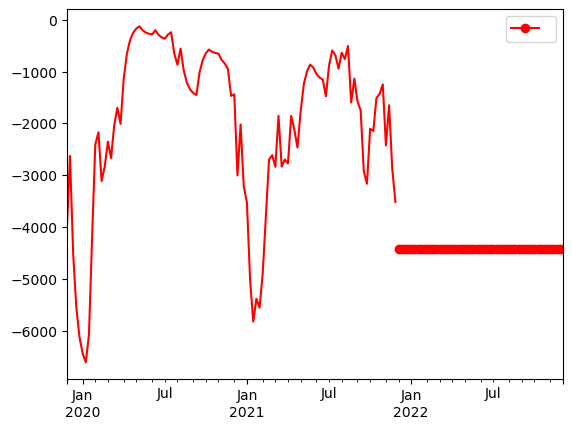

In [223]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d5.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(53)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [224]:
fcast1

2021-12-05   -4419.127116
2021-12-12   -4419.127116
2021-12-19   -4419.127116
2021-12-26   -4419.127116
2022-01-02   -4419.127116
2022-01-09   -4419.127116
2022-01-16   -4419.127116
2022-01-23   -4419.127116
2022-01-30   -4419.127116
2022-02-06   -4419.127116
2022-02-13   -4419.127116
2022-02-20   -4419.127116
2022-02-27   -4419.127116
2022-03-06   -4419.127116
2022-03-13   -4419.127116
2022-03-20   -4419.127116
2022-03-27   -4419.127116
2022-04-03   -4419.127116
2022-04-10   -4419.127116
2022-04-17   -4419.127116
2022-04-24   -4419.127116
2022-05-01   -4419.127116
2022-05-08   -4419.127116
2022-05-15   -4419.127116
2022-05-22   -4419.127116
2022-05-29   -4419.127116
2022-06-05   -4419.127116
2022-06-12   -4419.127116
2022-06-19   -4419.127116
2022-06-26   -4419.127116
2022-07-03   -4419.127116
2022-07-10   -4419.127116
2022-07-17   -4419.127116
2022-07-24   -4419.127116
2022-07-31   -4419.127116
2022-08-07   -4419.127116
2022-08-14   -4419.127116
2022-08-21   -4419.127116
2022-08-28  

In [225]:
print(mean_absolute_percentage_error(d5[105:],fcast1))

15.707429035874194


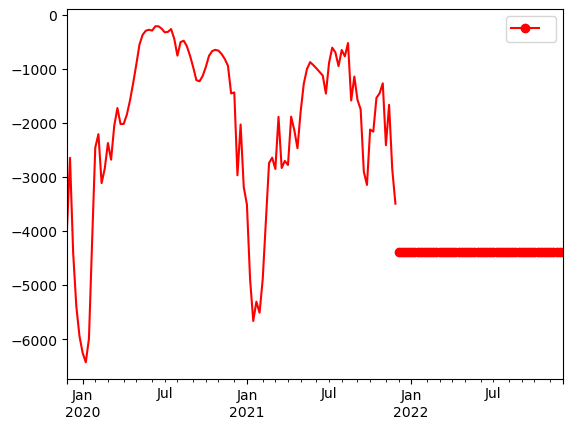

In [226]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d6.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(53)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [227]:
fcast1

2021-12-05   -4382.226133
2021-12-12   -4382.226133
2021-12-19   -4382.226133
2021-12-26   -4382.226133
2022-01-02   -4382.226133
2022-01-09   -4382.226133
2022-01-16   -4382.226133
2022-01-23   -4382.226133
2022-01-30   -4382.226133
2022-02-06   -4382.226133
2022-02-13   -4382.226133
2022-02-20   -4382.226133
2022-02-27   -4382.226133
2022-03-06   -4382.226133
2022-03-13   -4382.226133
2022-03-20   -4382.226133
2022-03-27   -4382.226133
2022-04-03   -4382.226133
2022-04-10   -4382.226133
2022-04-17   -4382.226133
2022-04-24   -4382.226133
2022-05-01   -4382.226133
2022-05-08   -4382.226133
2022-05-15   -4382.226133
2022-05-22   -4382.226133
2022-05-29   -4382.226133
2022-06-05   -4382.226133
2022-06-12   -4382.226133
2022-06-19   -4382.226133
2022-06-26   -4382.226133
2022-07-03   -4382.226133
2022-07-10   -4382.226133
2022-07-17   -4382.226133
2022-07-24   -4382.226133
2022-07-31   -4382.226133
2022-08-07   -4382.226133
2022-08-14   -4382.226133
2022-08-21   -4382.226133
2022-08-28  

In [228]:
print(mean_absolute_percentage_error(d6[105:],fcast1))

15.428097955456959


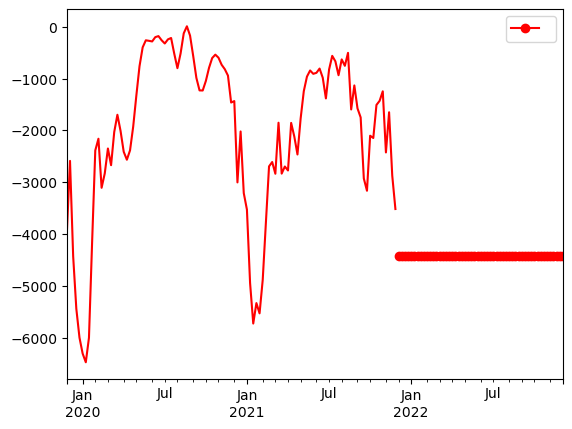

In [229]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d7.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(53)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [230]:
fcast1

2021-12-05   -4419.127062
2021-12-12   -4419.127062
2021-12-19   -4419.127062
2021-12-26   -4419.127062
2022-01-02   -4419.127062
2022-01-09   -4419.127062
2022-01-16   -4419.127062
2022-01-23   -4419.127062
2022-01-30   -4419.127062
2022-02-06   -4419.127062
2022-02-13   -4419.127062
2022-02-20   -4419.127062
2022-02-27   -4419.127062
2022-03-06   -4419.127062
2022-03-13   -4419.127062
2022-03-20   -4419.127062
2022-03-27   -4419.127062
2022-04-03   -4419.127062
2022-04-10   -4419.127062
2022-04-17   -4419.127062
2022-04-24   -4419.127062
2022-05-01   -4419.127062
2022-05-08   -4419.127062
2022-05-15   -4419.127062
2022-05-22   -4419.127062
2022-05-29   -4419.127062
2022-06-05   -4419.127062
2022-06-12   -4419.127062
2022-06-19   -4419.127062
2022-06-26   -4419.127062
2022-07-03   -4419.127062
2022-07-10   -4419.127062
2022-07-17   -4419.127062
2022-07-24   -4419.127062
2022-07-31   -4419.127062
2022-08-07   -4419.127062
2022-08-14   -4419.127062
2022-08-21   -4419.127062
2022-08-28  

In [231]:
print(mean_absolute_percentage_error(d7[105:],fcast1))

13.886109394197575


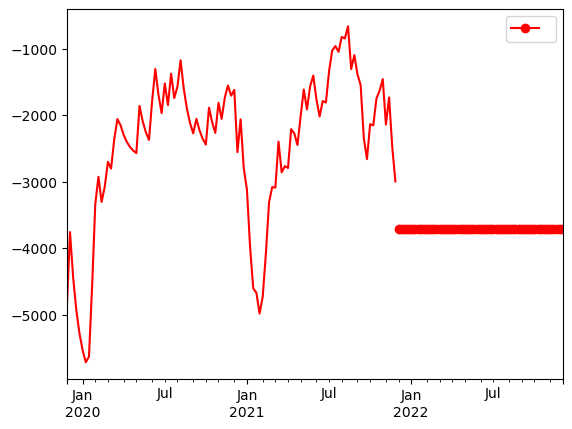

In [232]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(d8.iloc[:105],initialization_method="estimated").fit()
fcast1 = fit1.forecast(53)
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

In [233]:
fcast1

2021-12-05   -3713.892909
2021-12-12   -3713.892909
2021-12-19   -3713.892909
2021-12-26   -3713.892909
2022-01-02   -3713.892909
2022-01-09   -3713.892909
2022-01-16   -3713.892909
2022-01-23   -3713.892909
2022-01-30   -3713.892909
2022-02-06   -3713.892909
2022-02-13   -3713.892909
2022-02-20   -3713.892909
2022-02-27   -3713.892909
2022-03-06   -3713.892909
2022-03-13   -3713.892909
2022-03-20   -3713.892909
2022-03-27   -3713.892909
2022-04-03   -3713.892909
2022-04-10   -3713.892909
2022-04-17   -3713.892909
2022-04-24   -3713.892909
2022-05-01   -3713.892909
2022-05-08   -3713.892909
2022-05-15   -3713.892909
2022-05-22   -3713.892909
2022-05-29   -3713.892909
2022-06-05   -3713.892909
2022-06-12   -3713.892909
2022-06-19   -3713.892909
2022-06-26   -3713.892909
2022-07-03   -3713.892909
2022-07-10   -3713.892909
2022-07-17   -3713.892909
2022-07-24   -3713.892909
2022-07-31   -3713.892909
2022-08-07   -3713.892909
2022-08-14   -3713.892909
2022-08-21   -3713.892909
2022-08-28  

In [234]:
print(mean_absolute_percentage_error(d8[105:],fcast1))

10.398826023781256


#Prophet Modelling


In [235]:
!pip install pystan~=2.14

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      /private/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/pip-install-25bf8kk3/pystan_cf7a5a5c3e284422ade4344bfa827e2f/setup.py:61: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
        self.version = node.value.s
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 859.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━

In [237]:
!pip install prophet

19:00:19 - cmdstanpy - INFO - Chain [1] start processing
19:00:19 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

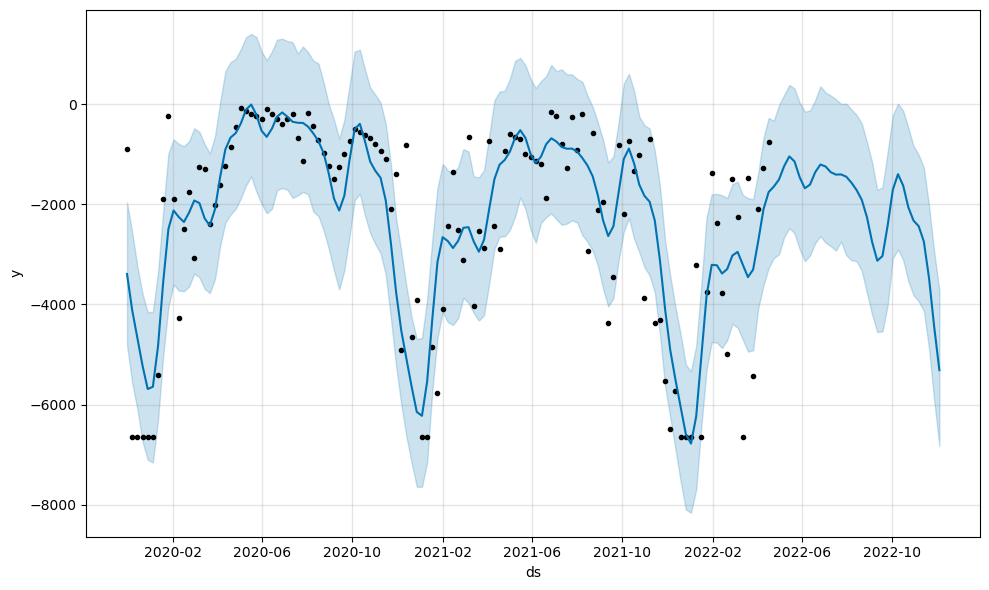

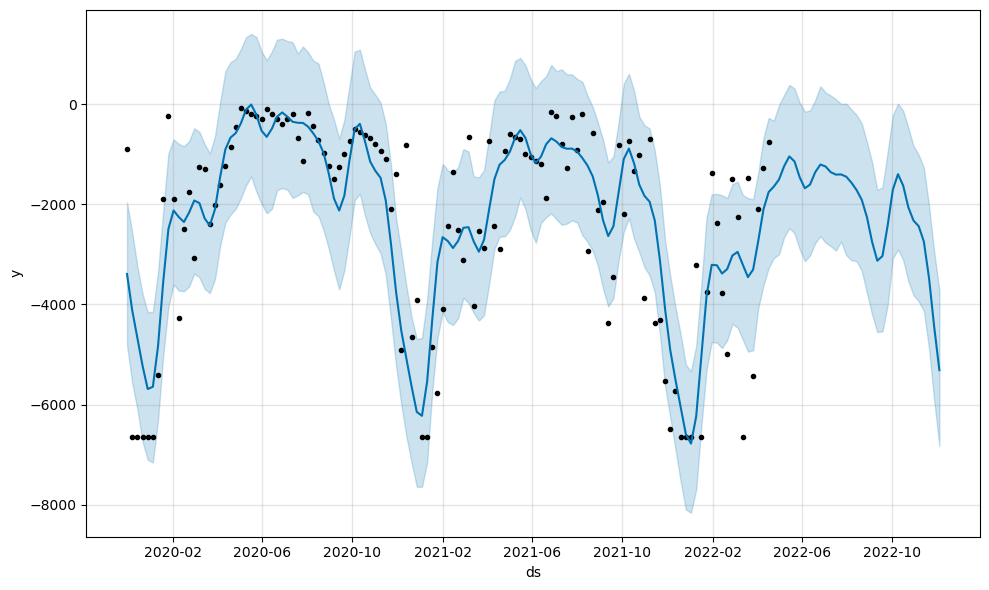

In [238]:
from prophet import Prophet
t1=d1.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=33, freq='w')
forecast = m.predict(future)
m.plot(forecast)

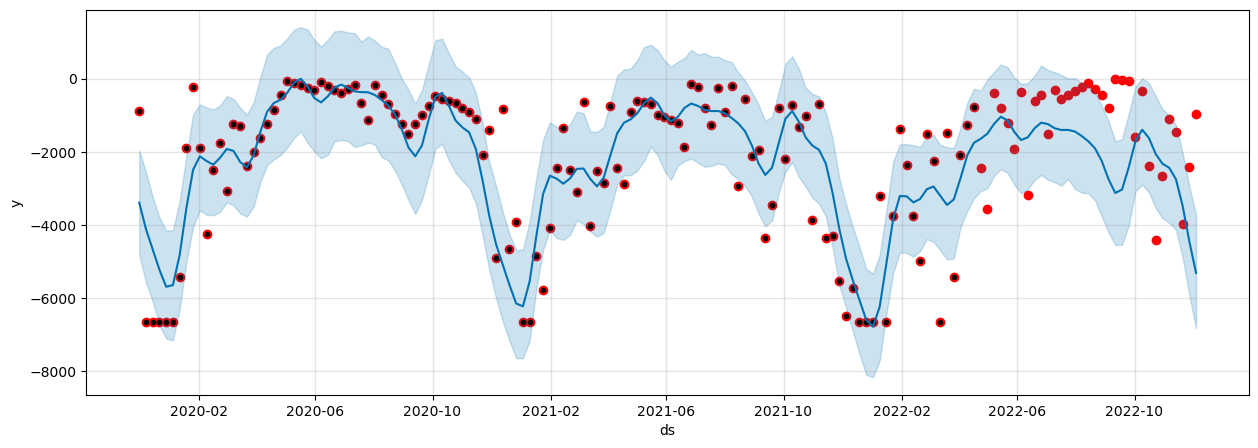

In [239]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)


In [240]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d1.iloc[125:,0:],forecast['yhat'].iloc[125:]))

14.631336706341699


19:00:42 - cmdstanpy - INFO - Chain [1] start processing
19:00:42 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

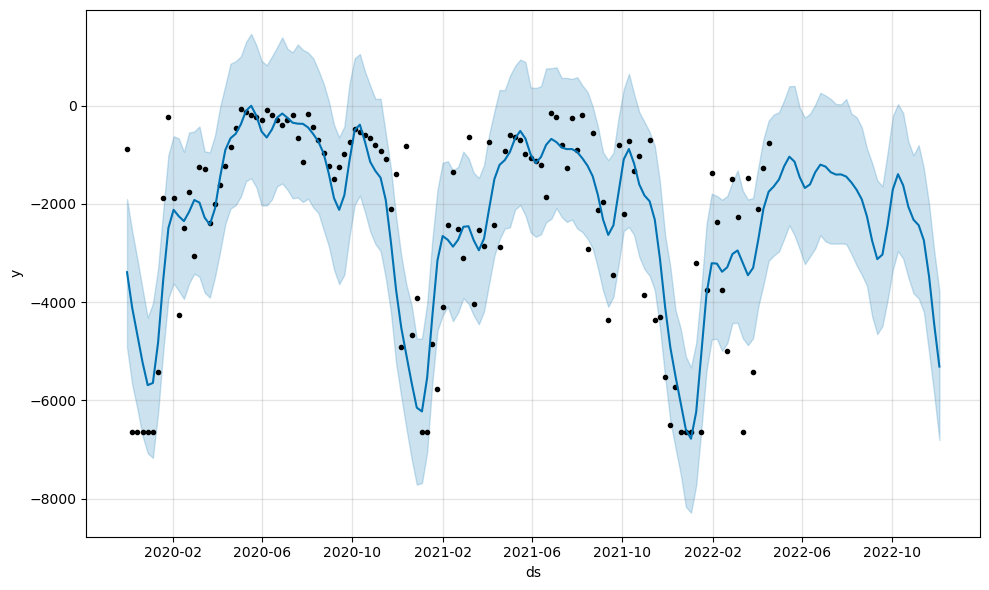

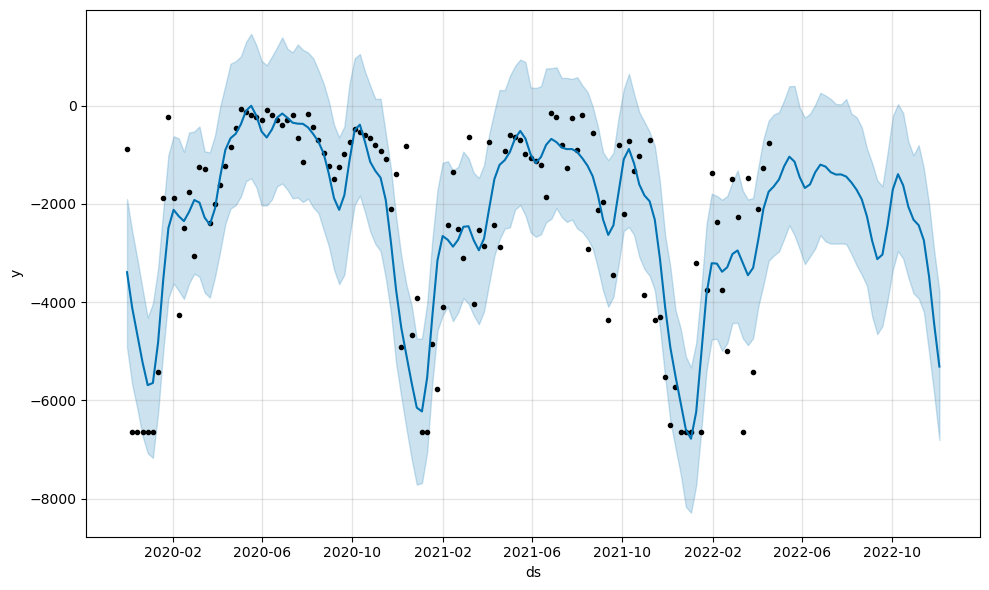

In [242]:
from prophet import Prophet
t1=d2.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=33, freq='w')
forecast = m.predict(future)
m.plot(forecast)

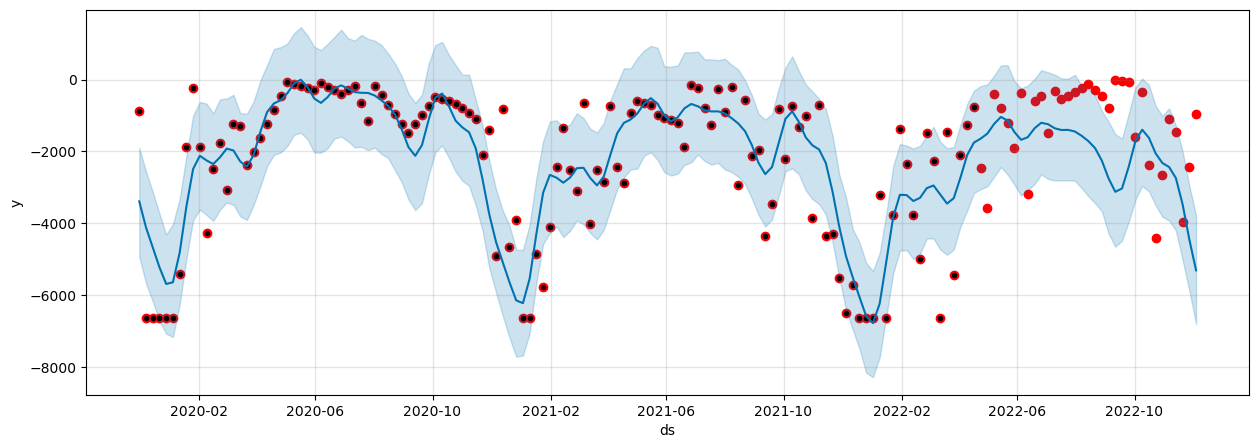

In [243]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [244]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d2.iloc[125:,0:],forecast['yhat'].iloc[125:]))

14.631336706341699


19:01:02 - cmdstanpy - INFO - Chain [1] start processing
19:01:02 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

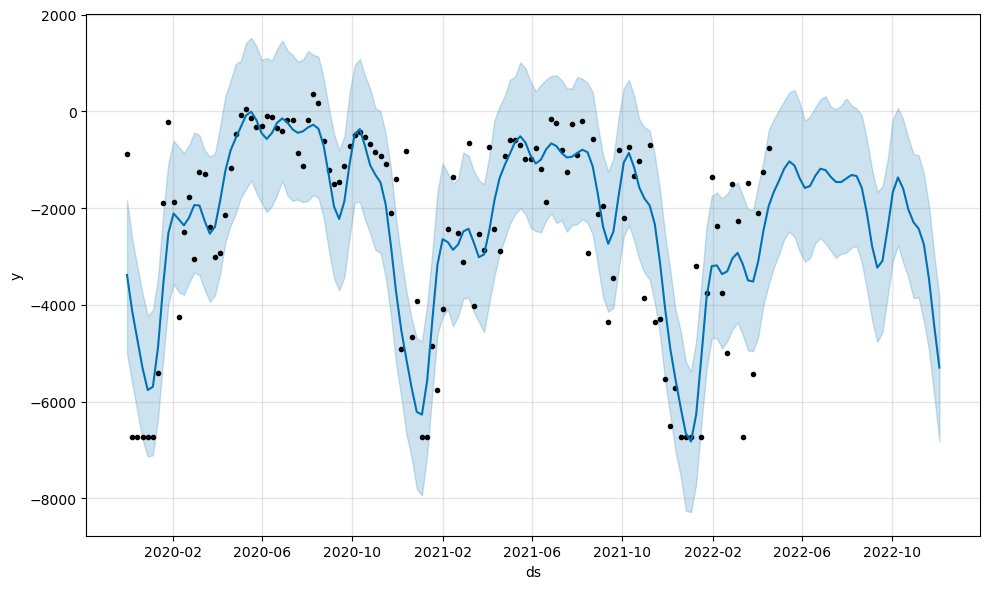

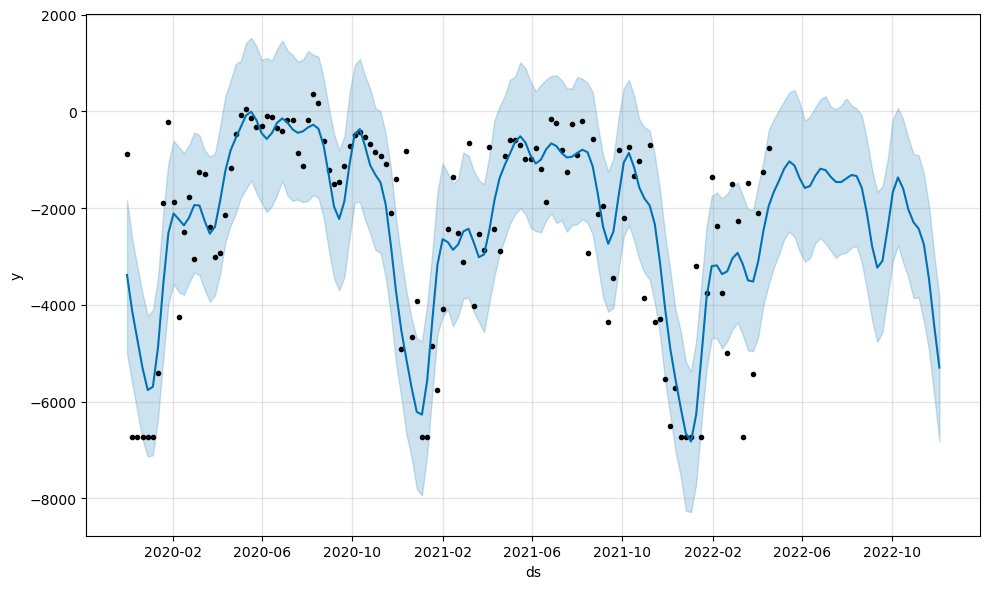

In [246]:
from prophet import Prophet
t1=d3.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=33, freq='w')
forecast = m.predict(future)
m.plot(forecast)

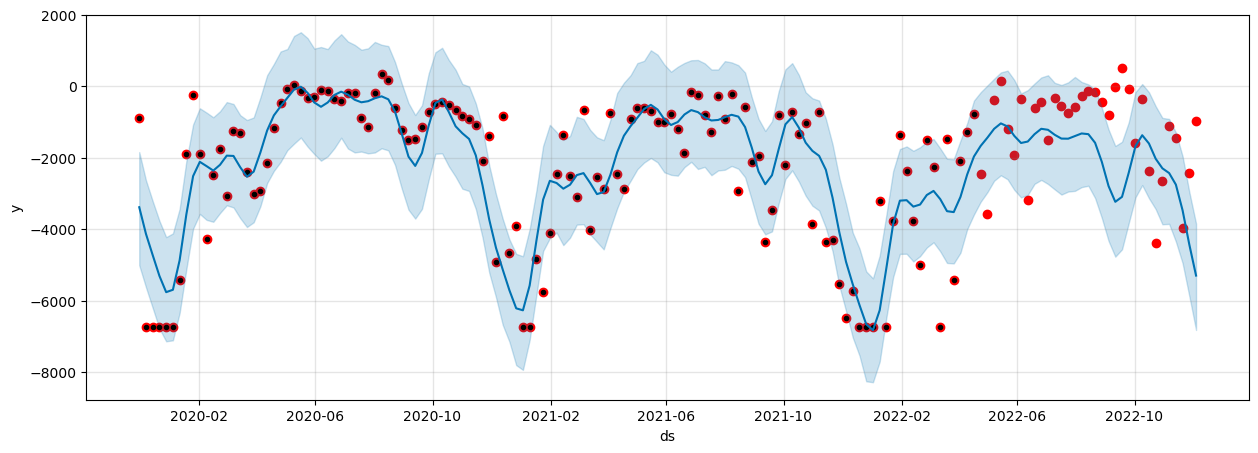

In [247]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [248]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d3.iloc[125:,0:],forecast['yhat'].iloc[125:]))

12.955445144998734


19:01:17 - cmdstanpy - INFO - Chain [1] start processing
19:01:17 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

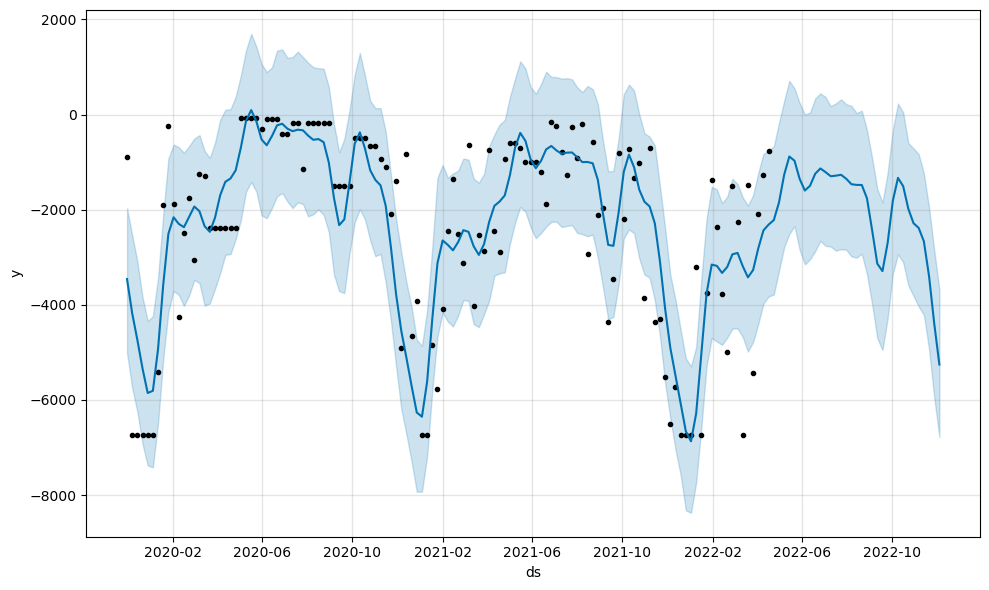

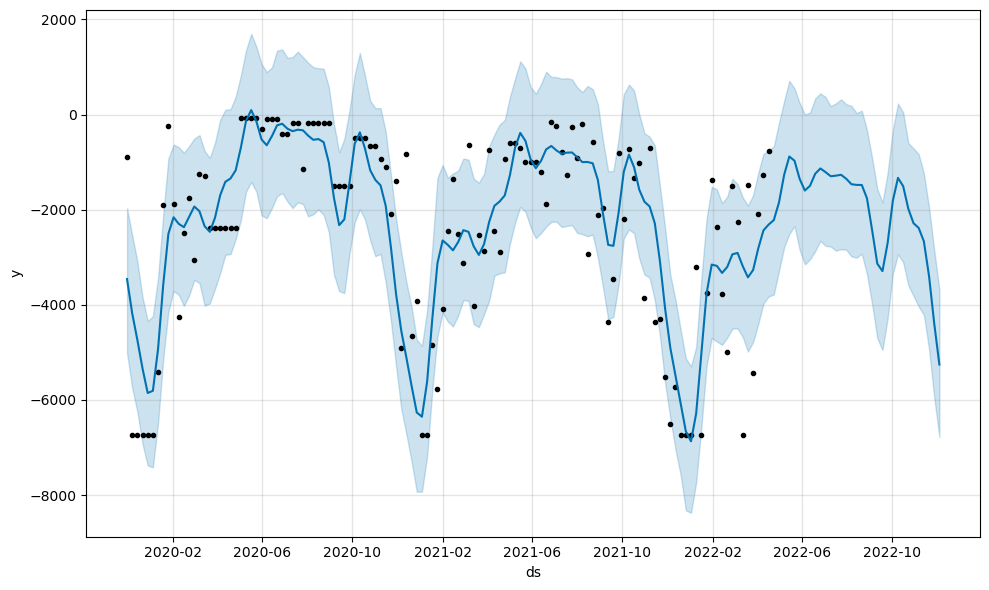

In [250]:
from prophet import Prophet
t1=d4.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=33, freq='w')
forecast = m.predict(future)
m.plot(forecast)

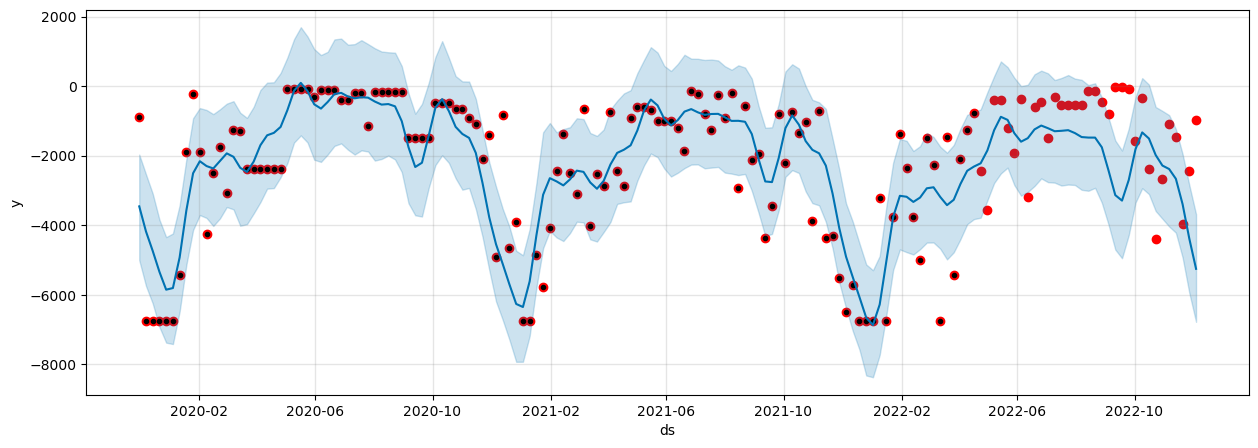

In [251]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [252]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d4.iloc[125:,0:],forecast['yhat'].iloc[125:]))

22.293378107352904


19:01:26 - cmdstanpy - INFO - Chain [1] start processing


19:01:26 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


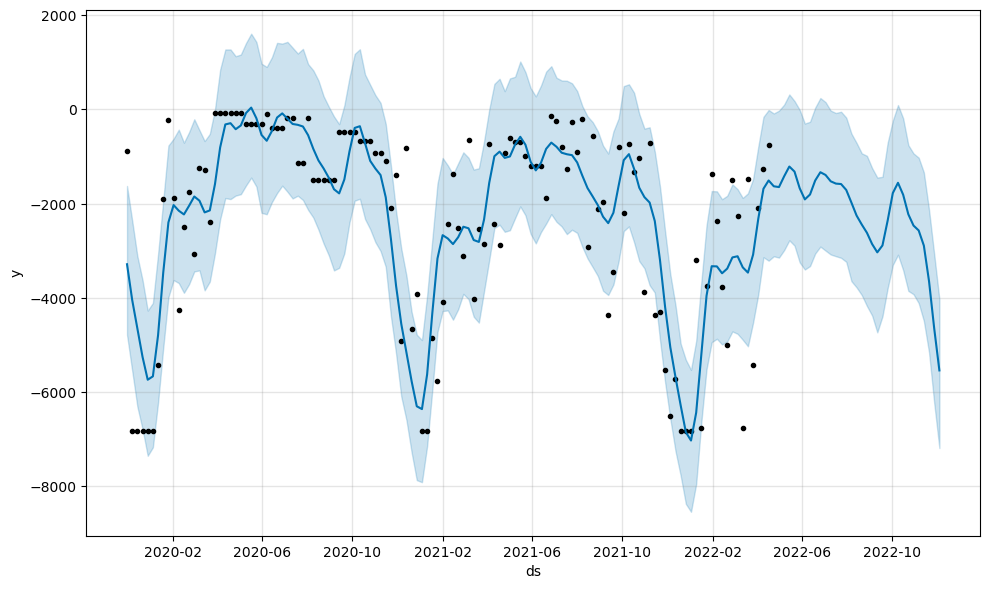

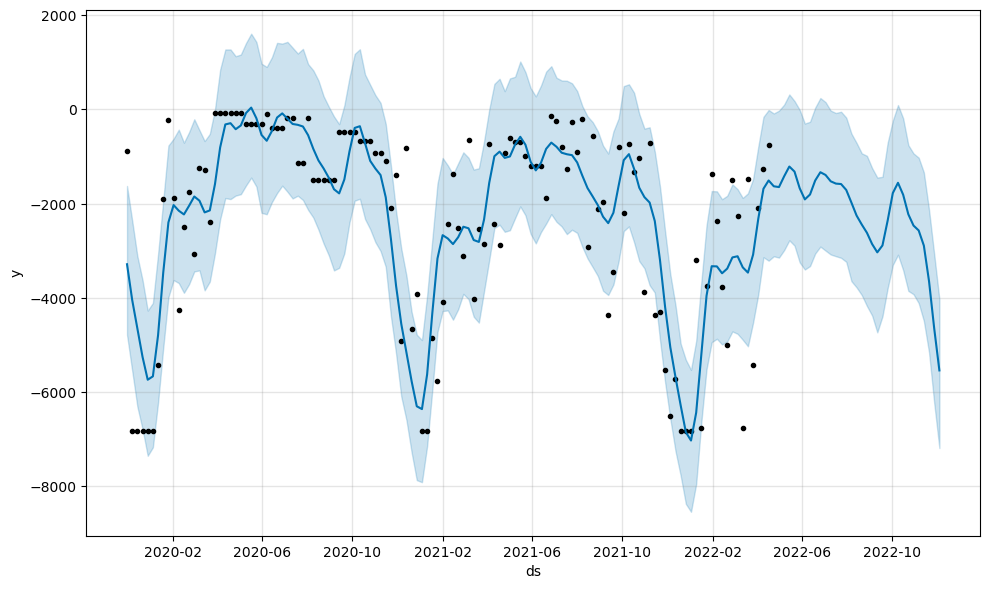

In [254]:
from prophet import Prophet
t1=d5.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=33, freq='w')
forecast = m.predict(future)
m.plot(forecast)

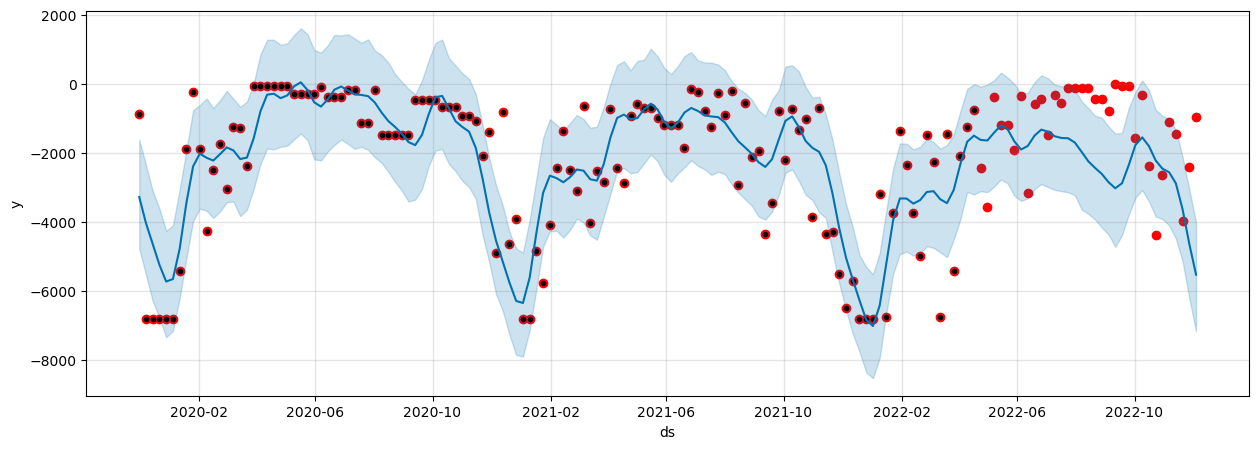

In [255]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)


In [256]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d5.iloc[125:,0:],forecast['yhat'].iloc[125:]))

14.303217672970659


19:01:38 - cmdstanpy - INFO - Chain [1] start processing
19:01:38 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

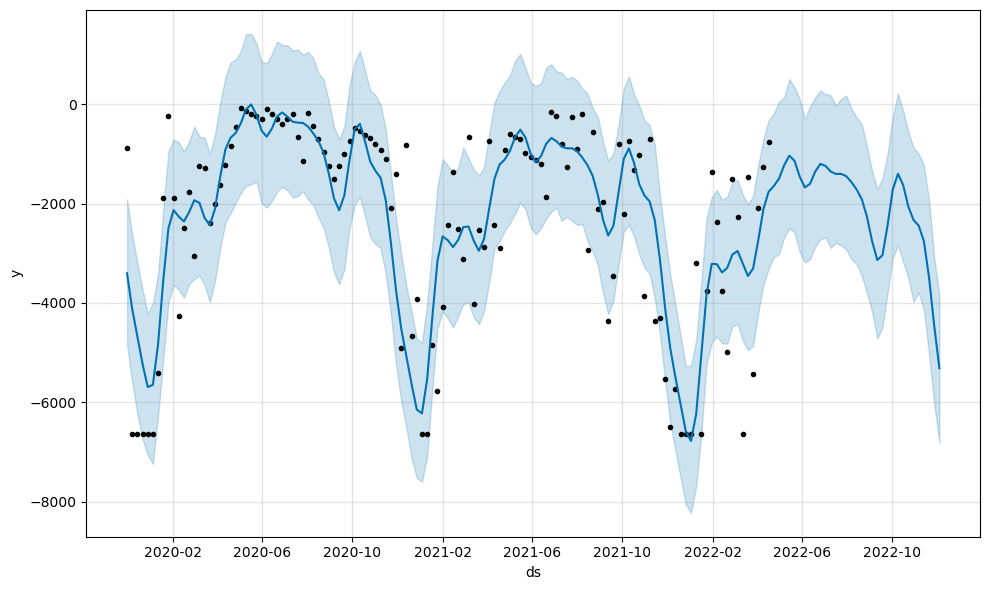

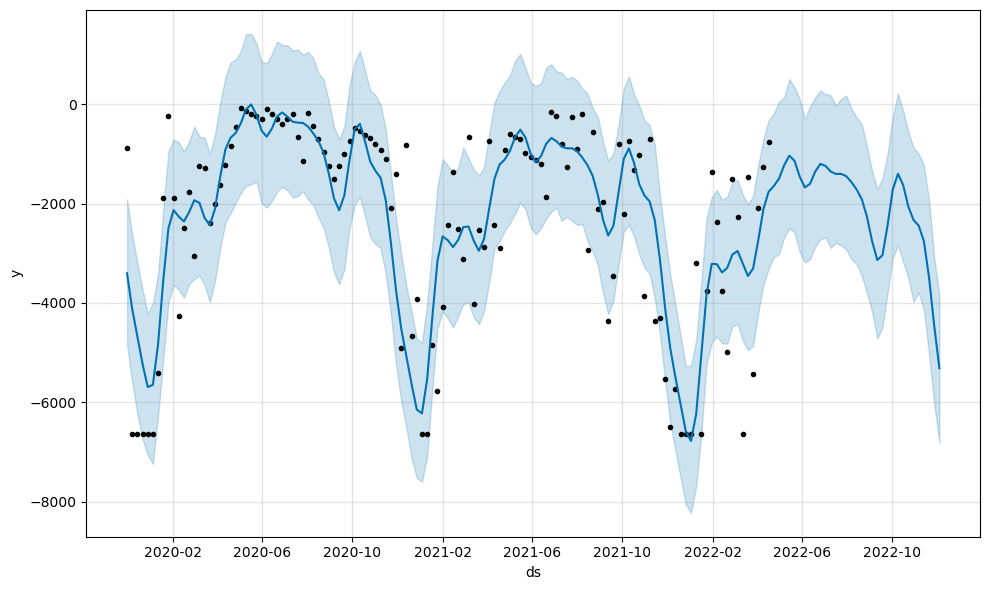

In [258]:
from prophet import Prophet
t1=d6.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=33, freq='w')
forecast = m.predict(future)
m.plot(forecast)

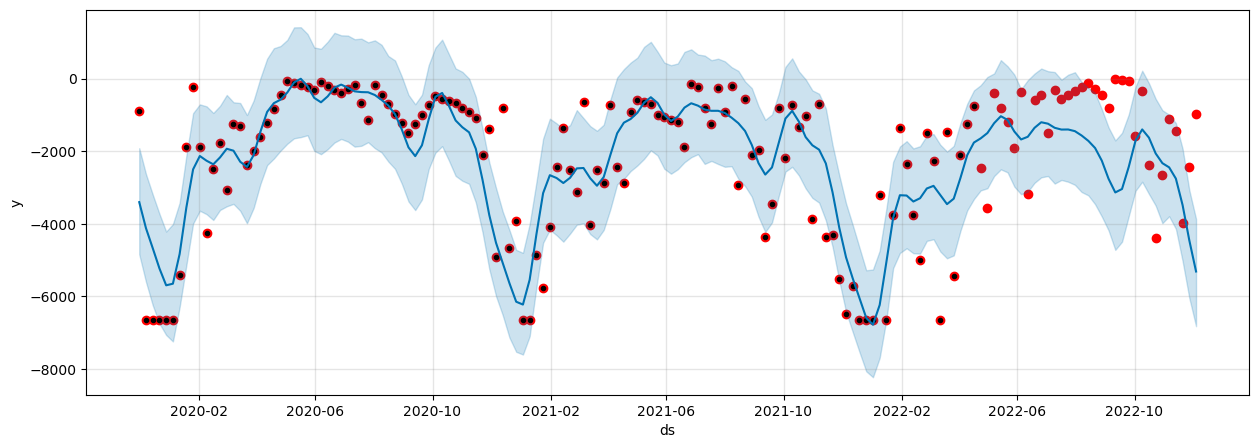

In [259]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [260]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d6.iloc[125:,0:],forecast['yhat'].iloc[125:]))

14.662047151398585


19:01:49 - cmdstanpy - INFO - Chain [1] start processing
19:01:49 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

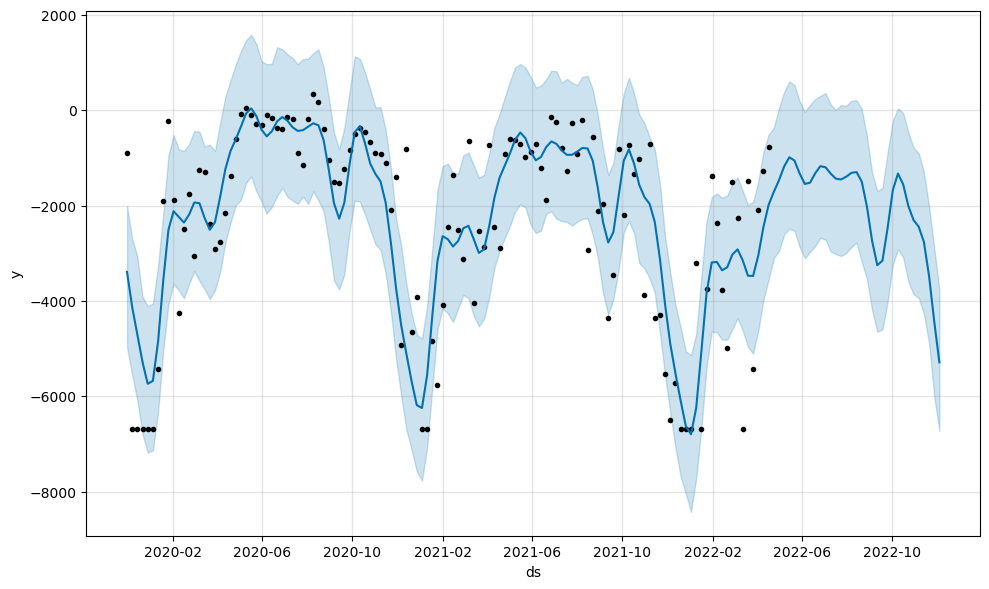

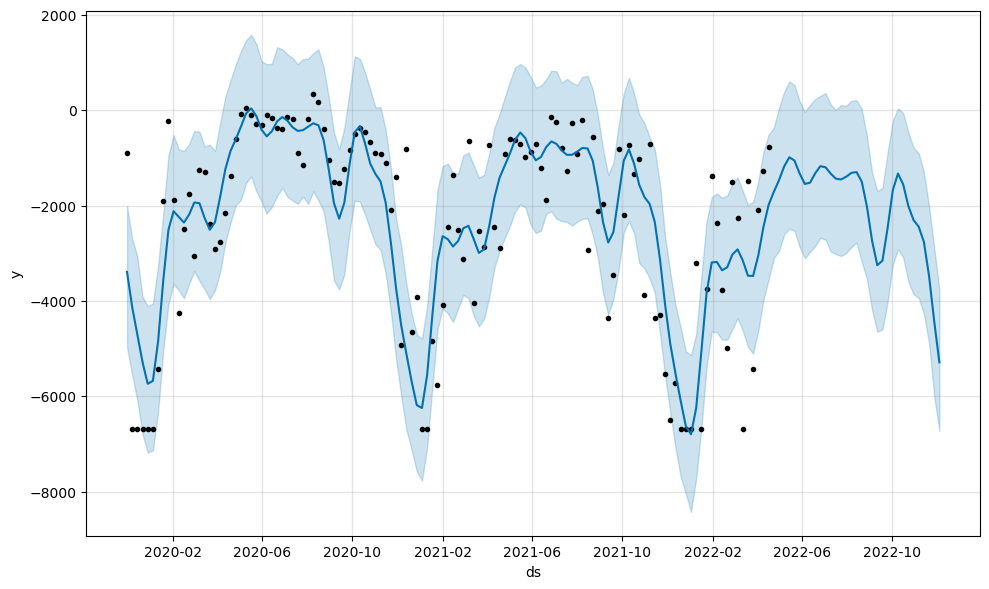

In [262]:
from prophet import Prophet
t1=d7.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=33, freq='w')
forecast = m.predict(future)
m.plot(forecast)


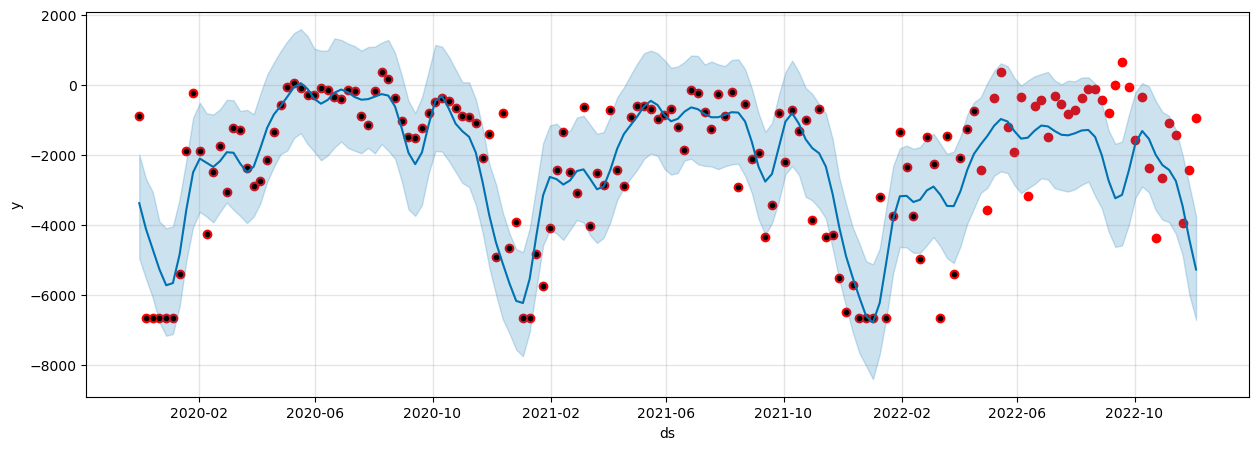

In [263]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [264]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d7.iloc[125:,0:],forecast['yhat'].iloc[125:]))

12.8737902564586


In [265]:
d8

QUANTITY
2019-12-01   -886.00
2019-12-08  -6169.75
2019-12-15  -6169.75
2019-12-22  -6169.75
2019-12-29  -6169.75
...              ...
2022-11-06  -1100.00
2022-11-13  -1451.00
2022-11-20  -3968.00
2022-11-27  -2428.00
2022-12-04   -964.00

[158 rows x 1 columns]

19:02:00 - cmdstanpy - INFO - Chain [1] start processing
19:02:00 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  dates = pd.date_range(
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetim

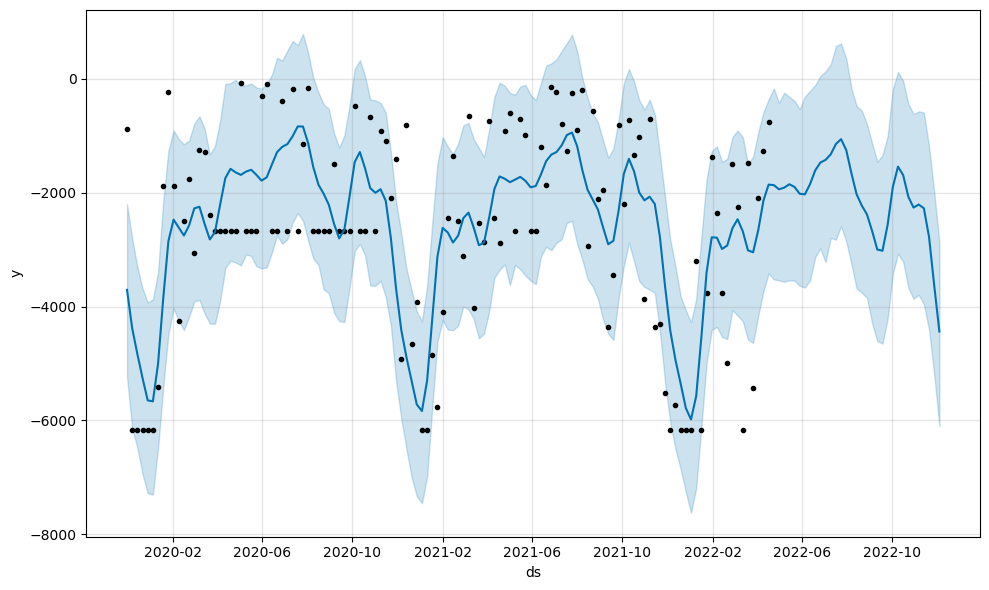

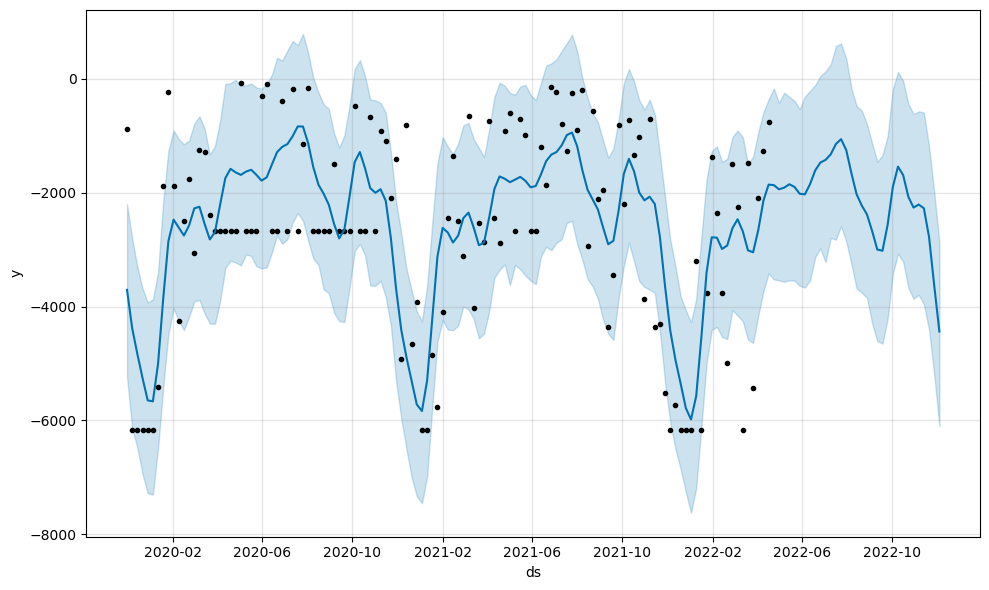

In [267]:
from prophet import Prophet
t1=d8.reset_index(level=0)
t1
t1.rename(columns = {'index':'ds','QUANTITY':'y'}, inplace = True)
m = Prophet(yearly_seasonality=True)
m.fit(t1.iloc[:125,:])
future = m.make_future_dataframe(periods=33, freq='w')
forecast = m.predict(future)
m.plot(forecast)

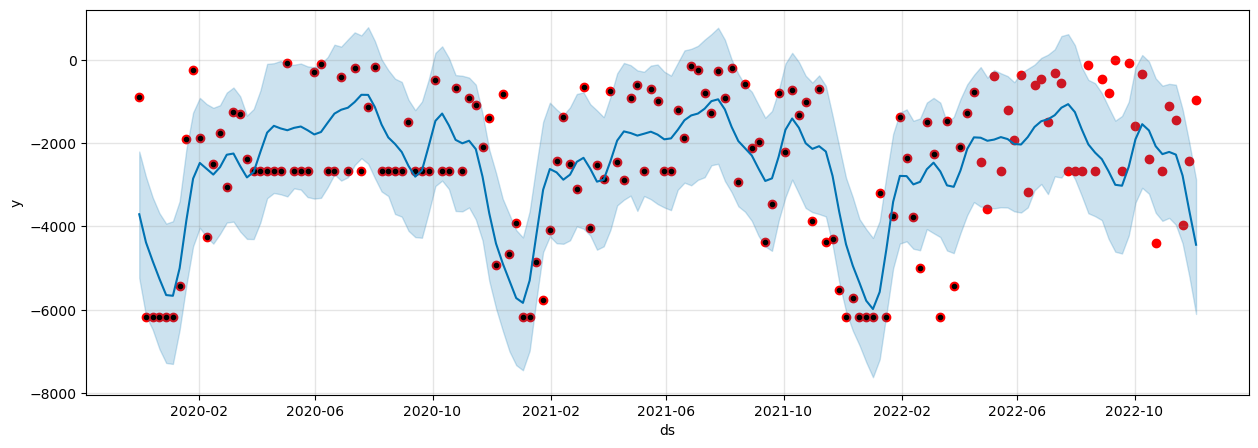

In [268]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(t1.ds, t1.y, color='r')
fig = m.plot(forecast, ax=ax)

In [269]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d8.iloc[125:,0:],forecast['yhat'].iloc[125:]))

11.733458683950754


# seasonal and trend decomposition using loess

In [270]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA

In [271]:
stl_res = STL(d1).fit()

Text(0, 0.5, 'Residual Component')

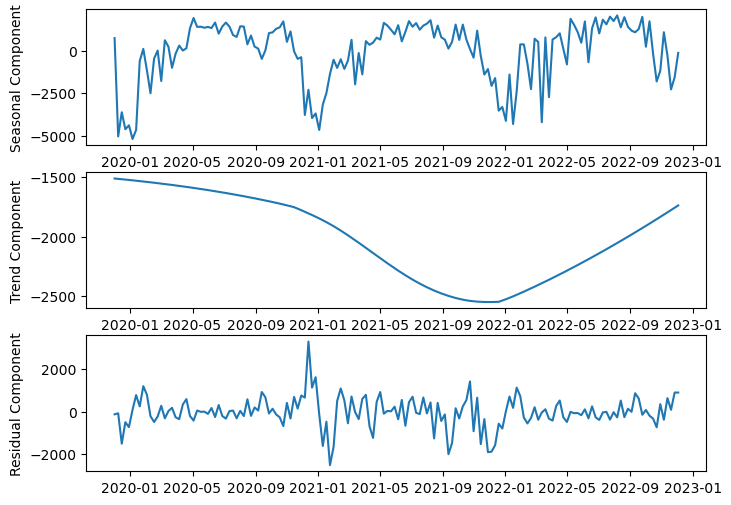

In [272]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(stl_res.seasonal)
ax[0].set_ylabel("Seasonal Component")
ax[1].plot(stl_res.trend)
ax[1].set_ylabel("Trend Component")
ax[2].plot(stl_res.resid)
ax[2].set_ylabel("Residual Component")

In [273]:
tr = d1.iloc[:125,:]
tt = d1.iloc[125:,:]
model = ARIMA(stl_res.trend[:125], order=(1,0,3))
model_fit = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [274]:
trend_pred = model_fit.predict(start=125, end=157)

In [275]:
trend_pred

2022-04-24   -2305.496043
2022-05-01   -2300.033177
2022-05-08   -2298.488439
2022-05-15   -2298.308793
2022-05-22   -2298.129258
2022-05-29   -2297.949834
2022-06-05   -2297.770522
2022-06-12   -2297.591321
2022-06-19   -2297.412230
2022-06-26   -2297.233251
2022-07-03   -2297.054382
2022-07-10   -2296.875624
2022-07-17   -2296.696977
2022-07-24   -2296.518441
2022-07-31   -2296.340015
2022-08-07   -2296.161700
2022-08-14   -2295.983495
2022-08-21   -2295.805401
2022-08-28   -2295.627417
2022-09-04   -2295.449543
2022-09-11   -2295.271779
2022-09-18   -2295.094126
2022-09-25   -2294.916582
2022-10-02   -2294.739149
2022-10-09   -2294.561825
2022-10-16   -2294.384612
2022-10-23   -2294.207508
2022-10-30   -2294.030514
2022-11-06   -2293.853629
2022-11-13   -2293.676854
2022-11-20   -2293.500189
2022-11-27   -2293.323633
2022-12-04   -2293.147186
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [276]:
seasonal_pred = stl_res.seasonal[125:158]

In [277]:
seasonal_pred

2022-04-24     124.894448
2022-05-01    -796.440395
2022-05-08    1891.762982
2022-05-15    1534.765448
2022-05-22    1106.502579
2022-05-29     480.648262
2022-06-05    1738.091364
2022-06-12    -670.330745
2022-06-19    1328.945283
2022-06-26    1977.098899
2022-07-03    1031.481936
2022-07-10    1843.421957
2022-07-17    1568.283709
2022-07-24    2019.949031
2022-07-31    1761.063160
2022-08-07    2091.175224
2022-08-14    1393.436063
2022-08-21    1991.095825
2022-08-28    1418.523224
2022-09-04    1194.559275
2022-09-11    1097.236227
2022-09-18    1293.472193
2022-09-25    2007.706266
2022-10-02     246.239866
2022-10-09    1743.857517
2022-10-16    -175.265758
2022-10-23   -1804.957587
2022-10-30   -1174.737020
2022-11-06    1100.467945
2022-11-13    -284.394072
2022-11-20   -2273.047522
2022-11-27   -1561.503332
2022-12-04    -116.973967
Freq: W-SUN, Name: season, dtype: float64

In [278]:
y_pred = trend_pred + seasonal_pred

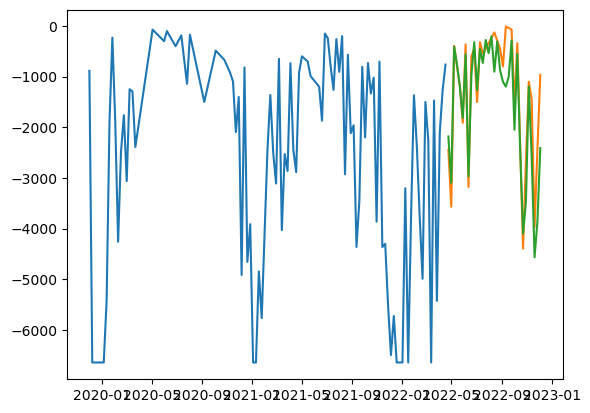

In [279]:
plt.plot(tr.index, tr, label="Train")
plt.plot(tt.index, tt, label="Test")
plt.plot(y_pred.index, y_pred, label="Forecast")

In [280]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d1.iloc[125:,0:],y_pred))

4.898472585904443


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


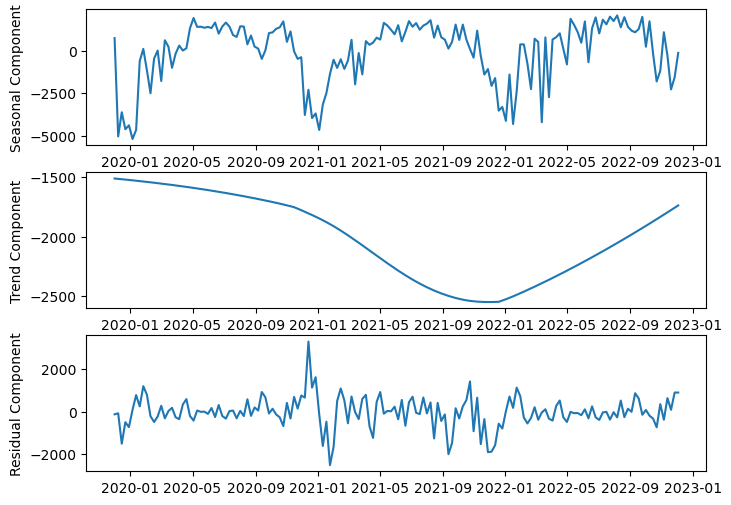

In [281]:
stl_res = STL(d2).fit()
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(stl_res.seasonal)
ax[0].set_ylabel("Seasonal Component")
ax[1].plot(stl_res.trend)
ax[1].set_ylabel("Trend Component")
ax[2].plot(stl_res.resid)
ax[2].set_ylabel("Residual Component")
tr = d2.iloc[:125,:]
tt = d2.iloc[125:,:]
model = ARIMA(stl_res.trend[:125], order=(1,0,3))
model_fit = model.fit()
trend_pred = model_fit.predict(start=125, end=157)
trend_pred
seasonal_pred = stl_res.seasonal[125:158]
y_pred = trend_pred + seasonal_pred

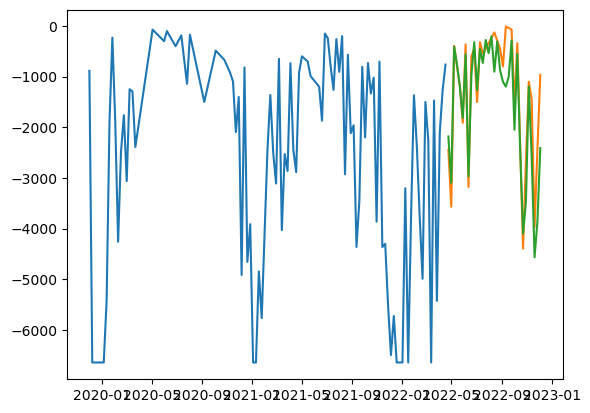

In [282]:
plt.plot(tr.index, tr, label="Train")
plt.plot(tt.index, tt, label="Test")
plt.plot(y_pred.index, y_pred, label="Forecast")

In [283]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d2.iloc[125:,0:],y_pred))

4.898472585904443


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


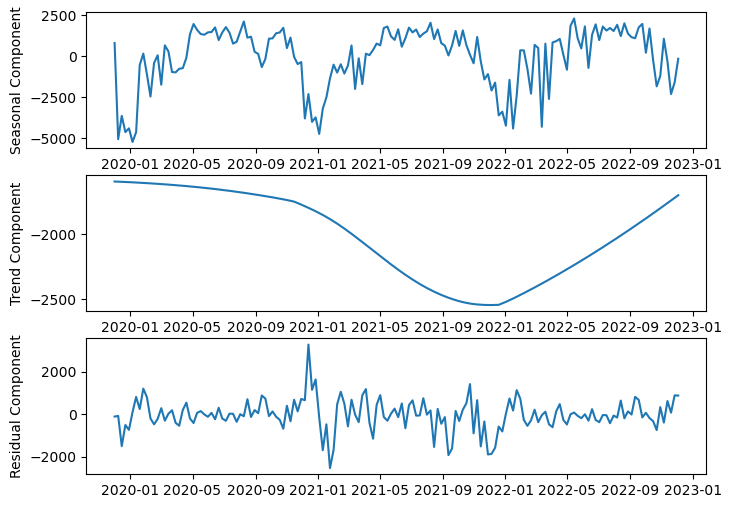

In [284]:
stl_res = STL(d3).fit()
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(stl_res.seasonal)
ax[0].set_ylabel("Seasonal Component")
ax[1].plot(stl_res.trend)
ax[1].set_ylabel("Trend Component")
ax[2].plot(stl_res.resid)
ax[2].set_ylabel("Residual Component")
tr = d3.iloc[:125,:]
tt = d3.iloc[125:,:]
model = ARIMA(stl_res.trend[:125], order=(1,0,3))
model_fit = model.fit()
trend_pred = model_fit.predict(start=125, end=157)
trend_pred
seasonal_pred = stl_res.seasonal[125:158]
y_pred = trend_pred + seasonal_pred

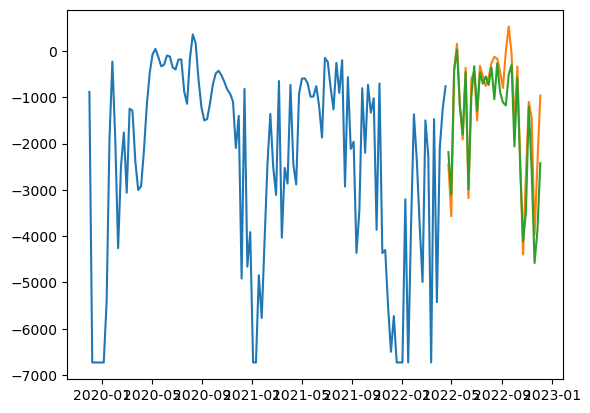

In [285]:
plt.plot(tr.index, tr, label="Train")
plt.plot(tt.index, tt, label="Test")
plt.plot(y_pred.index, y_pred, label="Forecast")

In [286]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d3.iloc[125:,0:],y_pred))

4.2352007291135125


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


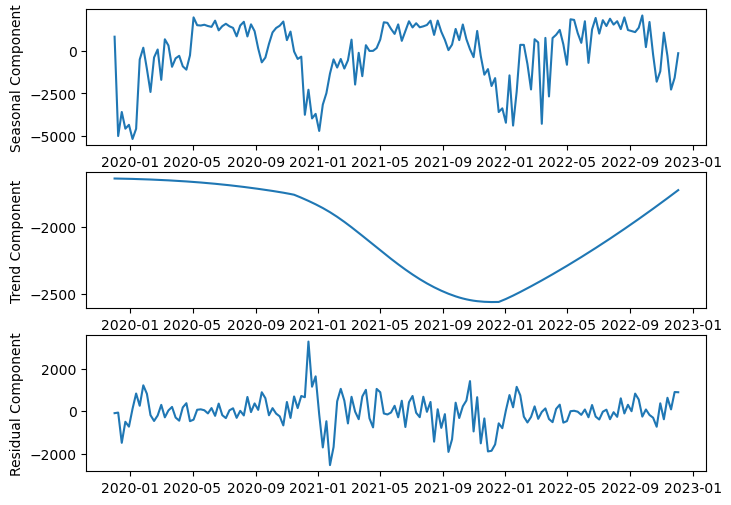

In [287]:
stl_res = STL(d4).fit()
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(stl_res.seasonal)
ax[0].set_ylabel("Seasonal Component")
ax[1].plot(stl_res.trend)
ax[1].set_ylabel("Trend Component")
ax[2].plot(stl_res.resid)
ax[2].set_ylabel("Residual Component")
tr = d4.iloc[:125,:]
tt = d4.iloc[125:,:]
model = ARIMA(stl_res.trend[:125], order=(1,0,3))
model_fit = model.fit()
trend_pred = model_fit.predict(start=125, end=157)
trend_pred
seasonal_pred = stl_res.seasonal[125:158]
y_pred = trend_pred + seasonal_pred

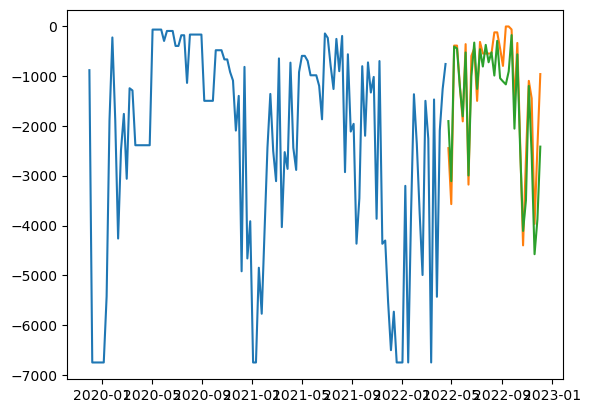

In [288]:
plt.plot(tr.index, tr, label="Train")
plt.plot(tt.index, tt, label="Test")
plt.plot(y_pred.index, y_pred, label="Forecast")

In [289]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(d4.iloc[125:,0:],y_pred))

6.843475085070113


#Adaptive exponential smoothing

In [290]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

def adaptive_exponential_smoothing(series, alpha=0.5, beta=0.5):
    predicted_values = []
    level = series[0]
    trend = 0
    
    for i in range(len(series)):
        if i == 0:
            predicted_values.append(series[0])
        else:
            last_level = level
            last_trend = trend
            level = alpha*series[i] + (1-alpha)*(level+trend)
            trend = beta*(level-last_level) + (1-beta)*last_trend
            predicted_values.append(level+trend)
    
    return predicted_values


In [291]:
d1

QUANTITY
2019-12-01  -886.0000
2019-12-08 -6643.5625
2019-12-15 -6643.5625
2019-12-22 -6643.5625
2019-12-29 -6643.5625
...               ...
2022-11-06 -1100.0000
2022-11-13 -1451.0000
2022-11-20 -3968.0000
2022-11-27 -2428.0000
2022-12-04  -964.0000

[158 rows x 1 columns]

In [292]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d1['QUANTITY'], alpha, beta)

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

In [293]:
aes_forecast

[-886.0,
 -5204.171875,
 -7723.10546875,
 -8712.6865234375,
 -8690.196044921875,
 -8167.292419433594,
 -6605.736251831055,
 -2882.7741050720215,
 472.4004945755005,
 733.1376707553864,
 -1572.2781588435173,
 -2069.41653393209,
 -1877.1315879933536,
 -2727.206218025647,
 -1875.441978535382,
 -1325.699364156404,
 -1865.903215927814,
 -1977.2793378315657,
 -1749.8142309922168,
 -1313.2114531578213,
 -784.6072009511681,
 -245.56994127671635,
 260.50784054635534,
 387.6697713213024,
 279.3332938784503,
 66.0817316874117,
 -160.56448232996053,
 -158.7464687561565,
 -218.15084478021538,
 -318.315321597191,
 -438.818729606381,
 -409.1157512093808,
 -284.9853242085354,
 -556.2987796559789,
 -1076.880812465706,
 -626.4516257541429,
 -486.8241259598258,
 -603.9043445727108,
 -886.4683677359756,
 -1247.5332873836142,
 -1623.9824253615297,
 -1591.086388010105,
 -1298.3667723318665,
 -885.5402714097806,
 -452.4919530962925,
 -290.34480566547535,
 -319.5183638670312,
 -452.39221866771805,
 -668.48109

In [294]:
len(d1['QUANTITY'])

158

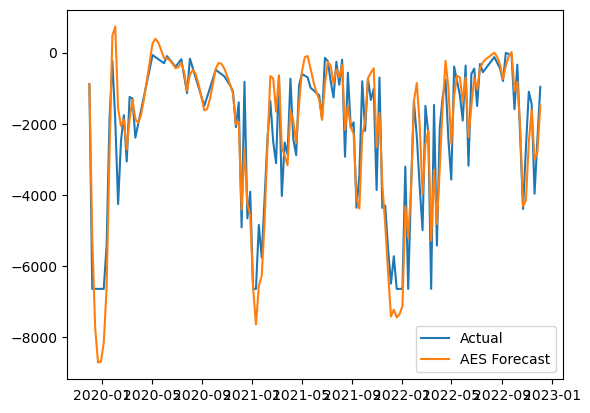

In [295]:
plt.plot(d1.index, d1['QUANTITY'], label='Actual')
plt.plot(d1.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()

In [296]:
print(mean_absolute_percentage_error(d1.iloc[:,0:],aes_forecast))

0.7400620904058681


/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

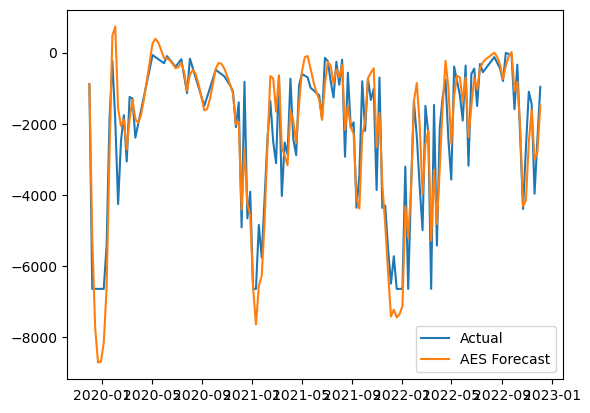

0.7400620904058681


In [297]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d2['QUANTITY'], alpha, beta)
plt.plot(d2.index, d2['QUANTITY'], label='Actual')
plt.plot(d2.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d2.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

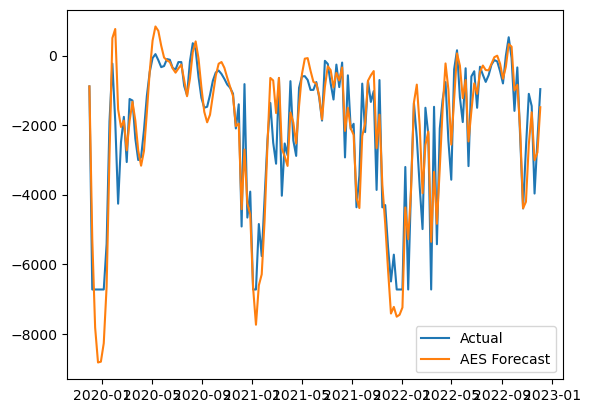

0.9073686818454758


In [298]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d3['QUANTITY'], alpha, beta)
plt.plot(d3.index, d3['QUANTITY'], label='Actual')
plt.plot(d3.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d3.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

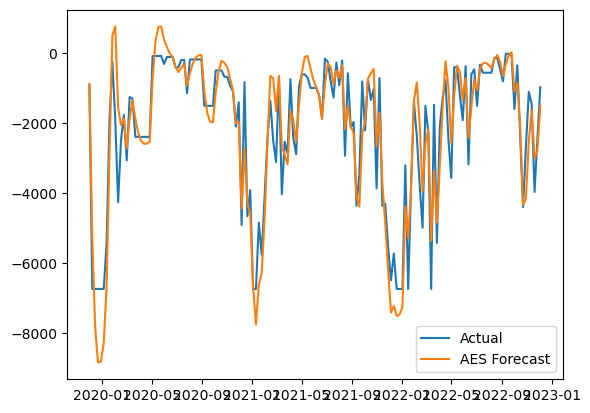

0.942205846175162


In [299]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d4['QUANTITY'], alpha, beta)
plt.plot(d4.index, d4['QUANTITY'], label='Actual')
plt.plot(d4.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d4.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

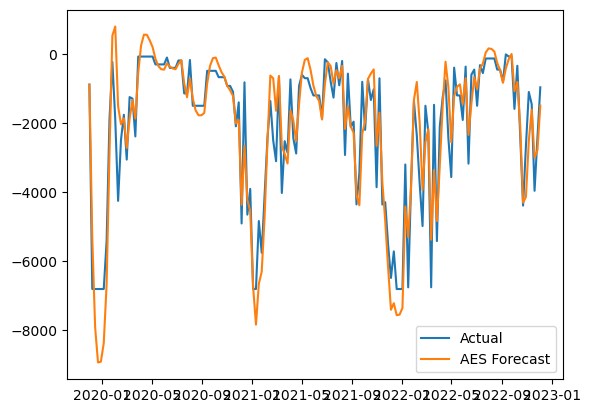

0.982195915075096


In [300]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d5['QUANTITY'], alpha, beta)
plt.plot(d5.index, d5['QUANTITY'], label='Actual')
plt.plot(d5.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d5.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

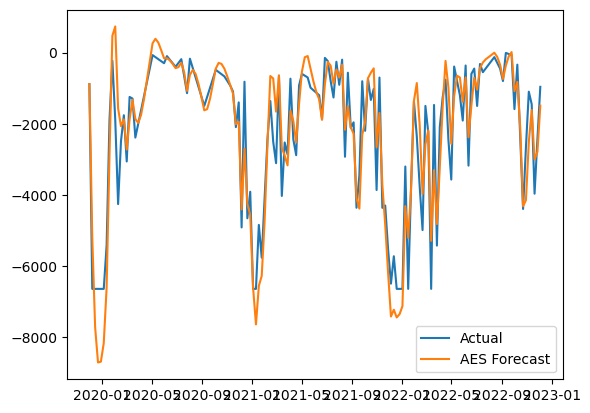

0.7400040254648784


In [301]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d6['QUANTITY'], alpha, beta)
plt.plot(d6.index, d6['QUANTITY'], label='Actual')
plt.plot(d6.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d6.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

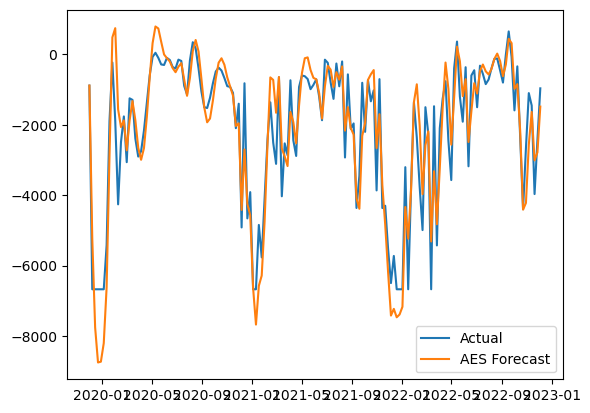

0.881982400968218


In [302]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d7['QUANTITY'], alpha, beta)
plt.plot(d7.index, d7['QUANTITY'], label='Actual')
plt.plot(d7.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d7.iloc[:,0:],aes_forecast))

/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  level = series[0]
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_values.append(series[0])
/var/folders/5h/xdq259xd2cq33686k5fhc18m0000gn/T/ipykernel_6441/2734988739.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

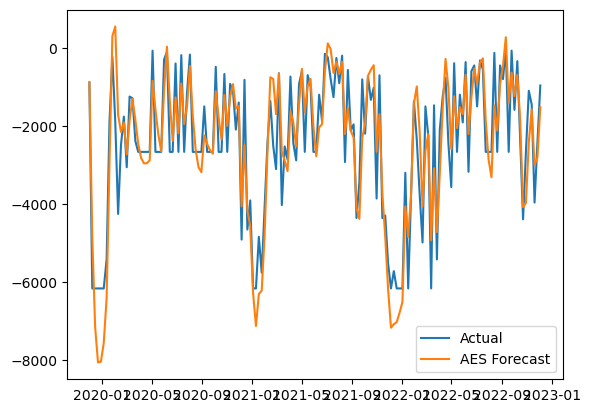

0.817493524795295


In [303]:
alpha = 0.5
beta = 0.5
aes_forecast = adaptive_exponential_smoothing(d8['QUANTITY'], alpha, beta)
plt.plot(d8.index, d8['QUANTITY'], label='Actual')
plt.plot(d8.index, aes_forecast, label='AES Forecast')
plt.legend()
plt.show()
print(mean_absolute_percentage_error(d8.iloc[:,0:],aes_forecast))

Dehire	Arima	Sarima	moving average	Holt-winters method	Prophet
# Linear interpolation	9.3251794	9.26751477	11.21491518	13.51740172	14.63133671
# Linear interpolation backward	9.3251794	9.26751477	11.21491518	13.51740172	14.63133671
# Polynomial interpolation	8.561721921	8.413418095		11.84308412	12.95544514
# forward imputation	13.53702488	14.03105603	16.01861093	19.80412307	22.29337811
# BACK Fill imputation	9.363973723	8.244696963	11.40784439	11.26771057	14.30321767
# SPLINE imputation	9.319795683	9.261352957	11.20848057	13.50965005	14.66204715
# Cubic imputation	8.361404267	8.404635446	9.956995269	11.82462751	12.87379026
# KNN Imputation	8.70919893	9.019003906	9.097061455	13.52940544	11.73345868